***Nota: Para el correcto uso de este archivo, se debe correr cada celda en orden de aparición. Las celdas que contienen funciones de gráfico de curvas de aprendizaje tienen comentada su aplicación, para evitar la lentificación del análisis. Estos gráficos pueden correrse en el archivo "gráficos.ipynb".***

# Análisis de la Base de Datos


### **Selección de la base de datos**
---

Se utilizará la base de datos [*Students Performance Dataset - Academic Success Factors in High School Students*](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset), la cual contiene datos acerca de estudiantes de escuela secundaria, sus actividades extracurriculares, las horas de estudio, etc. 

El objetivo de la red a realizar es, a partir de los datos provistos, poder predecir el rendimiento académico de los alumnos (en un principio, si es *bueno* o *malo*), y determinar qué características influyen en dichos resultados.


In [ ]:
# Se importa la librería para procesar la base de datos
import pandas as pd 

# Estas funciones modifican cuántos datos se ve cuando se imprime el dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
#pd.reset_option('all') # Esto lo reinicia                    

path_file = "students.csv"
dataframe = pd.read_csv(path_file) 

In [ ]:
print(dataframe.head(10))
dataframe.describe()

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering       GPA  GradeClass
0       1001   17       1          0                  2        19.833723         7         1                2                0       0      1             0  2.929196         2.0
1       1002   18       0          0                  1        15.408756         0         0                1                0       0      0             0  3.042915         1.0
2       1003   15       0          2                  3         4.210570        26         0                2                0       0      0             0  0.112602         4.0
3       1004   17       1          0                  3        10.028829        14         0                3                1       0      0             0  2.054218         3.0
4       1005   17       1          0                  2         4.672495        17         1                3 

StudentID          Age       Gender    Ethnicity  ParentalEducation  StudyTimeWeekly     Absences     Tutoring  ParentalSupport  Extracurricular       Sports        Music  Volunteering          GPA   GradeClass
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000      2392.000000  2392.000000  2392.000000      2392.000000      2392.000000  2392.000000  2392.000000   2392.000000  2392.000000  2392.000000
mean   2196.500000    16.468645     0.510870     0.877508           1.746237         9.771992    14.541388     0.301421         2.122074         0.383361     0.303512     0.196906      0.157191     1.906186     2.983696
std     690.655244     1.123798     0.499986     1.028476           1.000411         5.652774     8.467417     0.458971         1.122813         0.486307     0.459870     0.397744      0.364057     0.915156     1.233908
min    1001.000000    15.000000     0.000000     0.000000           0.000000         0.001057     0.000000     0.000000         0.000000         0.000000     0.000000     0.000000      0.000000     0.000000     0.000000
25%    1598.750000    15.000000     0.000000     0.000000           1.000000         5.043079     7.000000     0.000000         1.000000         0.000000     0.000000     0.000000      0.000000     1.174803     2.000000
50%    2196.500000    16.000000     1.000000     0.000000           2.000000         9.705363    15.000000     0.000000         2.000000         0.000000     0.000000     0.000000      0.000000     1.893393     4.000000
75%    2794.250000    17.000000     1.000000     2.000000           2.000000        14.408410    22.000000     1.000000         3.000000         1.000000     1.000000     0.000000      0.000000     2.622216     4.000000
max    3392.000000    18.000000     1.000000     3.000000           4.000000        19.978094    29.000000     1.000000         4.000000         1.000000     1.000000     1.000000      1.000000     4.000000     4.000000

### **Análisis de correlaciones**
---



In [ ]:
# Evaluación de correlación de variables respecto de la columna "GPA"
print(dataframe.corr()["GPA"])

StudentID           -0.002697
Age                  0.000275
Gender              -0.013360
Ethnicity            0.027760
ParentalEducation   -0.035854
StudyTimeWeekly      0.179275
Absences            -0.919314
Tutoring             0.145119
ParentalSupport      0.190774
Extracurricular      0.094078
Sports               0.057859
Music                0.073318
Volunteering         0.003258
GPA                  1.000000
GradeClass          -0.782835
Name: GPA, dtype: float64


Para ilustrar mejor las correlaciones entre las distintas variables y la GPA, se hace uso de una **matriz de correlaciones**:

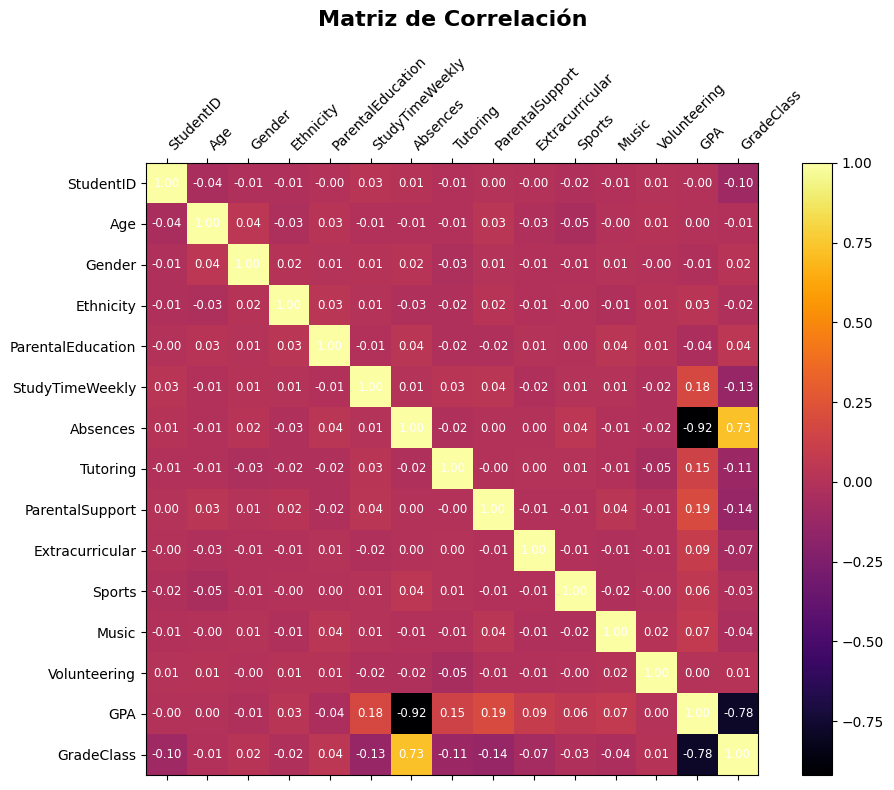

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dataframe = pd.read_csv("students.csv")

labels = dataframe.columns.to_list()
correlation_matrix = dataframe.corr() # Para calcular la matriz de Correlación.

fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.matshow(correlation_matrix, cmap="inferno")  # Graficamos la matriz.
fig.colorbar(cax)

# Nombres de las variables
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='left')
ax.set_yticklabels(labels)

# Se agrega la correlación en forma numérica dentro de los cuadritos.
for i in range(len(labels)):
    for j in range(len(labels)):
        # Con esta línea se añaden los valores redondeados a 2 decimales en cada cuadro
        ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white', fontsize=8.5)

# Ajuste de márgenes y el título.
plt.title("Matriz de Correlación", fontsize=16, fontweight='bold', pad=20)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

Como se puede observar en la matriz de correlaciones, son un par de variables, o columnas, las que más influyen en la GPA.

Tenemos que "StudyTimeWeekly", "Tutoring", "ParentalSupport" tienen cierta relación positiva, mientras que "Absences" una relación extremadamente negativa: a más faltas, peor GPA.

Por otro lado, vemos que hay algunas columnas como "StudentID" (Directamente no suma nada), "Age", "Gender" o "Volunteering" que no aportan nada.

Luego, GradeClass es un caso especial, ya que esa variable categoriza el GPA del alumno (como se explicó anteriormente), por ello la descartamos, nosotros somos los que queremos categorizar al alumno en **bueno** o **malo**.

### **Análisis de las variables**
---

Lo primero que podemos observar es que las variables que más se relacionan con GPA son las inasistencias y la clasificación según GPA, ambas de forma negativa, lo cual, a simple vista, es lógico. Pareciera ser que, a más inasistencias, menor será el rendimiento. Además, un valor de clasificación bajo, por la forma en que se creó el dataframe, indica un GPA alto.
Otra observación posible es que tanto el ID del estudiante, como su edad, género o etnia no influyen en las calificaciones de un alumno.

A continuación, una clasificación de las variables que consideraremos útiles (o no) para nuestra red neuronal:

##### Variables que **sí** nos interesan **(Influyen en el GPA)**:
- **Inasistencias**  
   Se puede observar en la correlación que a mayor número de inasistencias, menor es el GPA.

Luego, en menor medida:

- **Educación de los padres**
- **Horas semanales de estudio** 
- **Tutoría**
- **Soporte parental**
- **Actividad extracurricular**
- **Deportes**
- **Música**

Estas últimas variables tienen una correlación positiva moderada (aumentan a la par que el GPA), por lo que también aportan información relevante sobre el GPA.
   
##### Variables que **no** nos interesan **(No influyen en el GPA)**:

- **Edad**
- **Género**
- **Etnia**
- **Actividad solidaria** (actividad extracurricular)

Estas variables no presentan una relación directa con el rendimiento académico medido por el GPA.

A continuación, una representación gráfica de las correlaciones anteriormente mencionadas.

Los gráficos muestran la correlación entre las distintas variables que mencionamos y el GPA.

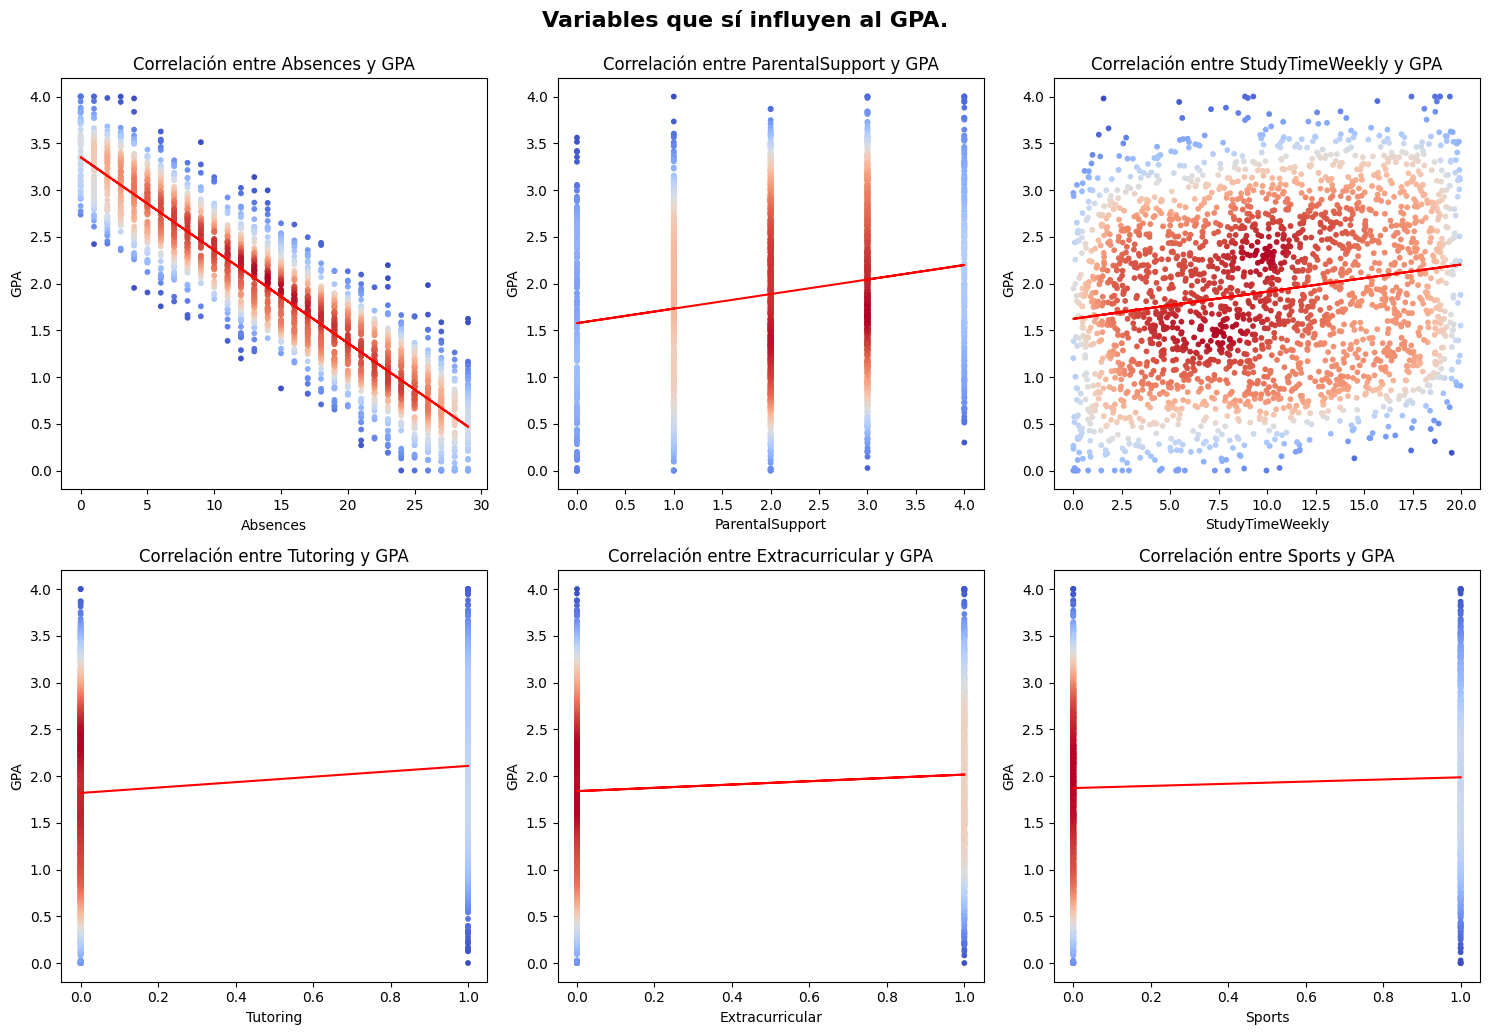

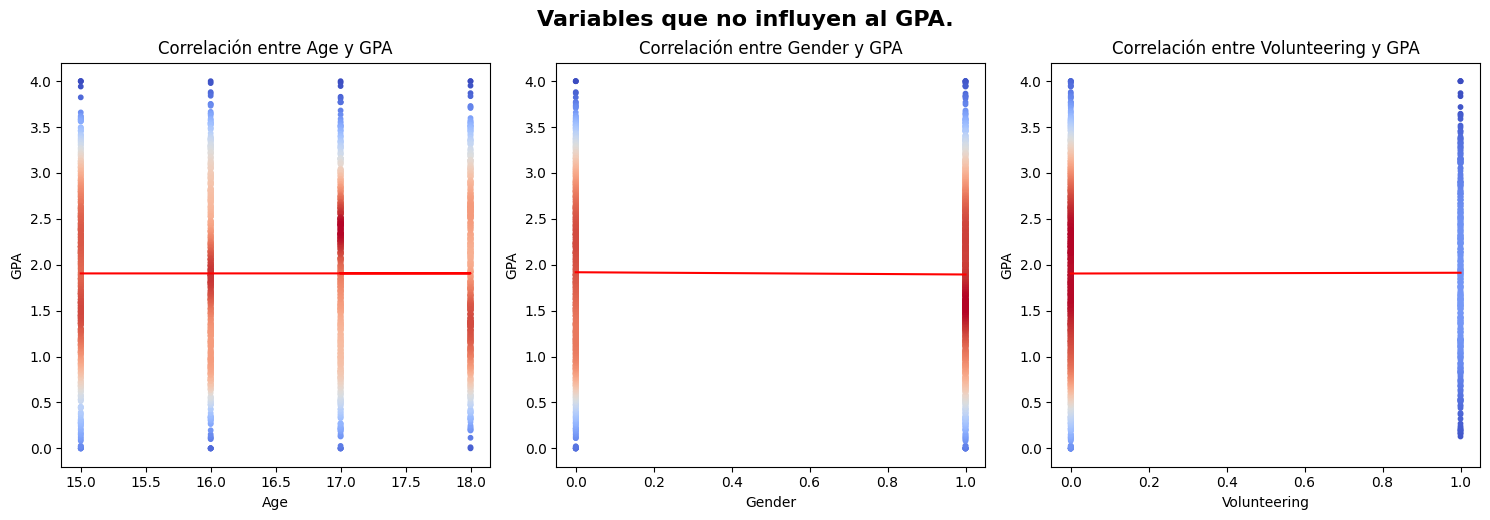

In [ ]:
#Se importan las librerías para crear los gráficos
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

dataframe = pd.read_csv("students.csv") # Esto evita tener que ejecutar todo (Run All) para que funcione correctamente la celda de código.

# Lista de variables que vamos a comparar contra el GPA. 
variablesConCorrelacion = ["Absences", "ParentalSupport", "StudyTimeWeekly", "Tutoring", "Extracurricular", "Sports"] # Saqué GradeClass, ya que no la usamos por lo que ya sabemos.
variablesSinCorrelacion = ["Age", "Gender", "Volunteering"]

# Función para graficar listas de variables contra el GPA, ajustada para el número de variables.
def graficadoraCorrelacionGPA(listaDeVariables, titulo, Large):
    num_variables = len(listaDeVariables)  # Número de variables en la lista

    if (Large):
        num_filas = (num_variables + 2) // 3  # Calcular el número de filas necesarias (3 por fila)
        fig, axs = plt.subplots(num_filas, 3, figsize=(15, 5 * num_filas))
        axs = axs.flatten()
    else:
        fig, axs = plt.subplots(1, num_variables, figsize=(5 * num_variables, 5)) # Creamos una fila que contenga cada gráfico.
        axs = axs.flatten()

    for i, var in enumerate(listaDeVariables):  # Iteramos por cada elemento de la lista.
        x = dataframe[var]
        y = dataframe["GPA"]

        # Calcular la densidad de los puntos
        xy = np.vstack([x, y])
        densidad = gaussian_kde(xy)(xy)

        # Ordenamos por densidad
        idx = densidad.argsort()
        x, y, densidad = x[idx], y[idx], densidad[idx]

        # Graficamos el scatter plot usando la densidad para el color de los puntos
        sc = axs[i].scatter(x, y, c=densidad, cmap='coolwarm', s=10)  

        # Ajustamos una regresión lineal para ver mejor la correlación
        m, b = np.polyfit(x, y, 1)
        axs[i].plot(x, (m * x + b), color="red")  # Línea roja

        axs[i].set_title(f"Correlación entre {var} y GPA")
        axs[i].set_xlabel(var)
        axs[i].set_ylabel("GPA")
    
    # Eliminar gráficos vacíos
    for j in range(i + 1, len(axs)):  
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle(titulo, fontweight='bold', fontsize=16, y=1.03)
    plt.show()

# Ahora llamamos la función para ambas listas
# En la función agregué un parámetro: "Large". Dependiendo si es true o false se genera un gráfico grande o pequeño respectivamente.
graficadoraCorrelacionGPA(variablesConCorrelacion, "Variables que sí influyen al GPA.", True)
graficadoraCorrelacionGPA(variablesSinCorrelacion, "Variables que no influyen al GPA.", False)

Con los gráficos anteriores, queda en evidencia lo planteado.

Si bien podría no haber sido necesario hacerlos, con esto queda confirmado que hay variables que **no nos sirven**, como *age*, *gender*, *volunteering* o *ethnicity*. Y si bien en esta última se aprecia una pequeña pendiente, es despreciable, y más aún cuando no es nuestro objeto de estudio.

### **Valores Atípicos y Limpieza de Datos**
---

Para ver si tenemos valores atípicos problemáticos, es decir, que nos estén modificando la media de forma exagerada, o que de alguna otra forma distorsionen una posible interpretación de los datos, podemos hacer uso de boxplots para identificarlos.

Finalmente, en caso de ser necesario, deberemos limpiarlos (eliminarlos o modificarlos).

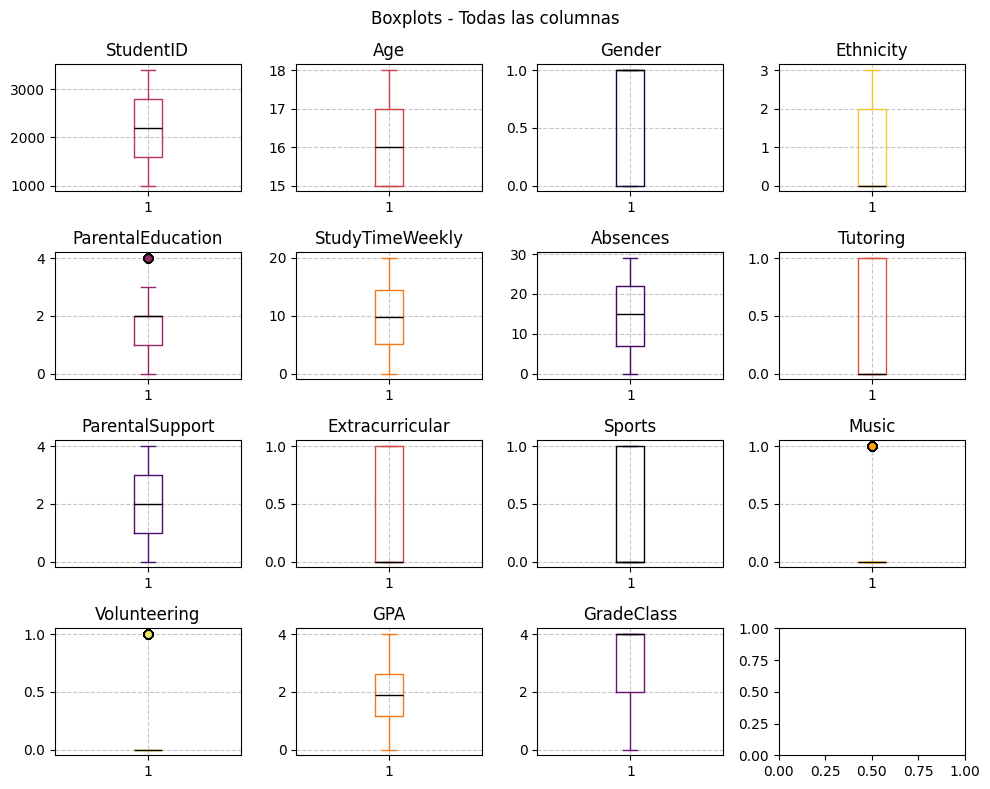

In [ ]:
# Boxplot de todas las columnas, inclusive las que no utilizaremos y/o no nos interesan.

import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("students.csv")

cant_variables = len(dataframe.columns)
fig, axes = plt.subplots(4, 4, figsize=(10, 8)) # Será una grilla 1x3 y con tamaño 15 10.

colores = plt.get_cmap("inferno") # Sacamos el colormap de Inferno, simplemente para la facha.

# Creamos los boxplots.
for ax, col in zip(axes.flatten(), dataframe.columns):
    color = colores(np.random.rand()) # Sacamos un color random de Inferno.
    # A continuación, a la hora de hacer el boxplot todo el choclo de props=dict es para ponerle color a la línea de la mediana, la caja, etc.
    ax.boxplot(dataframe[col],
               boxprops=dict(color=color),                              #Color
               medianprops=dict(color="black"),                         # ''
               whiskerprops=dict(color=color),                          # ''
               capprops=dict(color=color),                              # ''
               flierprops=dict(markerfacecolor=color, marker="o")       # ''
               )
    
    ax.set_title(col) # Ponemos el título.
    ax.grid(True, linestyle="--", alpha=0.7) # Activamos la grilla y lo configuramos.

plt.suptitle("Boxplots - Todas las columnas")
plt.tight_layout()
plt.show()

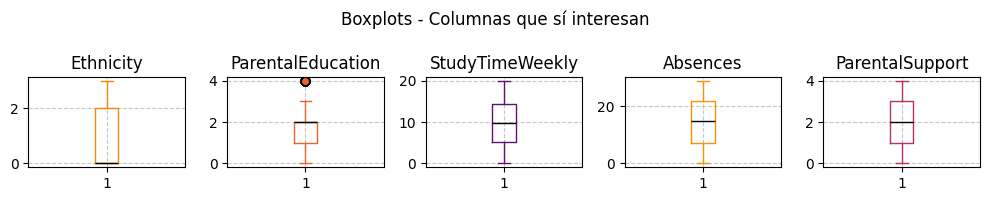

In [ ]:
# Boxplot de las variables que sí nos interesan (hay otras que también pero no las ponemos porque es 1/0).

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataframe = pd.read_csv("students.csv")
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Volunteering", "GradeClass", "Tutoring", "Extracurricular", "Music", "GPA", "Sports"], inplace = True)

cant_variables = len(dataframe.columns)
fig, axes = plt.subplots(1, 5, figsize=(10, 2)) # Será una grilla 1x3 y con tamaño 15 10.

colores = plt.get_cmap("inferno") # Sacamos el colormap de Inferno, simplemente para la facha.

# Creamos los boxplots.
for ax, col in zip(axes.flatten(), dataframe.columns):
    color = colores(np.random.rand()) # Sacamos un color random de Inferno.
    # A continuación, a la hora de hacer el boxplot todo el choclo de props=dict es para ponerle color a la línea de la mediana, la caja, etc.
    ax.boxplot(dataframe[col],
               boxprops=dict(color=color),                              #Color
               medianprops=dict(color="black"),                         # ''
               whiskerprops=dict(color=color),                          # ''
               capprops=dict(color=color),                              # ''
               flierprops=dict(markerfacecolor=color, marker="o")       # ''
               )
    
    ax.set_title(col) # Ponemos el título.
    ax.grid(True, linestyle="--", alpha=0.7) # Activamos la grilla y lo configuramos.

plt.suptitle("Boxplots - Columnas que sí interesan")
plt.tight_layout()
plt.show()

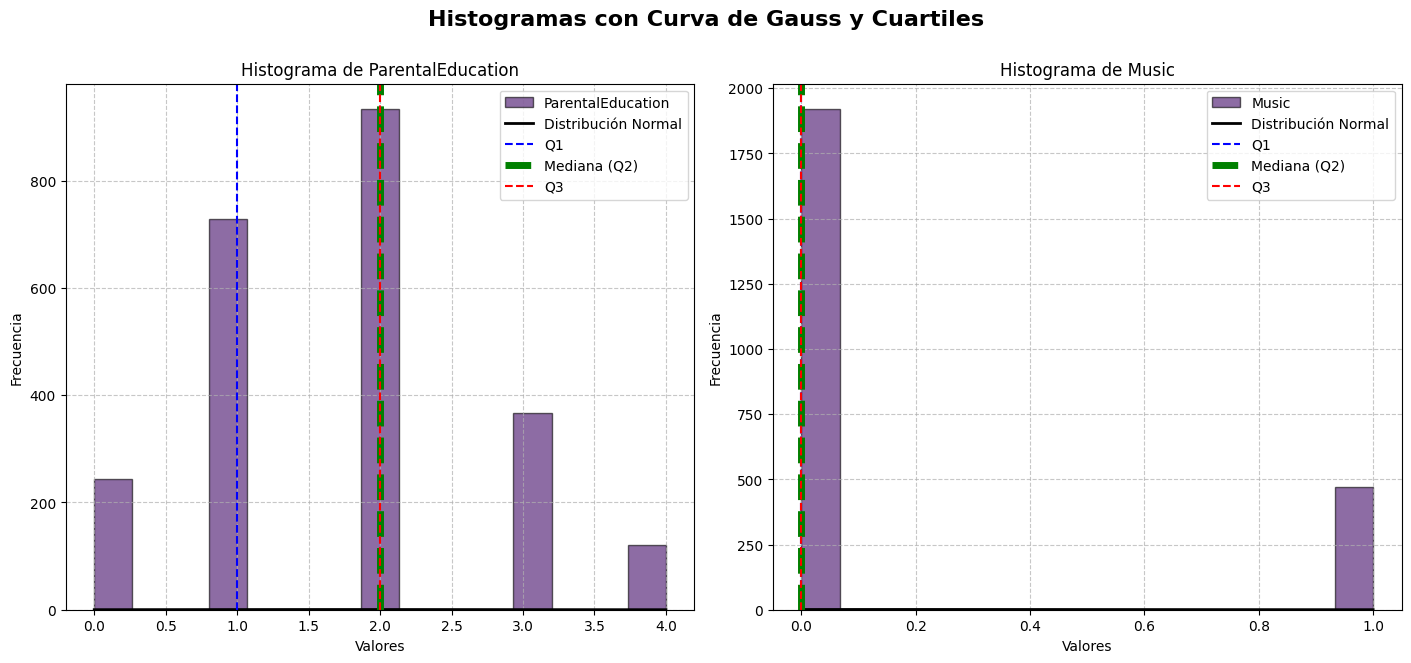

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Cargar el dataset
dataframe = pd.read_csv("students.csv")

# Variables de interés
variables = ['ParentalEducation', 'Music']

# Configurar el gráfico
fig, axes = plt.subplots(1, len(variables), figsize=(14, 6), constrained_layout=True)

# Colores y estilo
colores = plt.get_cmap("inferno")
color_hist = colores(0.2)

# Generar los histogramas y la campana de Gauss
for i, var in enumerate(variables):
    data = dataframe[var].dropna()  # Remover valores NaN, si los hubiera
    
    # Histograma
    axes[i].hist(data, bins=15, color=color_hist, alpha=0.6, edgecolor='black', density=False, label=var)
    
    # Curva de Gauss
    mu, std = norm.fit(data)
    xmin, xmax = data.min(), data.max()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, label="Distribución Normal")
    
    # Líneas de cuartiles
    q1, q2, q3 = np.percentile(data, [25, 50, 75])
    axes[i].axvline(q1, color='blue', linestyle='--', linewidth=1.5, label="Q1")
    axes[i].axvline(q2, color='green', linestyle='--', linewidth=5, label="Mediana (Q2)")
    axes[i].axvline(q3, color='red', linestyle='--', linewidth=1.5, label="Q3")
    
    # Ajustes de estilo
    axes[i].set_title(f'Histograma de {var}')
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, linestyle="--", alpha=0.7)
    axes[i].legend(loc='upper right')

# Título del gráfico completo
plt.suptitle("Histogramas con Curva de Gauss y Cuartiles", fontsize=16, fontweight='bold', y=1.08)
plt.show()

# En ParentalEducation la mediana (Q2) se pisa con Q3.
# En Music, las 3 están pisadas.

Al observar los boxplots, podemos ver que hay muy pocos valores atípicos en nuestra base de datos. De hecho, eliminamos los boxplots de las variables categóricas (en general eran 0/1), y si bien había algún que otro valor atípico no era algo exagerado y además ninguno se situaba sobre alguna columna con muy alta correlación.

Esto es algo bueno ya que no hace falta que nos preocupemos muchísimo por una posible distorsión en la interpretación/análisis de los datos debido a valores atípicos.

En este caso, dado que son pocos y la correlación de las variables que contienen esos valores atípicos es baja, y no afectarán los resultados en general, decidimos dejarlos.

### **Transformaciones**
---

La columna GPA debe pasarse de valores continuos a categóricos (0 para Bueno, 1 para Malo), y se elimina las columnas que no usaremos. No es necesario transformar los datos, ya que son aptos para su análisis de la forma en que queremos, como se detalla en el informe. 

In [ ]:
#Se elimina las columnas de ID, Edad, Género, Voluntariado y GradeClas.
dataframe = pd.read_csv("students.csv")
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Volunteering", "GradeClass"], inplace = True) 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

#Se cambia los valores de GPA por 0 (Bueno) o 1 (Malo)
dataframe.loc[dataframe['GPA'] <= 2, 'GPA'] = 1
dataframe.loc[dataframe['GPA'] > 2, 'GPA'] = 0

# Dataframe que queda
print(dataframe.head(10))

   Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  GPA
0          0                  2        19.833723         7         1                2                0       0      1  0.0
1          0                  1        15.408756         0         0                1                0       0      0  0.0
2          2                  3         4.210570        26         0                2                0       0      0  1.0
3          0                  3        10.028829        14         0                3                1       0      0  0.0
4          0                  2         4.672495        17         1                3                0       0      0  1.0
5          0                  1         8.191219         0         0                1                1       0      0  0.0
6          1                  1        15.601680        10         0                3                0       1      0  0.0
7          1    

# Desarrollo de la Red Neuronal

### **Arquitectura de la Red**
---

El objetivo de una red neuronal es, básicamente, predecir una variable de una base de datos a partir de otras relacionadas a ella, por medio de cálculos. En concreto, es entrenada con una parte de la base, realizando las cuentas y verificando qué tan alejados de los valores reales están los resultados obtenidos, y, a partir de eso, ajusta sus cálculos internos para ajustarse mejor a lo esperable. Esto lo ejecuta una cantidad de veces determinada por el usuario de la red.

En esta sección se dará la explicación cada una de sus partes a medida que se vaya desarrollando la creación de la estructura de este trabajo.

#### **Capas de la Red**

La red neuronal estará compuesta por tres capas:
*   ***Capa de Entrada***: Es la encargada de recibir las variables numéricas que representan los datos de entrada para el modelo. Tendrá 9 neuronas.

*   ***Capa Oculta***: Donde se realiza la *mistery math*, es decir, los cálculos internos del modelo (combinaciones y transformaciones de datos). Tendrá 9 neuronas también, utilizará una función de activación tipo *ReLU*.

*   ***Capa de Salida***: Su objetivo es el de dar la predicción final, en este caso, el GPA. Tendrá 1 sola neurona, utilizará una función de activación tipo *logística*.

#### **Conexión**

Entonces, teniendo en cuenta todo lo anteriormente mencionado, podemos ver que nuestra red está conectada de la siguiente forma.

* Capa de Entrada -> 9 nodos (son las entradas).

* Capa Oculta -> 9 nodos. Cada nodo recibe todas las entradas.

* Capa de Salida -> 1 nodo. El único nodo recibe todas las salidas de la capa ocultas (serían 9 salidas).

Debemos tener en cuenta que todo estas conexiones también la podríamos representar con vectores y matrices, que es justamente lo que utilizaremos a la hora de entrenar la red debido a la gran eficiencia y rendimiento que proveen.

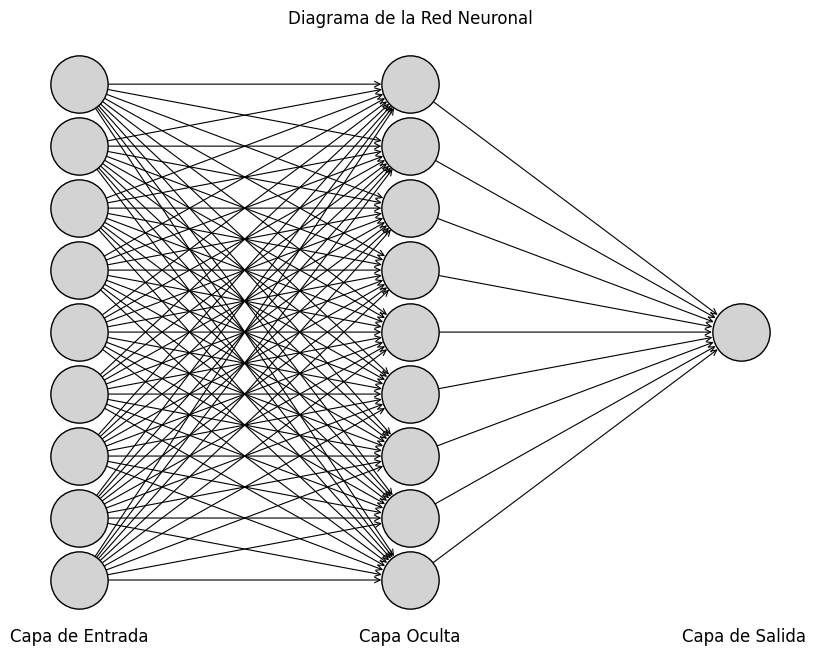

In [ ]:
# Código que grafica la red neuronal, matplotlib + networkx.

import matplotlib.pyplot as plt
import networkx as nx

# Dimensiones de la red
neuronas_entrada = 9
neuronas_ocultas = 9
neuronas_salida = 1

G = nx.DiGraph() # Crea el grafo (vacío).

# Agregar nodos para la capa de entrada
for i in range(neuronas_entrada):
    G.add_node(f'Input {i+1}', pos=(0, i))

# Agregar nodos para la capa oculta
for i in range(neuronas_ocultas):
    G.add_node(f'Hidden {i+1}', pos=(1, i))

# Agregar nodo para la capa de salida
G.add_node('Output', pos=(2, neuronas_ocultas//2))

# Agregar las conexiones entre las capas
for i in range(neuronas_entrada):
    for j in range(neuronas_ocultas):
        G.add_edge(f'Input {i+1}', f'Hidden {j+1}')
        
for j in range(neuronas_ocultas):
    G.add_edge(f'Hidden {j+1}', 'Output')

pos = nx.get_node_attributes(G, 'pos') # Posición de los nodos.

plt.figure(figsize=(8, 6)) # Se dibuja la red.

# Config del estilo (colores, bordes, flechas, etc.).
nx.draw(G, pos, with_labels=False, node_size=1700, node_color="lightgray", 
        edgecolors="black", font_size=10, font_weight="bold", arrows=True, 
        arrowstyle='->', arrowsize=10, width=0.8)

# Etiquetas
plt.text(0, -1, 'Capa de Entrada', fontsize=12, ha='center')
plt.text(1, -1, 'Capa Oculta', fontsize=12, ha='center')
plt.text(2.01, -1, 'Capa de Salida', fontsize=12, ha='center')

plt.title("Diagrama de la Red Neuronal")
plt.show()


#### **Dentro de la Red**



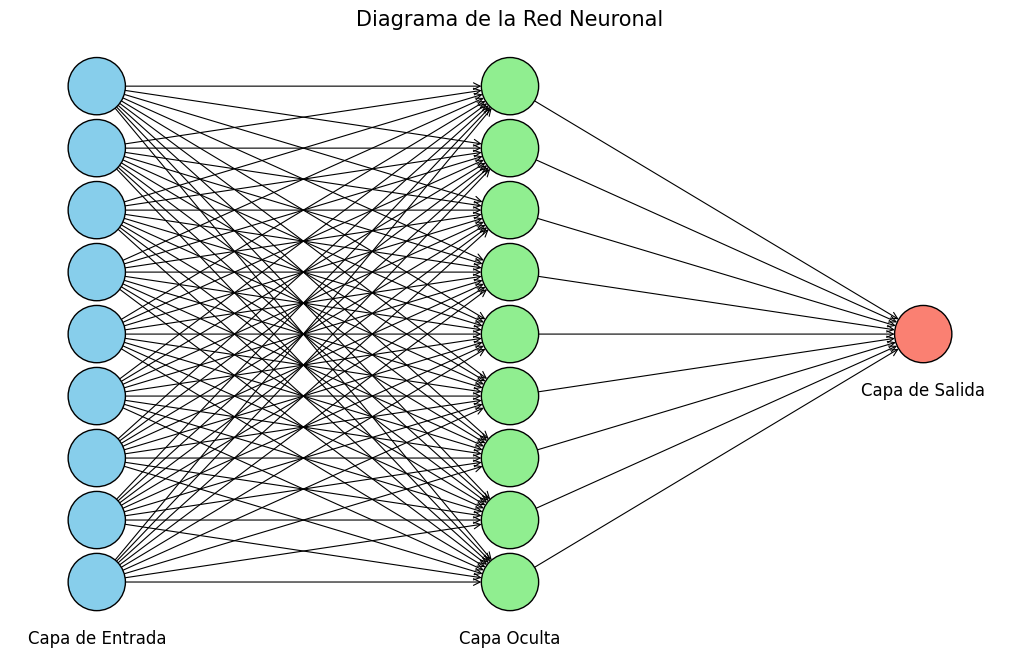

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Dimensiones de la red
neuronas_entrada = 9
neuronas_ocultas = 9
neuronas_salida = 1

G = nx.DiGraph()  # Crea el grafo (vacío).

# Agregar nodos para la capa de entrada
for i in range(neuronas_entrada):
    G.add_node(f'Input {i+1}', pos=(0, i))

# Agregar nodos para la capa oculta
for i in range(neuronas_ocultas):
    G.add_node(f'Hidden {i+1}', pos=(1, i))

# Agregar nodo para la capa de salida
G.add_node('Output', pos=(2, neuronas_ocultas//2))

# Agregar las conexiones entre las capas
for i in range(neuronas_entrada):
    for j in range(neuronas_ocultas):
        G.add_edge(f'Input {i+1}', f'Hidden {j+1}')

for j in range(neuronas_ocultas):
    G.add_edge(f'Hidden {j+1}', 'Output')

# Extraer posiciones de los nodos
pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Colores por capa
node_color_map = ["skyblue"] * neuronas_entrada + ["lightgreen"] * neuronas_ocultas + ["salmon"]
node_size_map = [1700] * neuronas_entrada + [1700] * neuronas_ocultas + [1700]  # Tamaño de nodos

# Dibujar el grafo
nx.draw(G, pos, with_labels=False, node_size=node_size_map, node_color=node_color_map, 
        edgecolors="black", font_size=10, font_weight="bold", arrows=True, 
        arrowstyle='->', arrowsize=12, width=0.8)

# Etiquetas para cada capa
plt.text(0, -1, 'Capa de Entrada', fontsize=12, ha='center')
plt.text(1, -1, 'Capa Oculta', fontsize=12, ha='center')
plt.text(2, neuronas_ocultas//2 - 1, 'Capa de Salida', fontsize=12, ha='center')

plt.title("Diagrama de la Red Neuronal", fontsize=15)
plt.show()


##### **Capa Oculta**

¿Qué contiene un nodo de una capa oculta exactamente?

Bueno, primero que nada y como vimos anteriormente, recibimos las 9 variables de entrada en cada nodo. Pero, además, tenemos pesos asociados a cada variable en cada nodo de la capa oculta (y también en la de salida).

Esto es así porque básicamente cada nodo es una función lineal que utiliza los pesos y sesgos para realizar multiplicaciones y sumas con los valores de entrada. Además, a cada nodo también se le añade un sesgo adicional.

Este proceso se repite exactamente igual en la capa de salida, solo que ahí tenemos una única neurona.

*Recordar: Esto es solo lo que le pasa a una única neurona de la capa oculta, pero le pasa a todas. Graficar esto mismo con todas a la vez sería un poquito complicado 🗿*

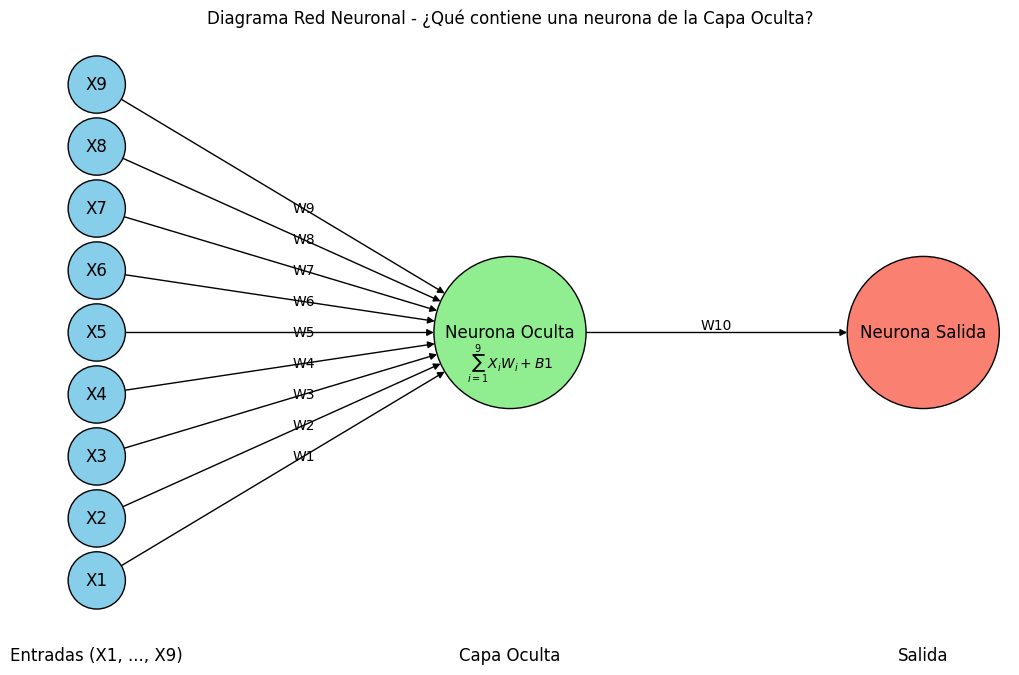

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear el grafo dirigido
G = nx.DiGraph()

# Agregar nodos de entrada (x1, x2, ..., x9) en orden descendente
for i in range(9, 0, -1):  # Cambiado a 9, 8, ..., 1
    G.add_node(f'X{i}', pos=(1, i), color='skyblue')  # Nodos entrada.

# Agregar el nodo de la neurona oculta con un tamaño mayor
G.add_node('Neurona Oculta', pos=(2, 5), color='lightgreen')  # Nodo capa oculta.

# Agregar el nodo de salida
G.add_node('Neurona Salida', pos=(3, 5), color='salmon')  # Nodo salida.

# Conectar las entradas a la neurona oculta
for i in range(1, 10):
    G.add_edge(f'X{i}', 'Neurona Oculta')

# Conectar la neurona oculta al nodo de salida
G.add_edge('Neurona Oculta', 'Neurona Salida')

# Obtener las posiciones de los nodos
pos = nx.get_node_attributes(G, 'pos')

# Obtener los colores de los nodos
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

# Definir los tamaños de los nodos
node_sizes = [1700 if 'X' in node else 12000 for node in G.nodes()]

plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Dibujar el grafo con tamaños de nodos específicos
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, edgecolors="black", arrows=True)

plt.text(2, 4.5, r'$\sum_{i=1}^{9} X_i W_i + B1$', ha='center', va='center') # La sumatoria de las variables con los pesos y el sesgo.

# Añadir etiquetas de peso a las aristas cerca de las flechas
for i in range(1, 10):
    # Calcular la posición media entre X{i} y la neurona
    mid_x = 1.5
    mid_y = (i + 5) / 2  # La media entre la posición del nodo de entrada y la neurona
    plt.text(mid_x, mid_y, f'W{i}', fontsize=10, ha='center', va='center', color='black')

# Etiqueta de la salida
plt.text(2.5, 5, 'W10', fontsize=10, ha='center', va='bottom', color='black')

# Agregar nombres debajo de cada conjunto de nodos
plt.text(1, -0.3, 'Entradas (X1, ..., X9)', fontsize=12, ha='center')
plt.text(2, -0.3, 'Capa Oculta', fontsize=12, ha='center')
plt.text(3, -0.3, 'Salida', fontsize=12, ha='center')

plt.title("Diagrama Red Neuronal - ¿Qué contiene una neurona de la Capa Oculta?")
plt.show()


Básicamente lo que tenemos dentro de esa neurona sería lo siguiente:

$$ X_1 W_1 + X_2 W_2 + X_3 W_3 + X_4 W_4 + X_5 W_5 + X_6 W_6 + X_7 W_7 + X_8 W_8 + X_9 W_9 + B1 $$

### Implementación de la Red - Numpy
---

In [4]:
# Importamos las librerías.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
# En esta celda se crean las derivadas y funciones de activación para usar en la red neuronal
from sympy import *

# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Esto se hace para poder visualizar las derivadas sin asignar valores reales a las variables a derivar
W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# Derivada de la función costo respecto a A2
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)    # Lo que hace diff es derivar el primer símbolo respecto al segundo
print("dC_dA2 = ", dC_dA2) # 2*A2 - 2*Y

# Derivada de A2 respecto de Z2
logistic = lambda x: 1 / (1 + exp(-x))
_A2 = logistic(Z2)
dA2_dZ2 = diff(_A2, Z2)
print("dA2_dZ2 = ", dA2_dZ2) # exp(-Z2)/(1 + exp(-Z2))**2

# Derivada de Z2 respecto a A1
_Z2 = A1*W2 + B2
dZ2_dA1 = diff(_Z2, A1)
print("dZ2_dA1 = ", dZ2_dA1) # W2

# Derivada de Z2 respecto a W2
dZ2_dW2 = diff(_Z2, W2)
print("dZ2_dW2 = ", dZ2_dW2) # A1

# Derivada de Z2 respecto a B2
dZ2_dB2 = diff(_Z2, B2)
print("dZ2_dB2 = ", dZ2_dB2) # 1

# Derivada de A1 respecto de Z1
relu = lambda x: Max(x, 0)
_A1 = relu(Z1)

d_relu = lambda x: x > 0 # Pendiente es 1 para los positivos, 0 para los negativos
dA1_dZ1 = d_relu(Z1)
print("dA1_dZ1 = ", dA1_dZ1) # Z1 > 0

# Derivada de Z1 respecto a W1
_Z1 = X*W1 + B1
dZ1_dW1 = diff(_Z1, W1)
print("dZ1_dW1 = ", dZ1_dW1) # X

# Derivada de Z1 respecto a B1
dZ1_dB1 = diff(_Z1, B1)
print("dZ1_dB1 = ", dZ1_dB1) # 1

dC_dA2 =  2*A2 - 2*Y
dA2_dZ2 =  exp(-Z2)/(1 + exp(-Z2))**2
dZ2_dA1 =  W2
dZ2_dW2 =  A1
dZ2_dB2 =  1
dA1_dZ1 =  Z1 > 0
dZ1_dW1 =  X
dZ1_dB1 =  1


In [6]:
# En esta celda definimos el forward propagation, y probaremos la red sin entrenar
dataframe = pd.read_csv("students.csv")
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Volunteering", "GradeClass"], inplace = True)

dataframe.loc[dataframe['GPA'] <= 2, 'GPA'] = 1
dataframe.loc[dataframe['GPA'] > 2, 'GPA'] = 0

# Pesos y sesgos iniciados aleatoriamente
w_hidden = np.random.rand(9, 9) * 2 - 1
w_output = np.random.rand(1, 9) * 2 - 1

b_hidden = np.random.rand(9, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1

# Se extrae las columnas de entrada
all_inputs = (dataframe.iloc[:, 0:9].values)
# Se extrae la columna de salida
all_outputs = dataframe.iloc[:, -1].values

# Se divide en un conjunto de entrenamiento y uno de prueba (un tercio para el testeo)
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)

n = X_train.shape[0] # número de registros de entrenamiento (usado para calcular precisión)

# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
def forward_prop(X):
    global w_hidden, w_output, b_hidden, b_output
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2


# Función que realiza forward y backward, para entrenar la red
def aplicarRed(L, rango):
  global w_hidden, w_output, b_hidden, b_output
  for i in tqdm(range(rango)):
      # Selecciona aleatoriamente uno de los datos de entrenamiento
      idx = np.random.choice(n, 1, replace=False)
      X_sample = X_train[idx].transpose()
      Y_sample = Y_train[idx]

      # Pasa datos seleccionados aleatoriamente a través de la red neuronal
      Z1, A1, Z2, A2 = forward_prop(X_sample)

      # Distribuir error a través de la retropropagación
      # y devolver pendientes para pesos y sesgos
      dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

      # Actualiza pesos y sesgos
      w_hidden -= L * dW1
      b_hidden -= L * dB1
      w_output -= L * dW2
      b_output -= L * dB2

In [7]:
# Prueba inicial de precisión
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions > .5).flatten().round(), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)

ACCURACY:  0.6654135338345772


### Mejorando la red
Para no tener que probar una por una las distintas combinaciones de L y rango (ya que son muchas y no tendríamos tiempo), se implementa una función que, a partir de los mismos valores iniciales aleatorios, calcula y grafica qué tan bien aprenden con cada combinación, y luego grafica esta curva de aprendizaje.

In [8]:
# Se van a fijar valores para poder optimizar valores de L y rango. Luego, se van a graficar para ver cuáles son los más convenientes.

dataframe = pd.read_csv("students.csv")
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Volunteering", "GradeClass"], inplace = True)

dataframe.loc[dataframe['GPA'] <= 2, 'GPA'] = 1
dataframe.loc[dataframe['GPA'] > 2, 'GPA'] = 0

def iniciar_pesos():
    global w_hidden, b_hidden, w_output, b_output 
    np.random.seed(0) # Importante: Inicializamos la semilla en 0 para que siempre dé los mismos valores random.
    w_hidden = np.random.rand(9, 9) * 2 - 1
    w_output = np.random.rand(1, 9) * 2 - 1

    b_hidden = np.random.rand(9, 1) * 2 - 1
    b_output = np.random.rand(1, 1) * 2 - 1


# Se extrae las columnas de entrada
all_inputs = (dataframe.iloc[:, 0:9].values)
# Se extrae la columna de salida
all_outputs = dataframe.iloc[:, -1].values

# Se divide en un conjunto de entrenamiento y uno de prueba (un tercio para el testeo)
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)

n = X_train.shape[0] # número de registros de entrenamiento

100%|██████████| 1000/1000 [00:00<00:00, 2608.71it/s]


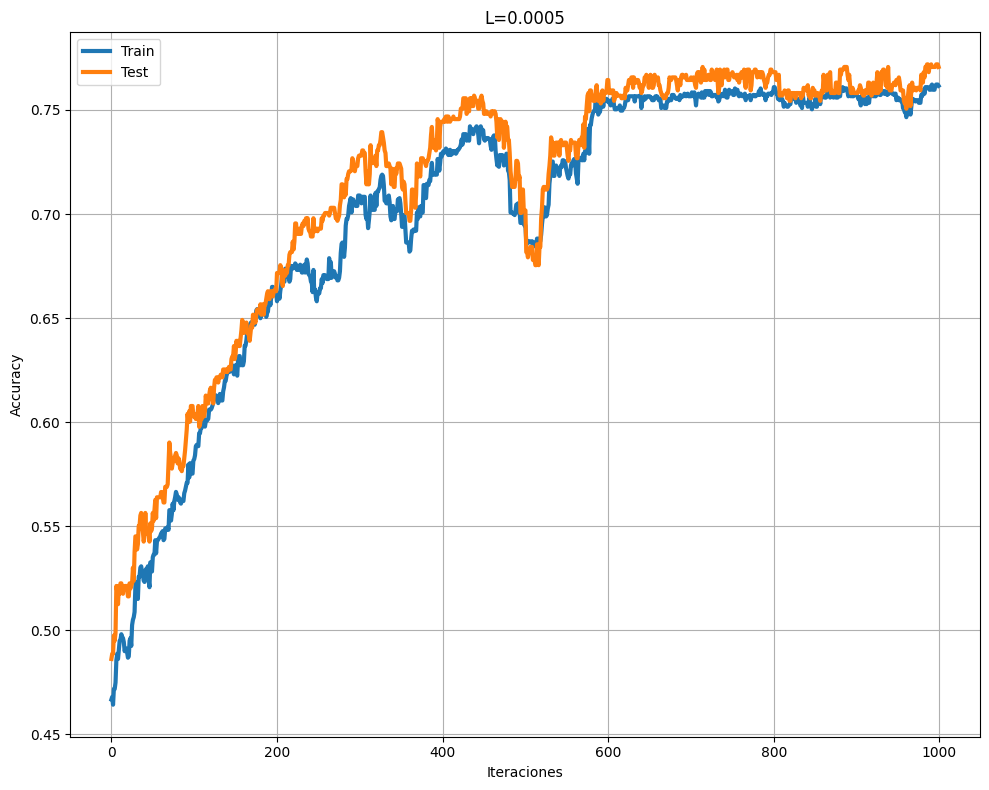

100%|██████████| 3000/3000 [00:01<00:00, 2594.67it/s]


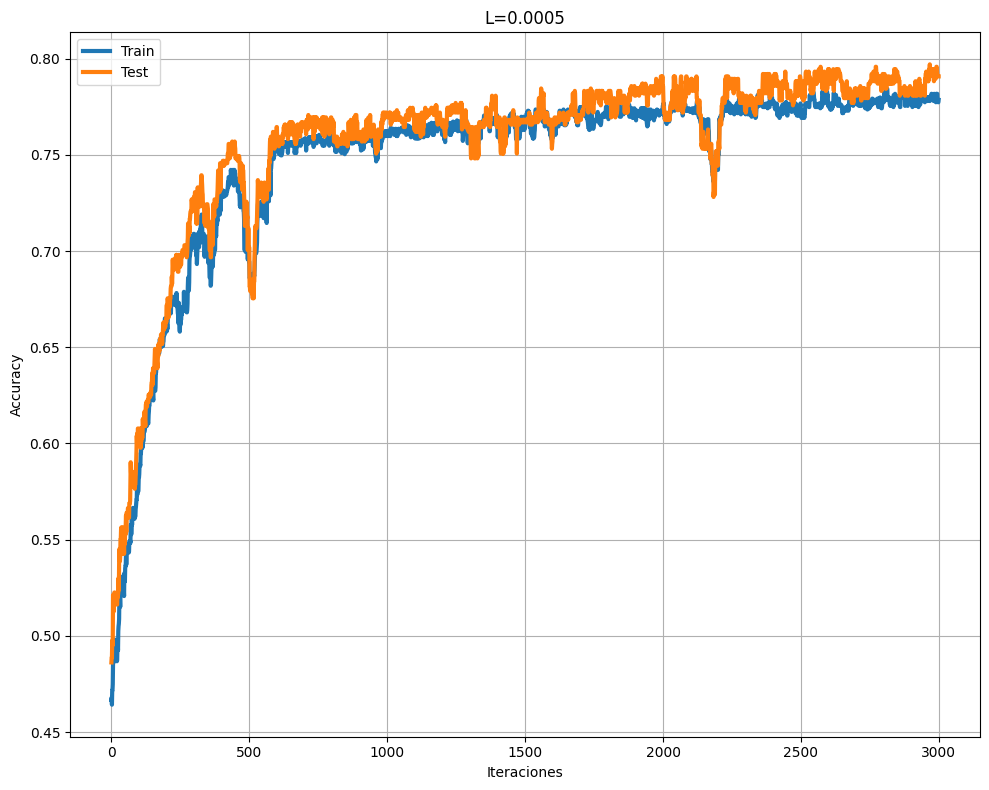

100%|██████████| 5000/5000 [00:01<00:00, 2598.44it/s]


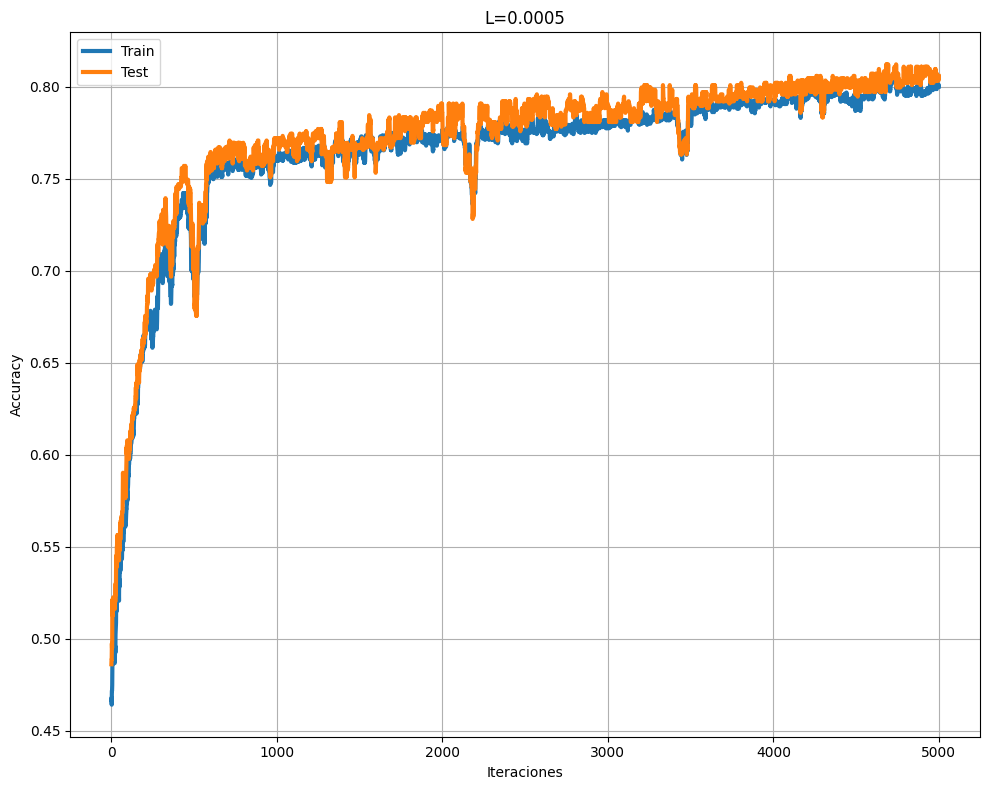

100%|██████████| 10000/10000 [00:03<00:00, 2627.88it/s]


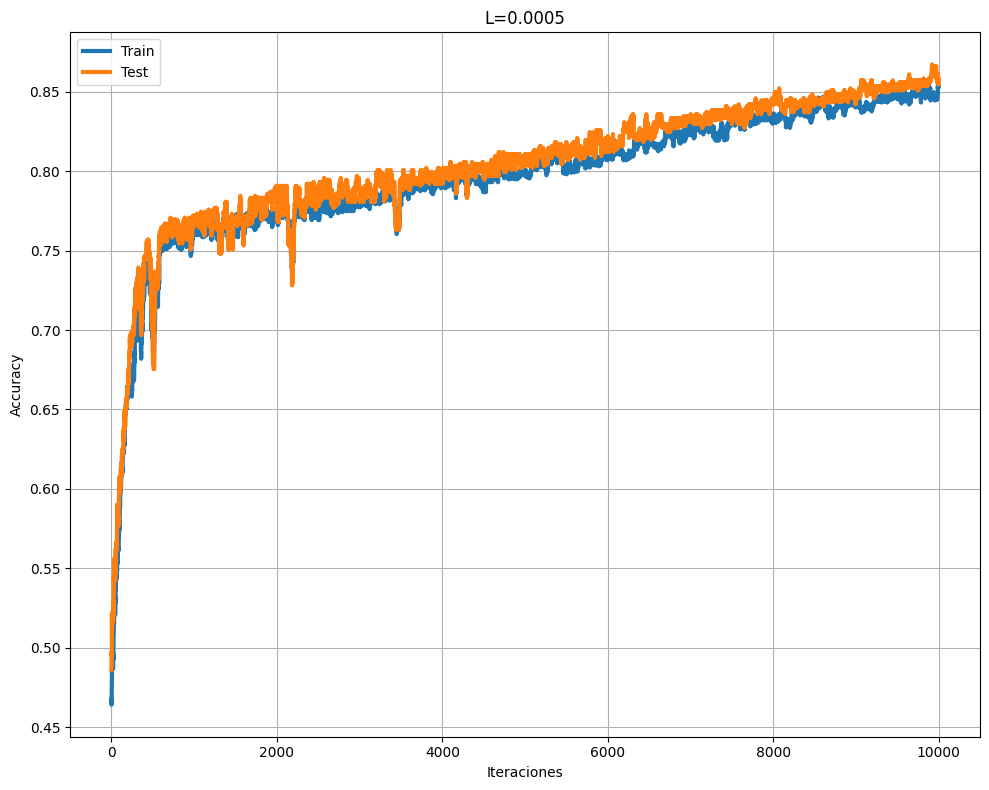

100%|██████████| 20000/20000 [00:07<00:00, 2600.70it/s]


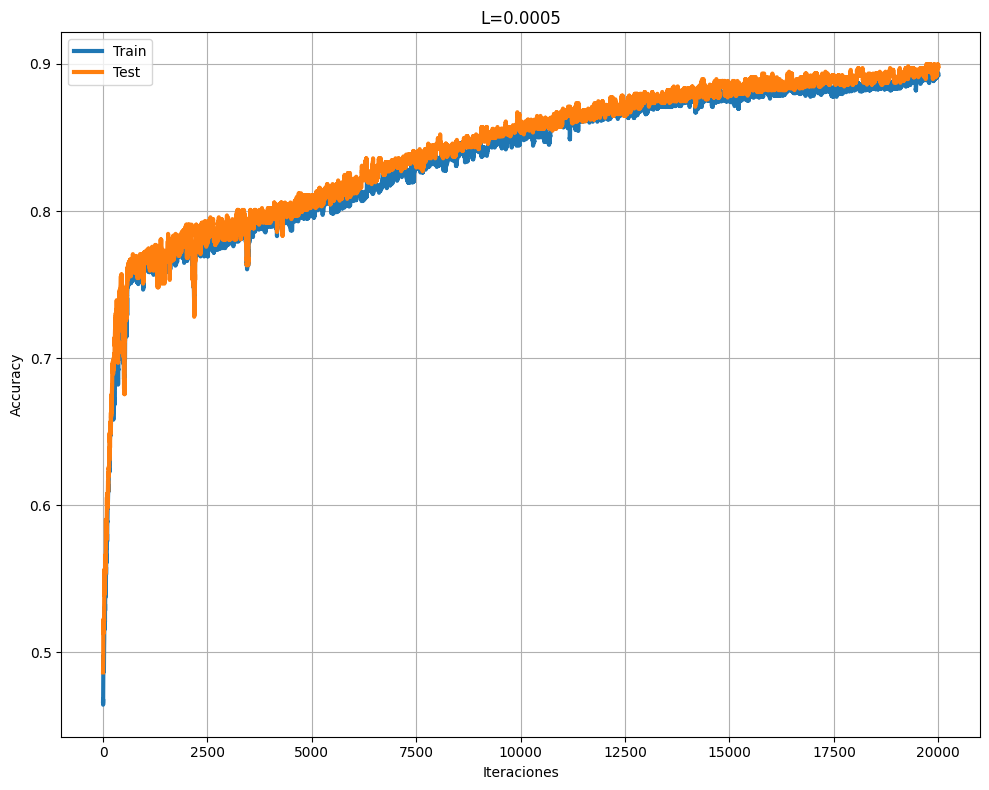

100%|██████████| 30000/30000 [00:11<00:00, 2642.96it/s]


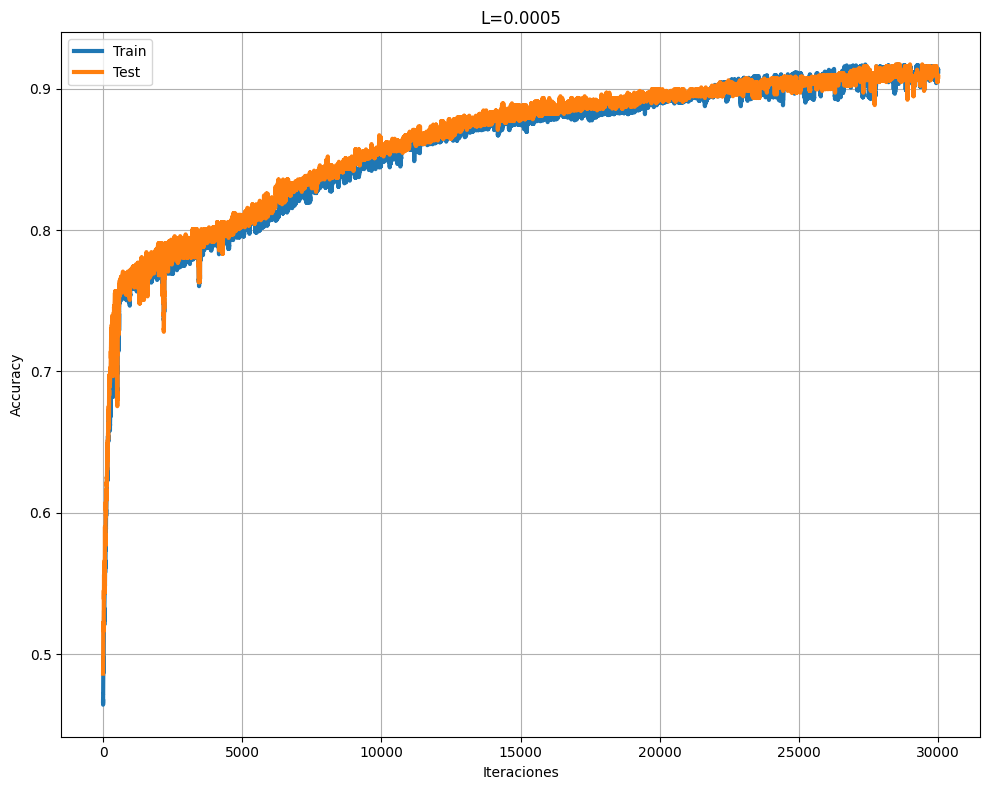

100%|██████████| 50000/50000 [00:18<00:00, 2649.08it/s]


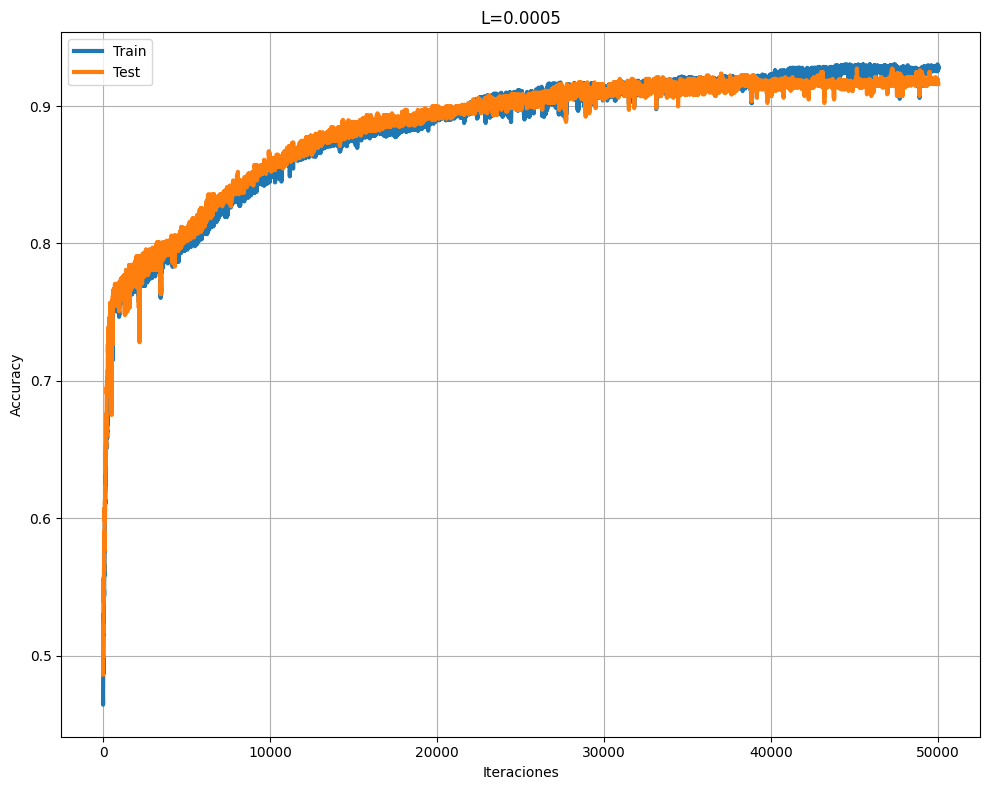

100%|██████████| 100000/100000 [00:38<00:00, 2595.08it/s]


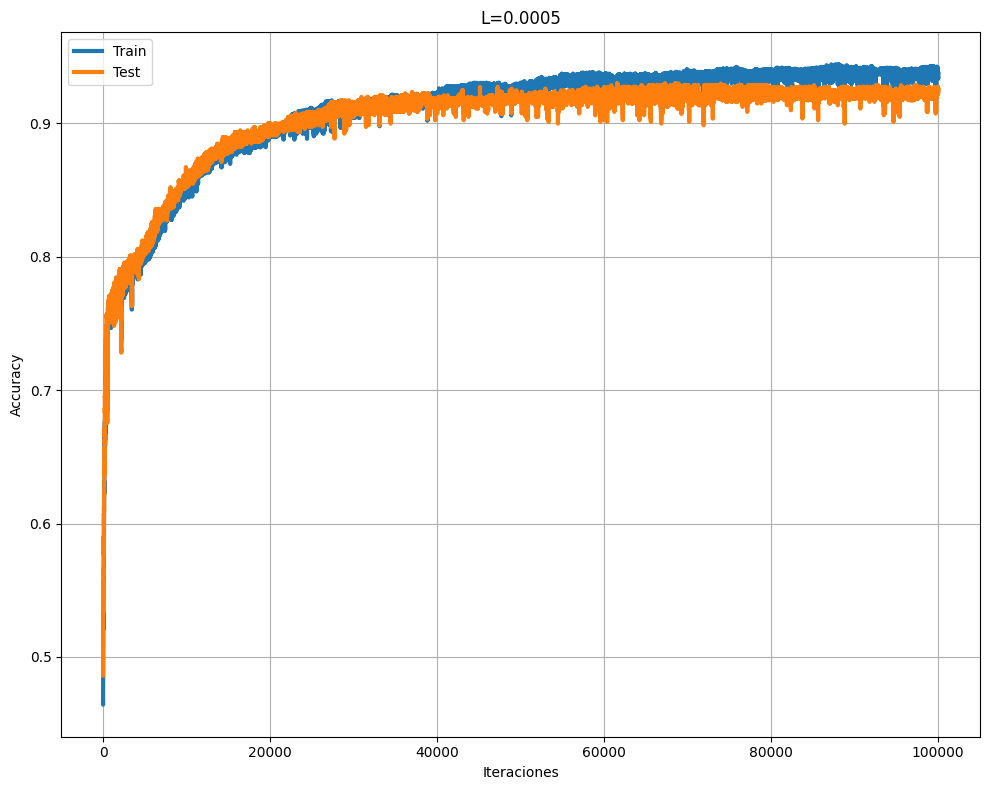

100%|██████████| 1000/1000 [00:00<00:00, 2557.97it/s]


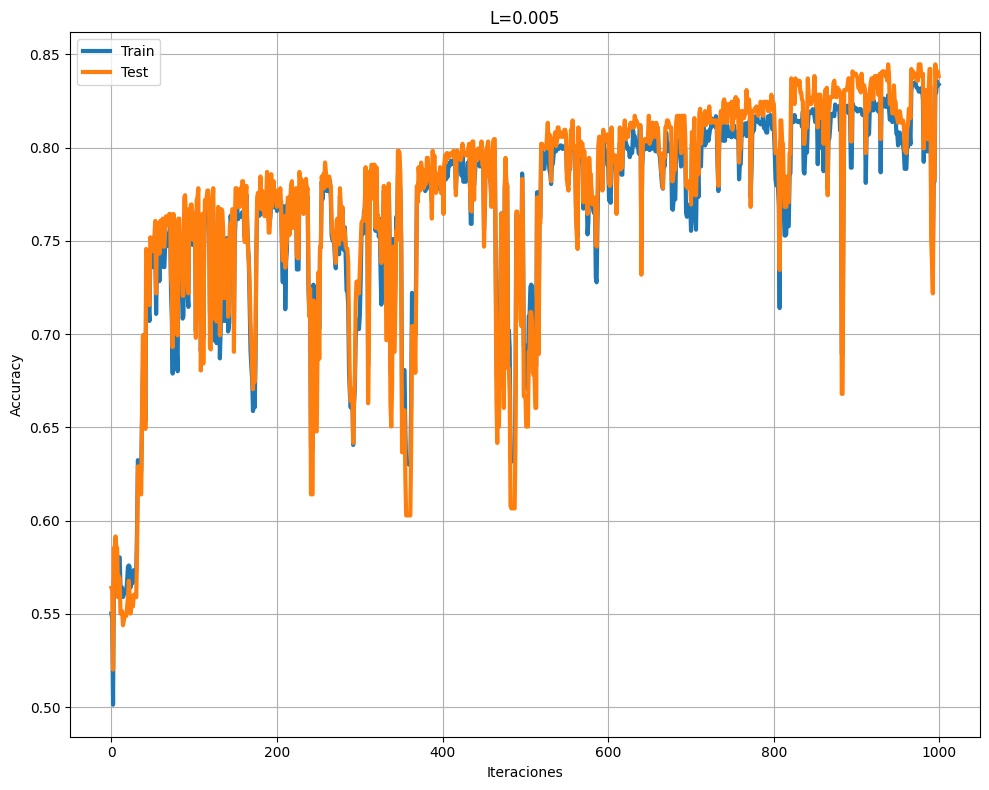

100%|██████████| 3000/3000 [00:01<00:00, 2581.82it/s]


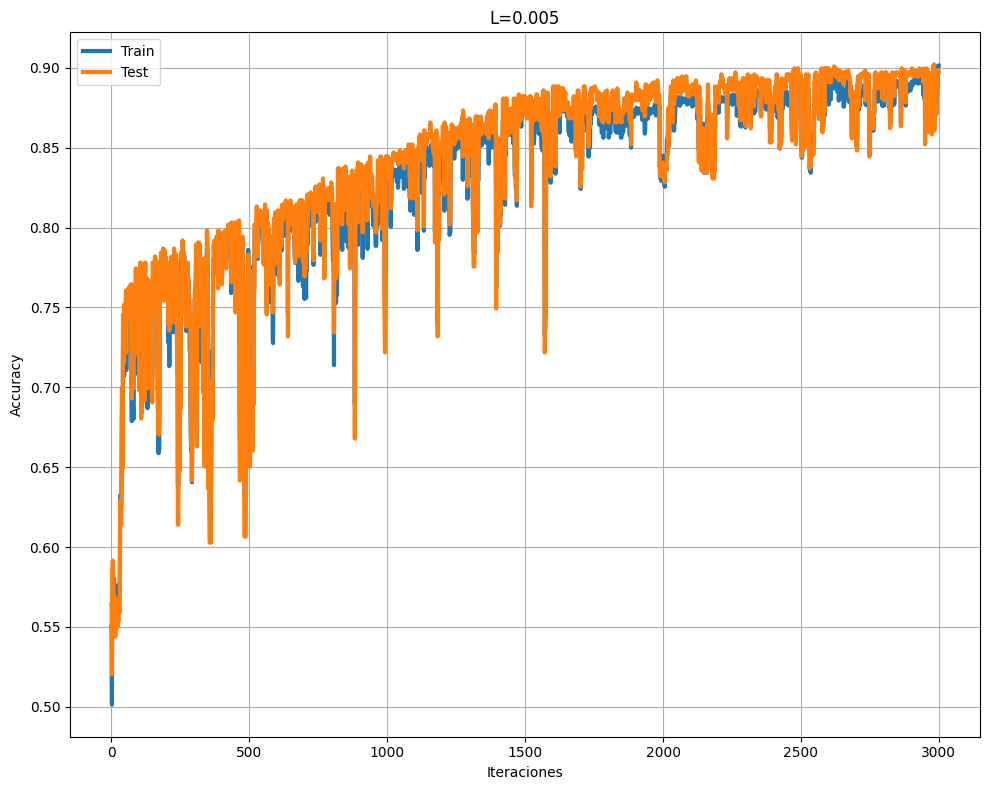

100%|██████████| 5000/5000 [00:01<00:00, 2562.23it/s]


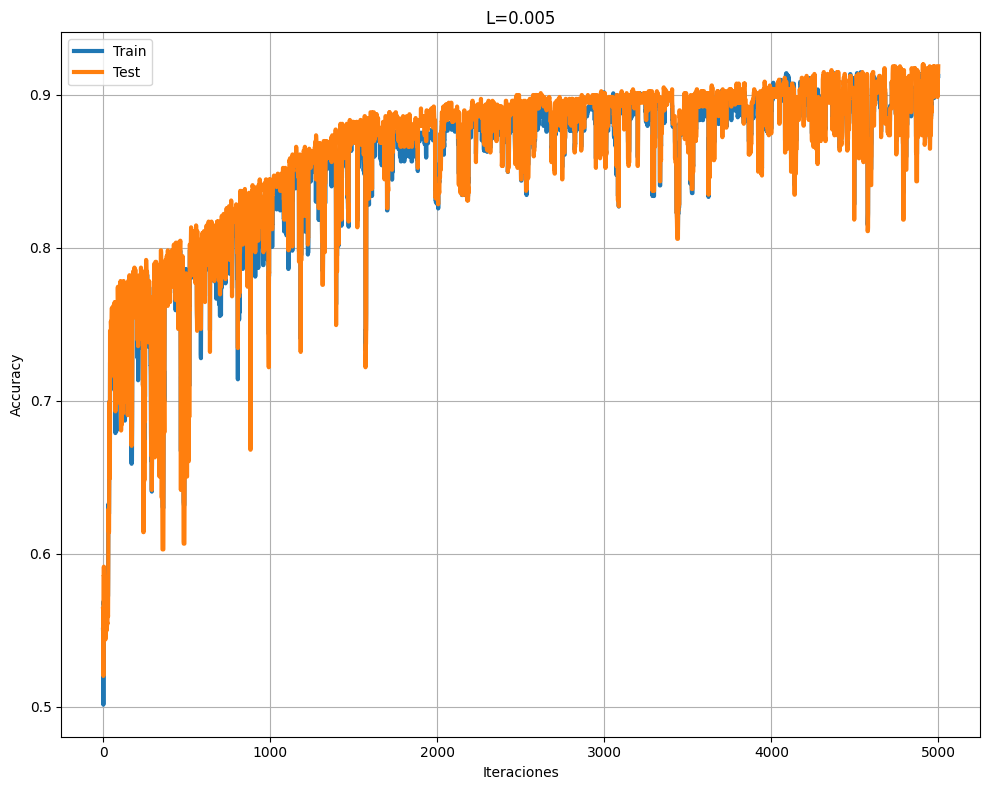

100%|██████████| 10000/10000 [00:03<00:00, 2579.29it/s]


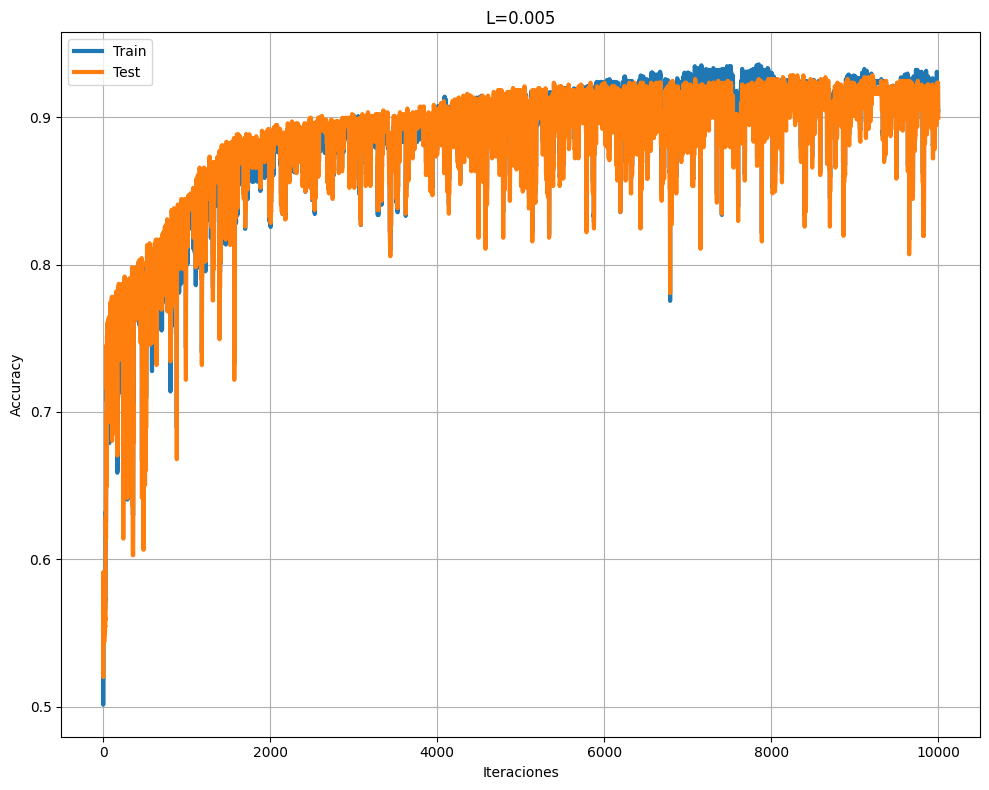

100%|██████████| 20000/20000 [00:07<00:00, 2575.88it/s]


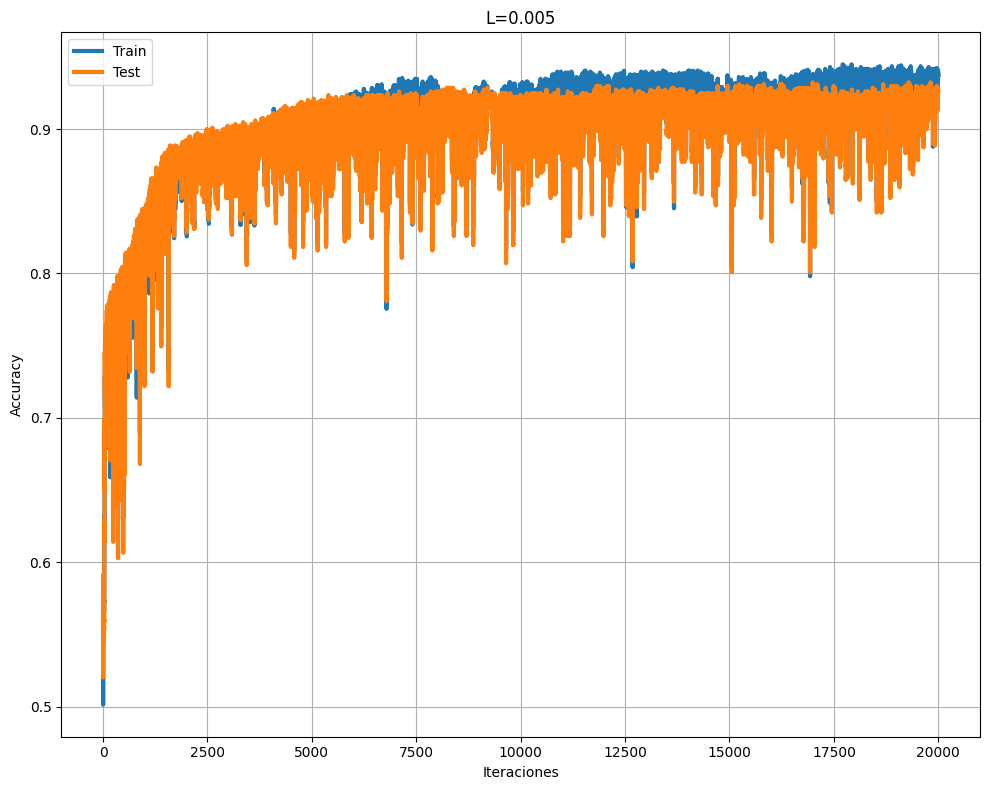

100%|██████████| 30000/30000 [00:11<00:00, 2579.07it/s]


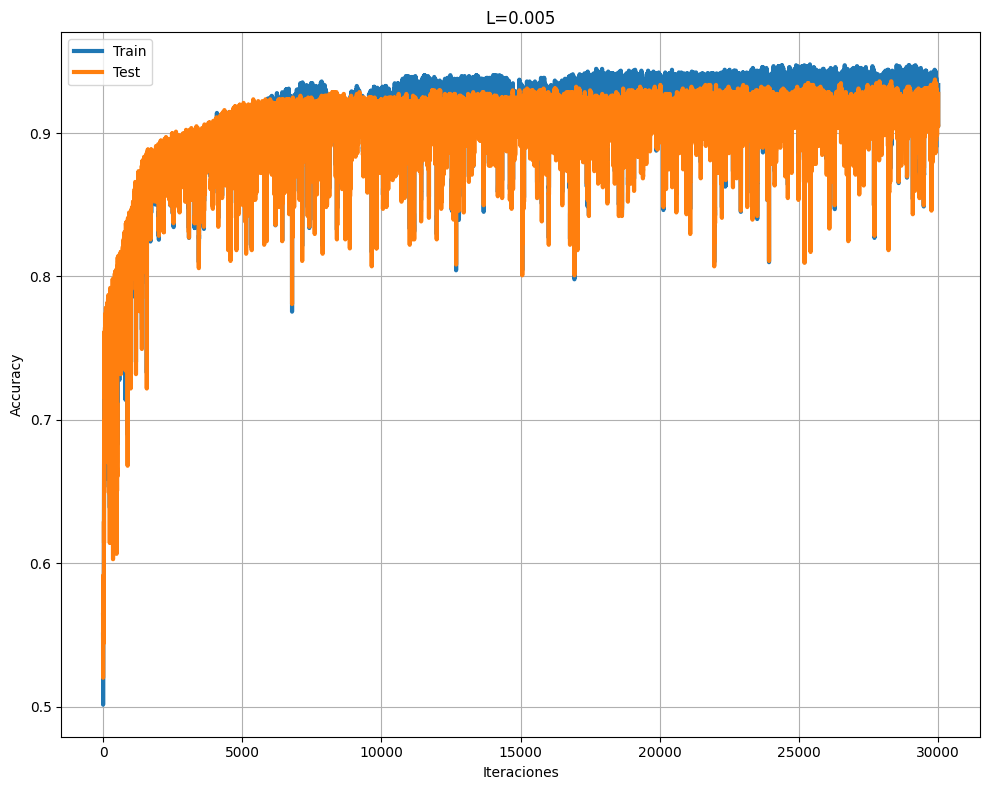

100%|██████████| 50000/50000 [00:19<00:00, 2582.46it/s]


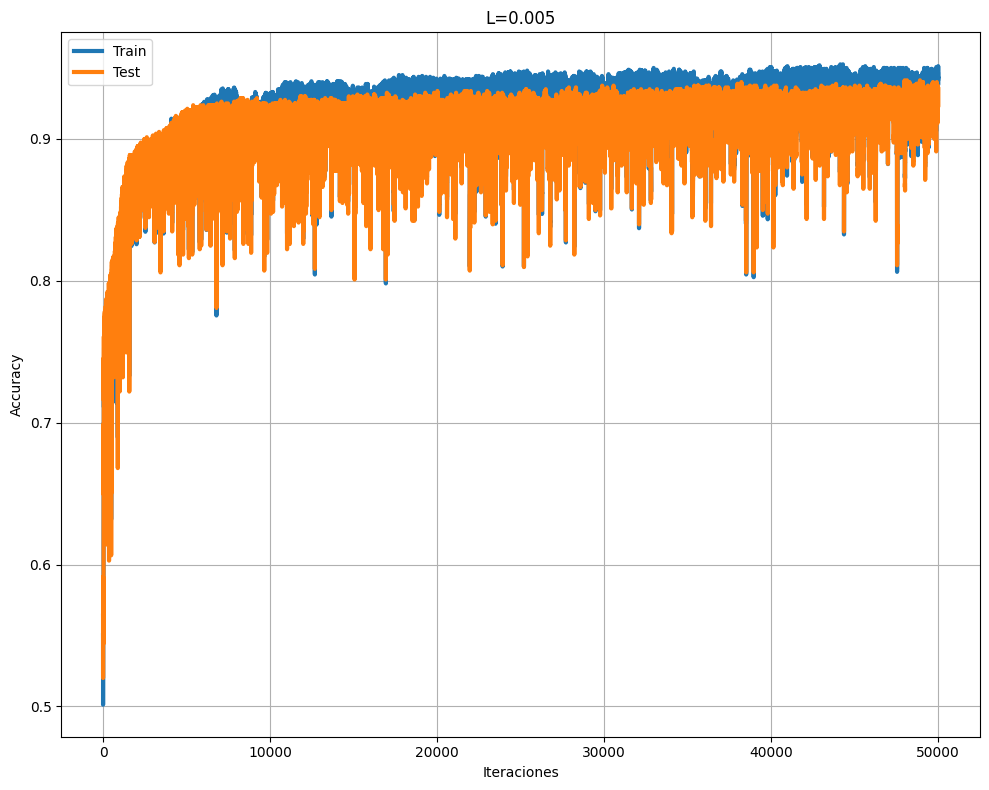

100%|██████████| 100000/100000 [00:39<00:00, 2561.55it/s]


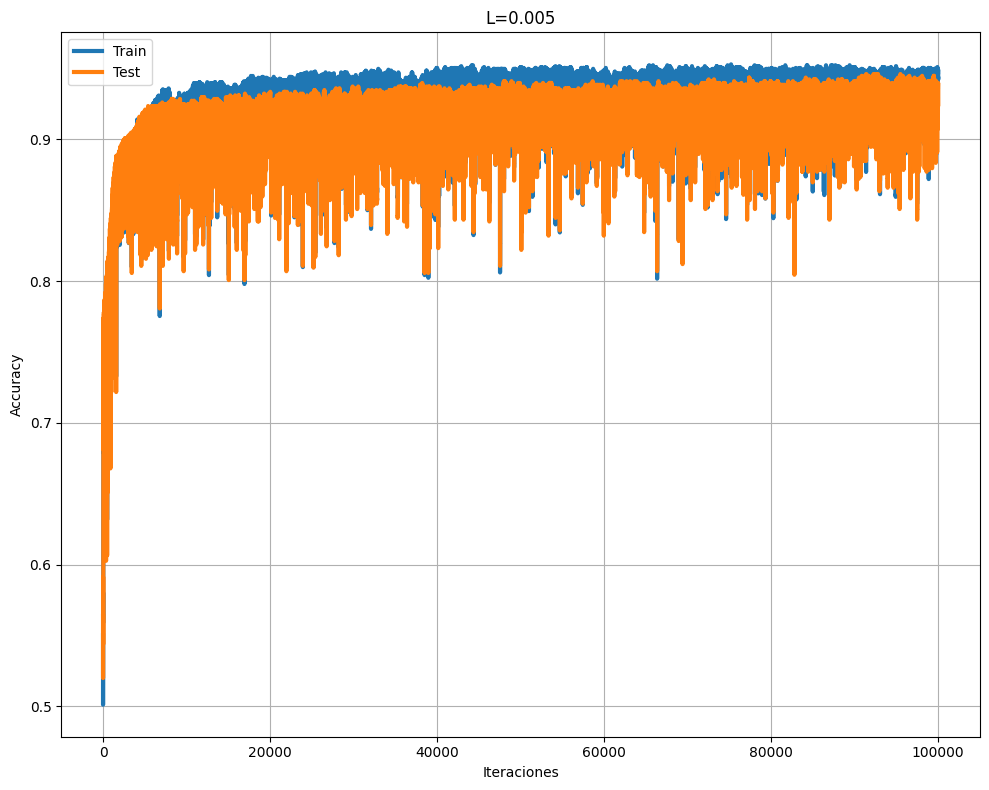

100%|██████████| 1000/1000 [00:00<00:00, 2557.23it/s]


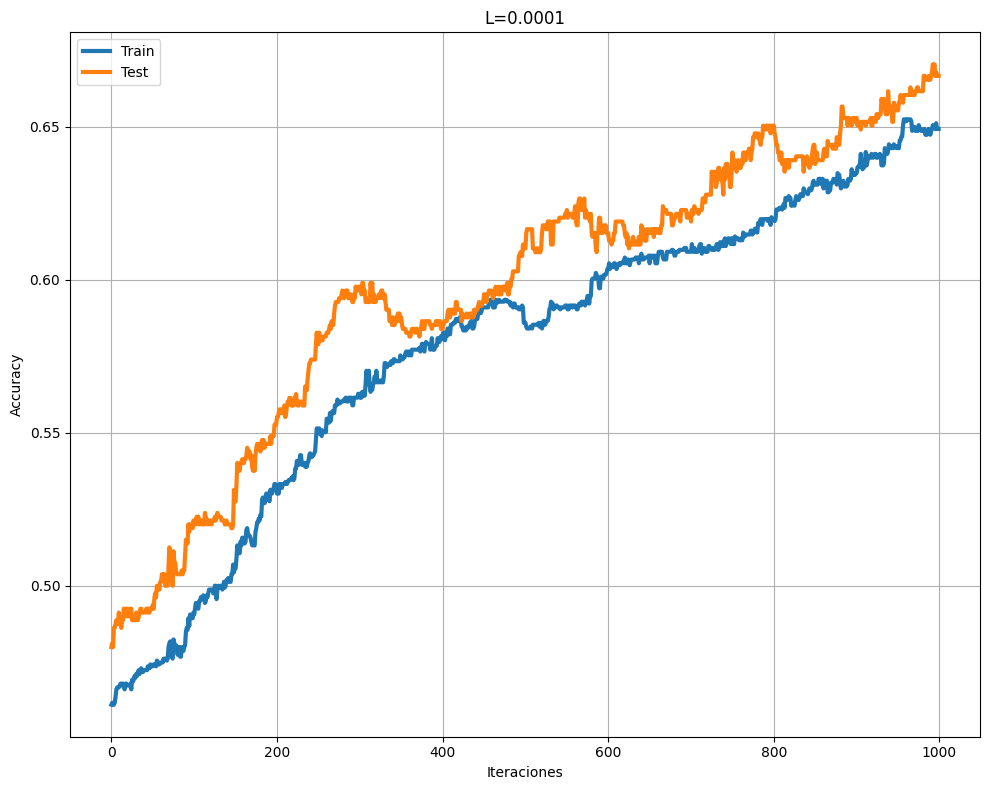

100%|██████████| 3000/3000 [00:01<00:00, 2548.83it/s]


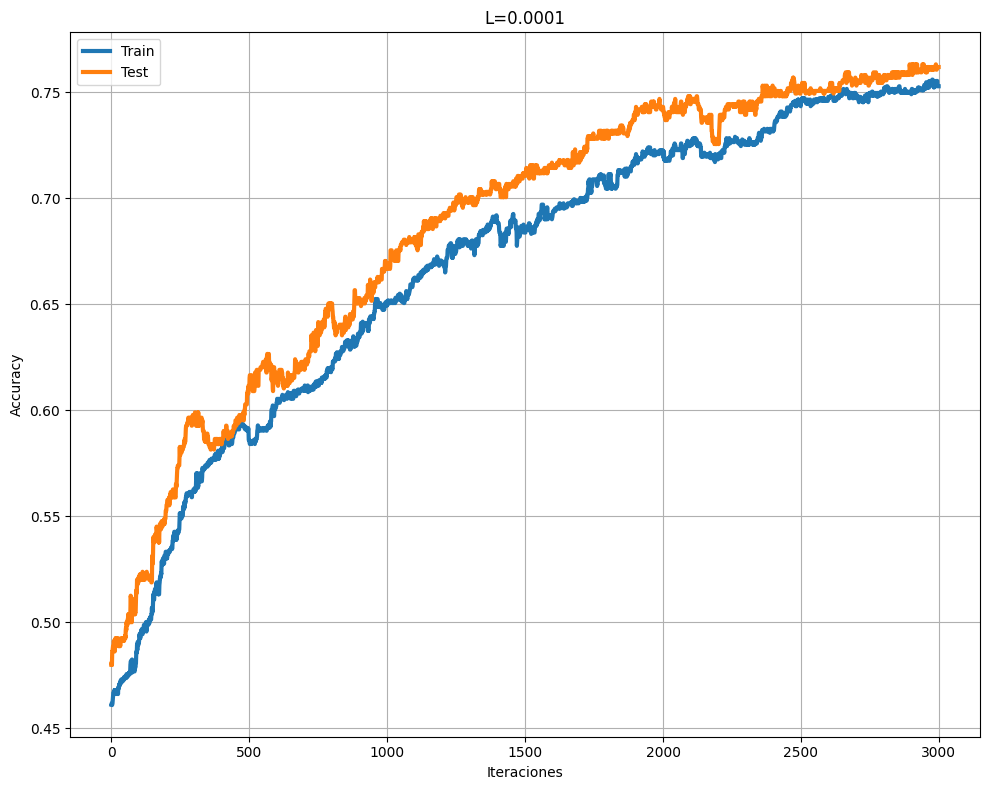

100%|██████████| 5000/5000 [00:02<00:00, 2465.14it/s]


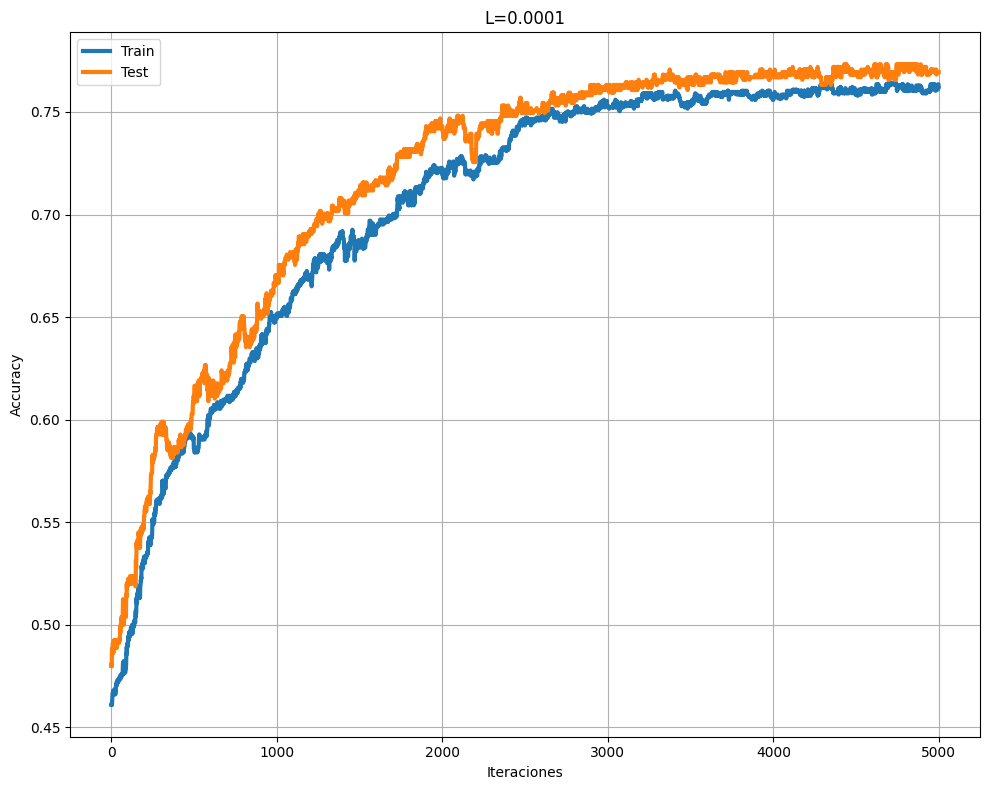

100%|██████████| 10000/10000 [00:03<00:00, 2511.39it/s]


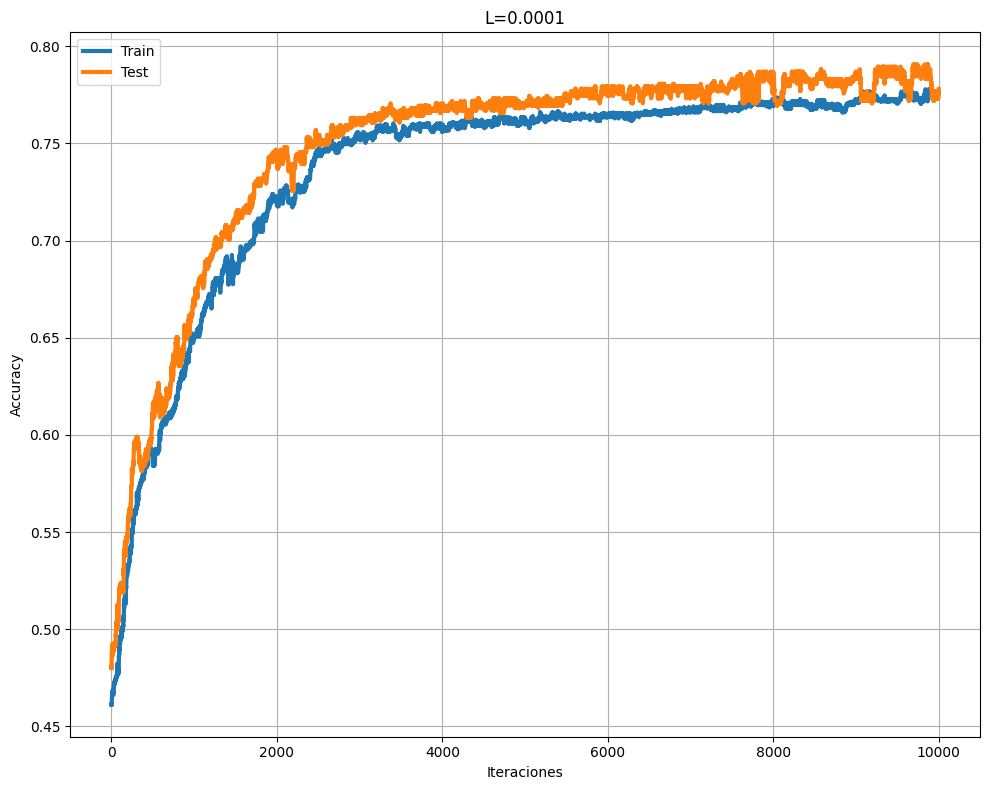

100%|██████████| 20000/20000 [00:07<00:00, 2509.98it/s]


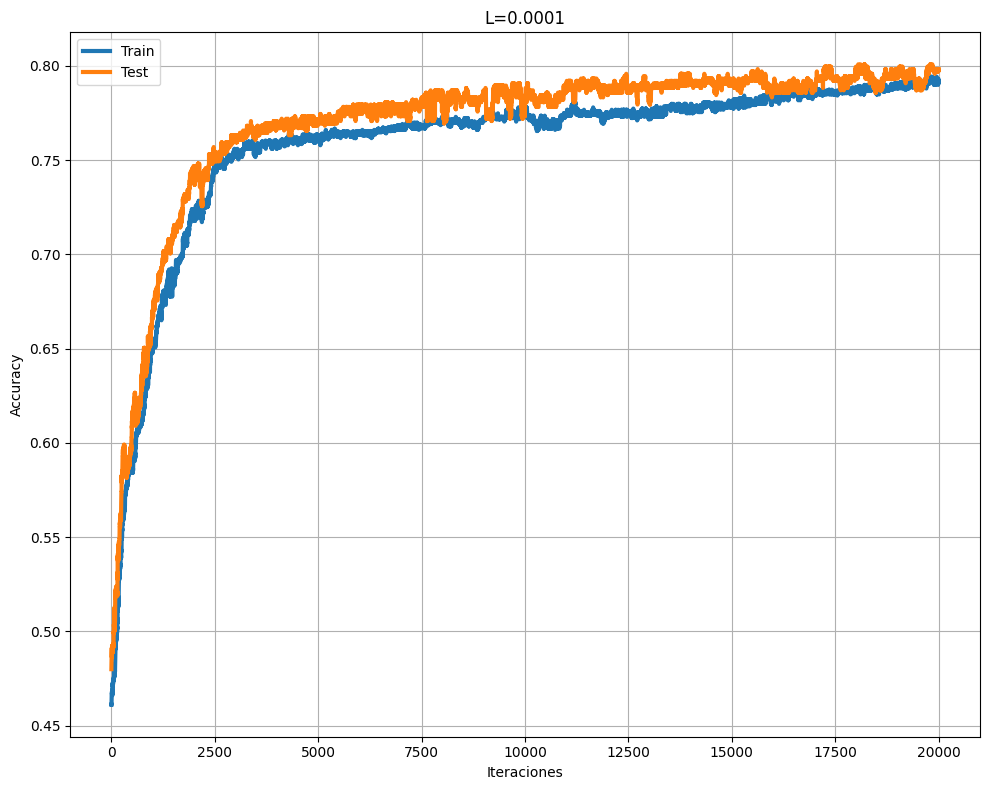

100%|██████████| 30000/30000 [00:11<00:00, 2545.68it/s]


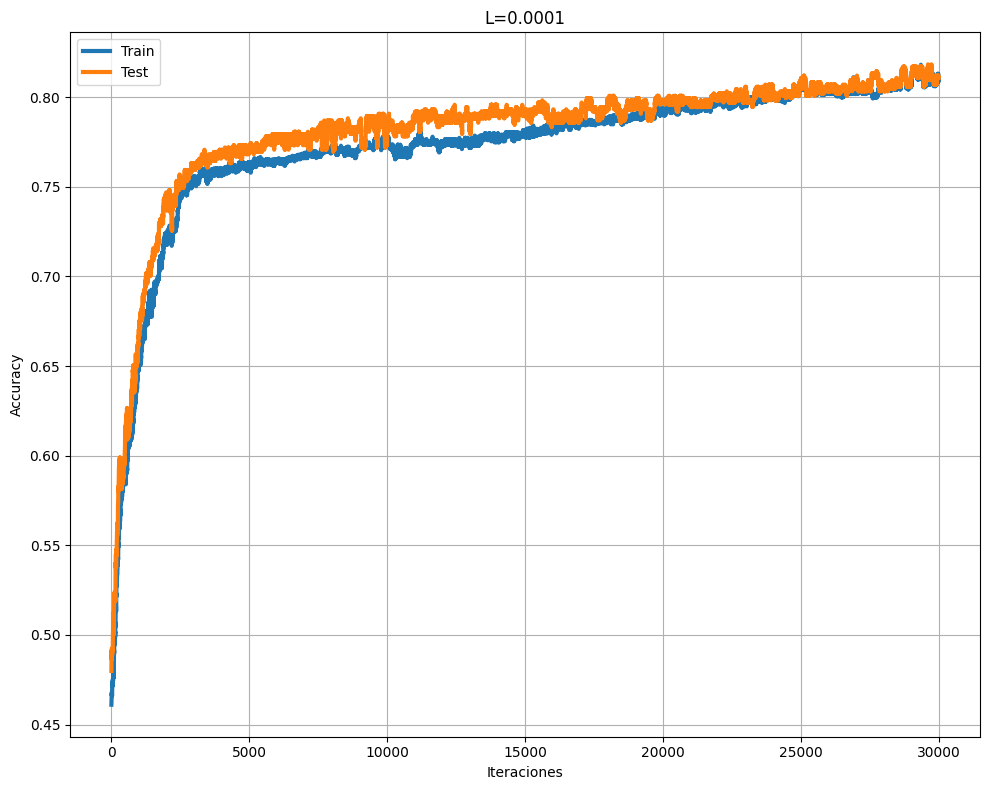

100%|██████████| 50000/50000 [00:19<00:00, 2545.65it/s]


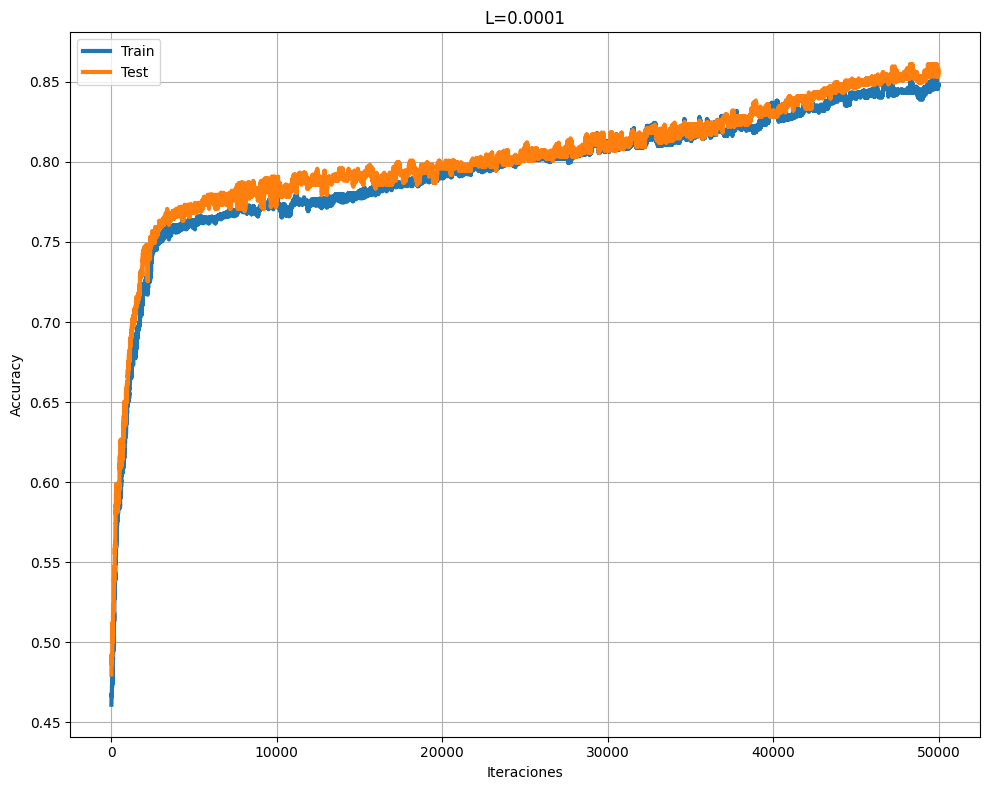

100%|██████████| 100000/100000 [00:39<00:00, 2533.69it/s]


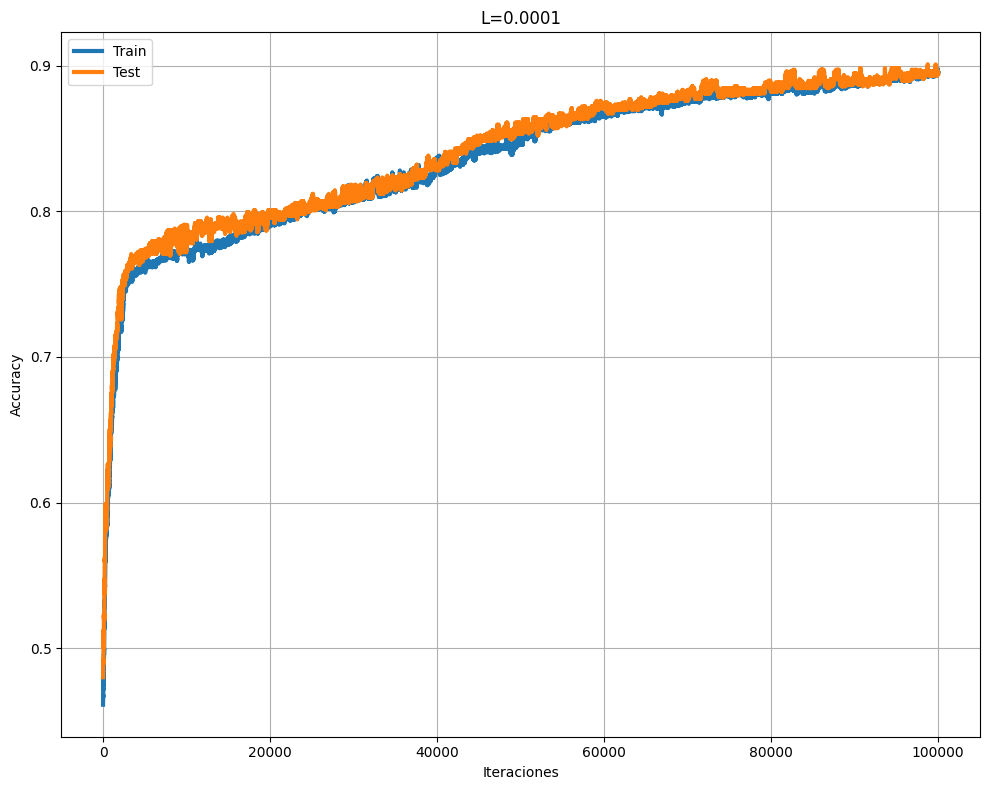

100%|██████████| 1000/1000 [00:00<00:00, 2500.39it/s]


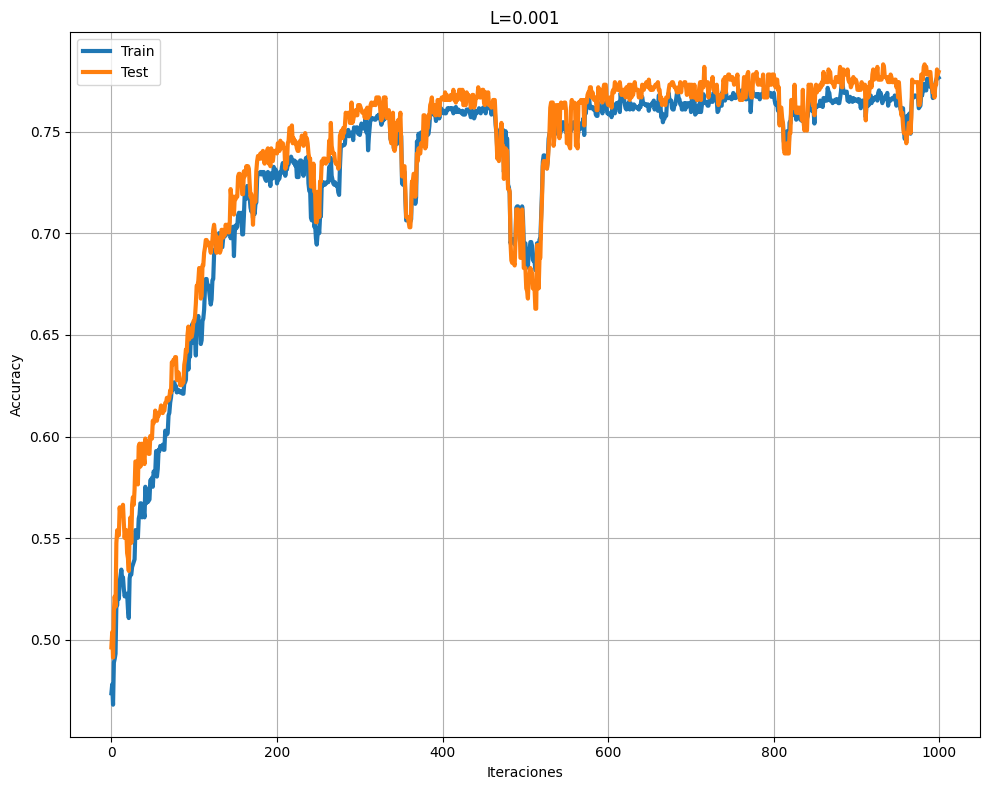

100%|██████████| 3000/3000 [00:01<00:00, 2512.88it/s]


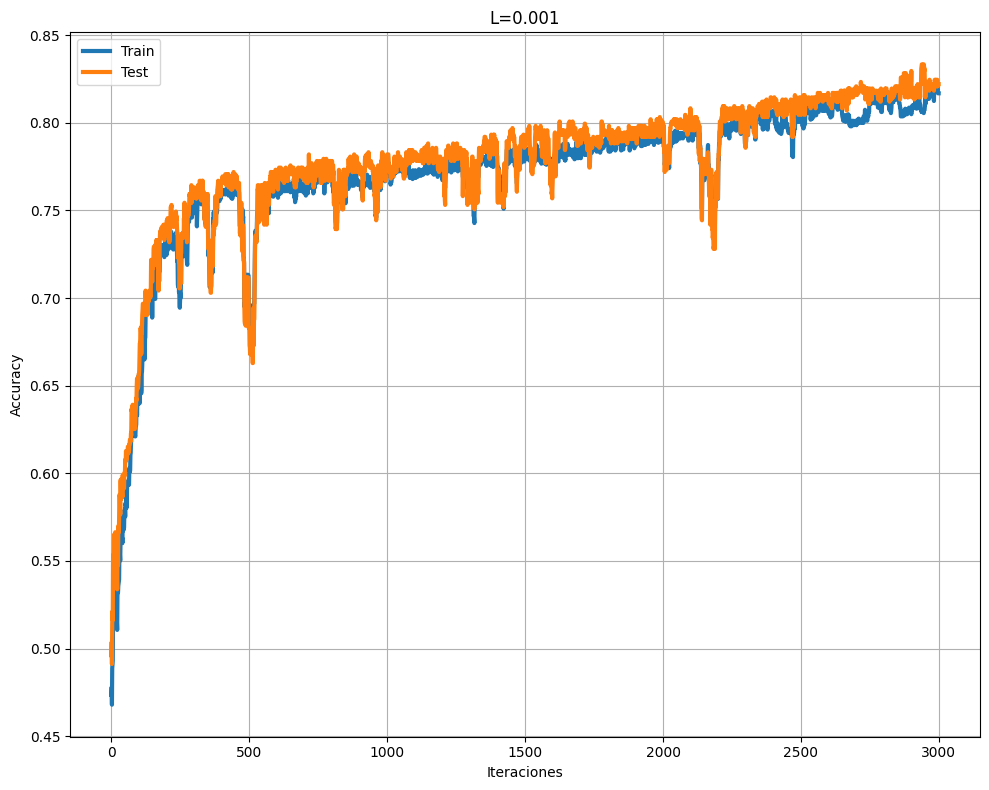

100%|██████████| 5000/5000 [00:01<00:00, 2528.57it/s]


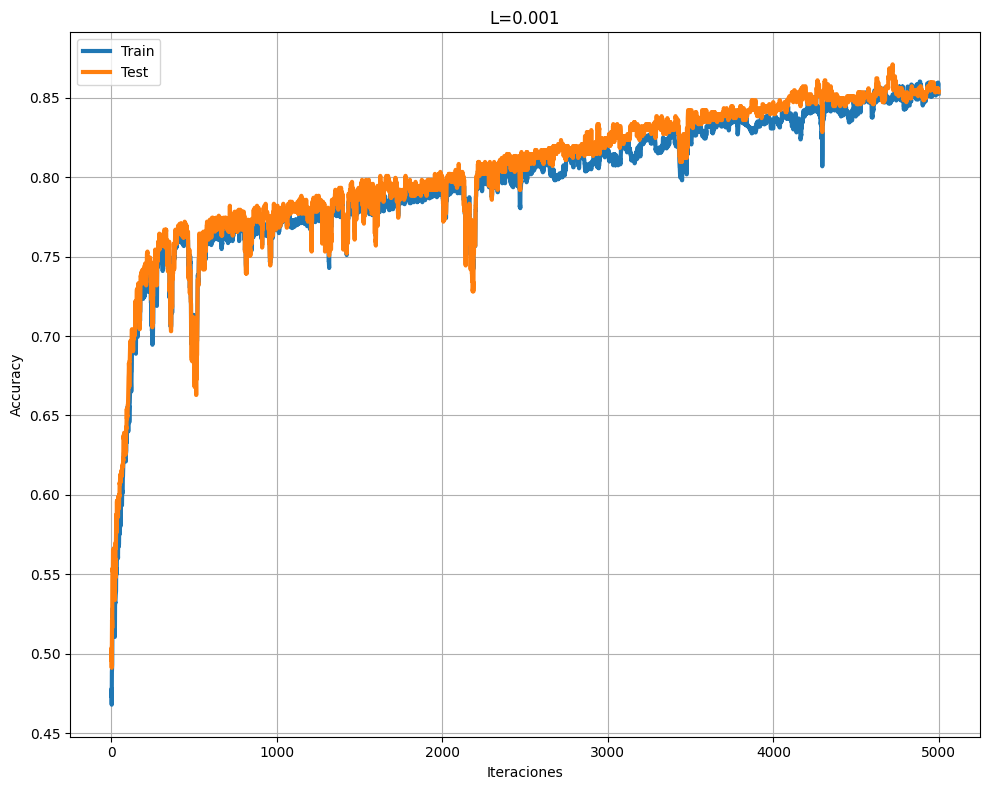

100%|██████████| 10000/10000 [00:03<00:00, 2535.83it/s]


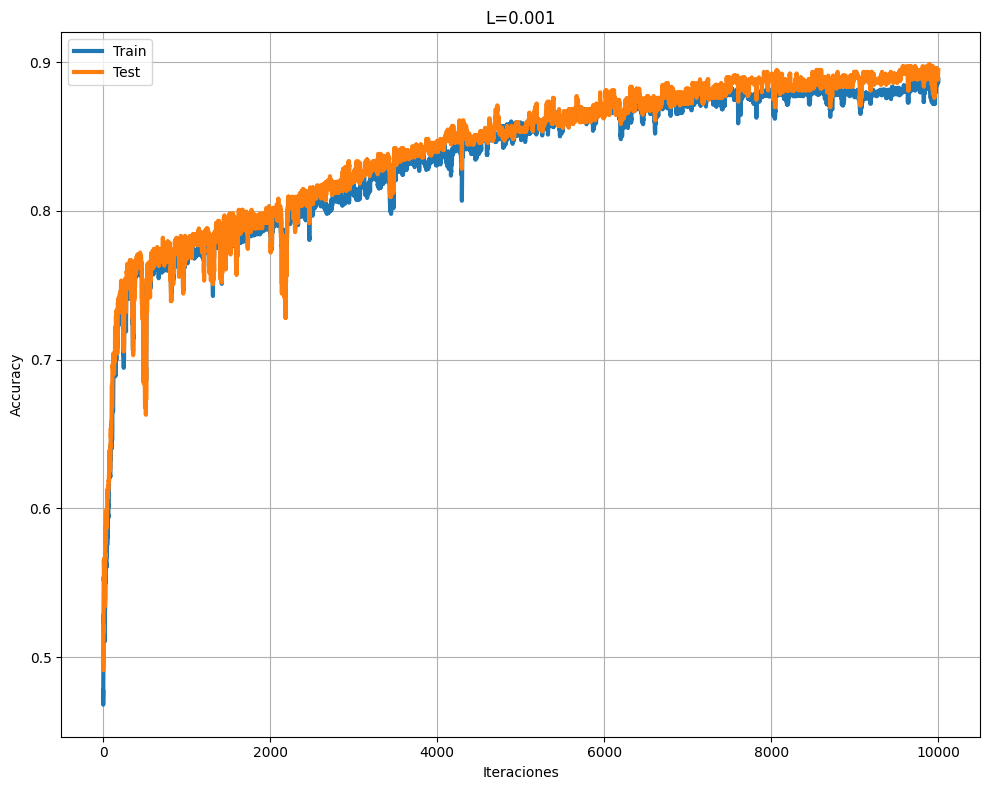

100%|██████████| 20000/20000 [00:07<00:00, 2547.01it/s]


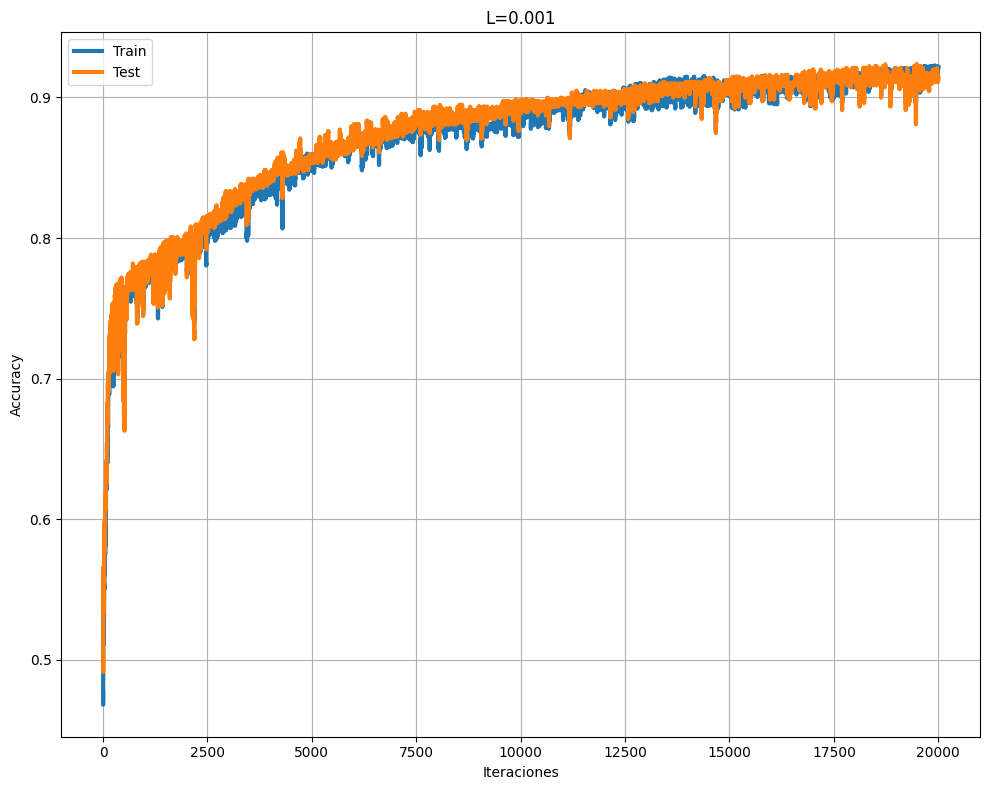

100%|██████████| 30000/30000 [00:11<00:00, 2561.36it/s]


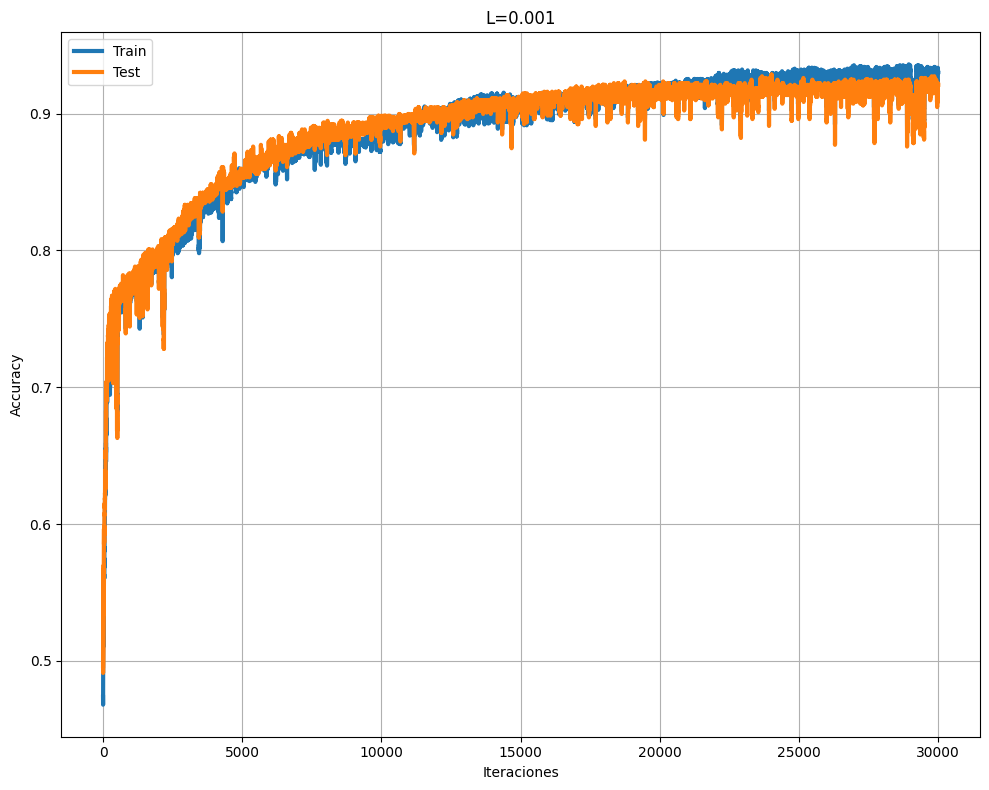

100%|██████████| 50000/50000 [00:19<00:00, 2562.12it/s]


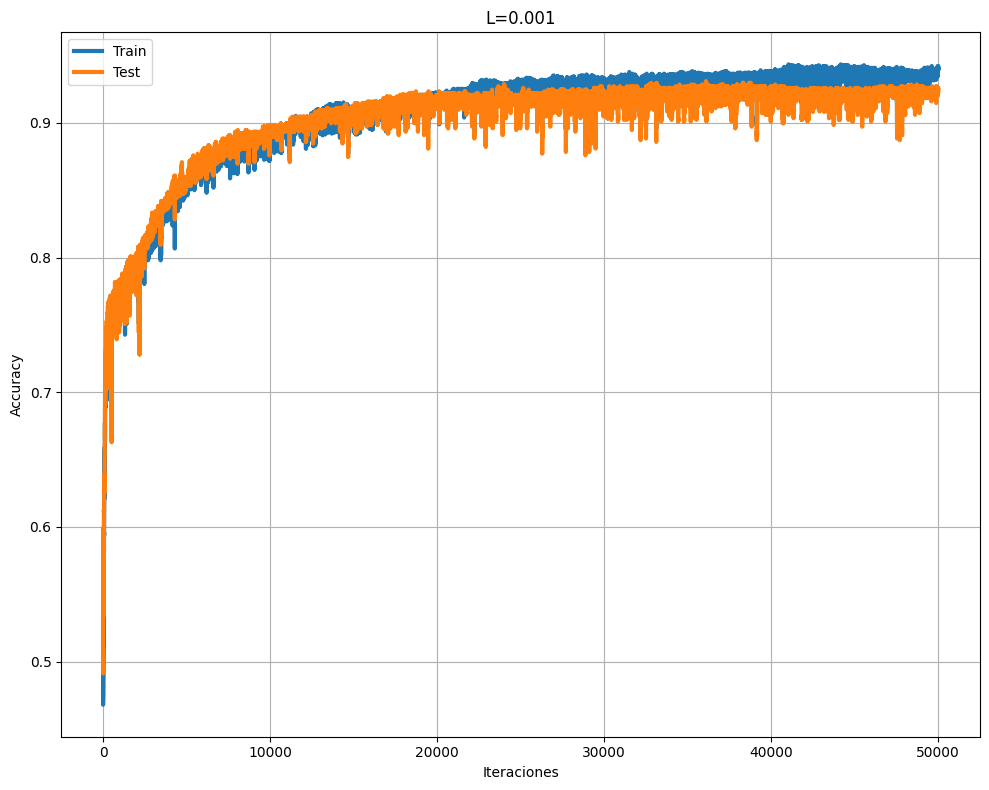

100%|██████████| 100000/100000 [00:39<00:00, 2562.15it/s]


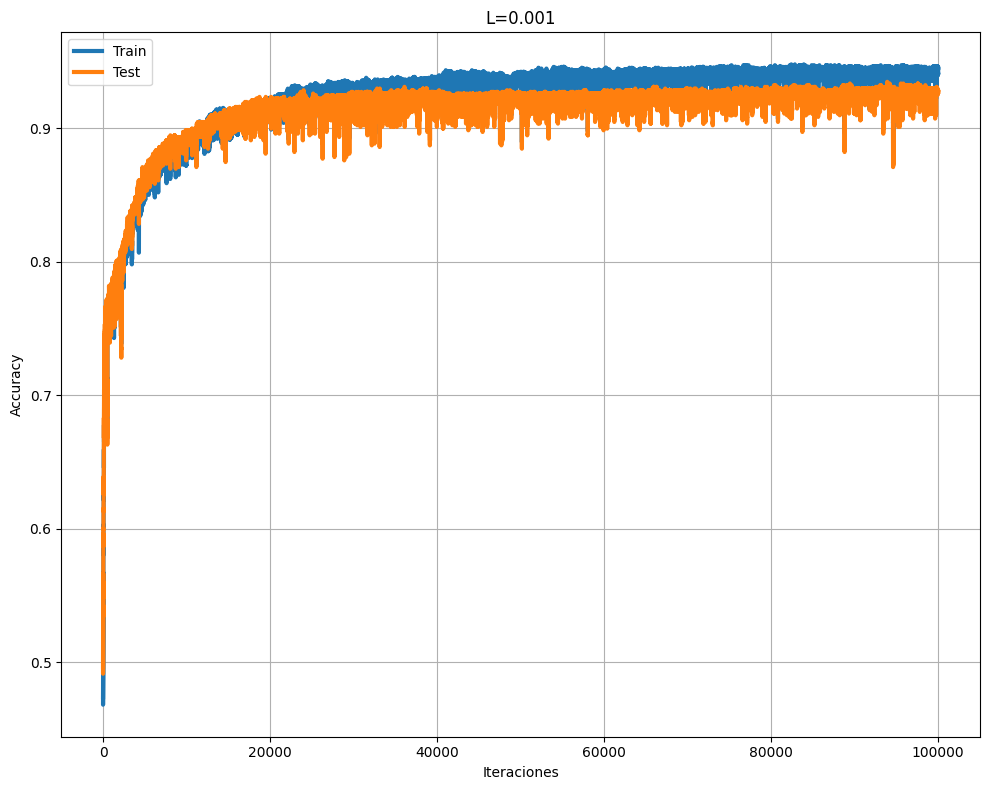

100%|██████████| 1000/1000 [00:00<00:00, 2555.95it/s]


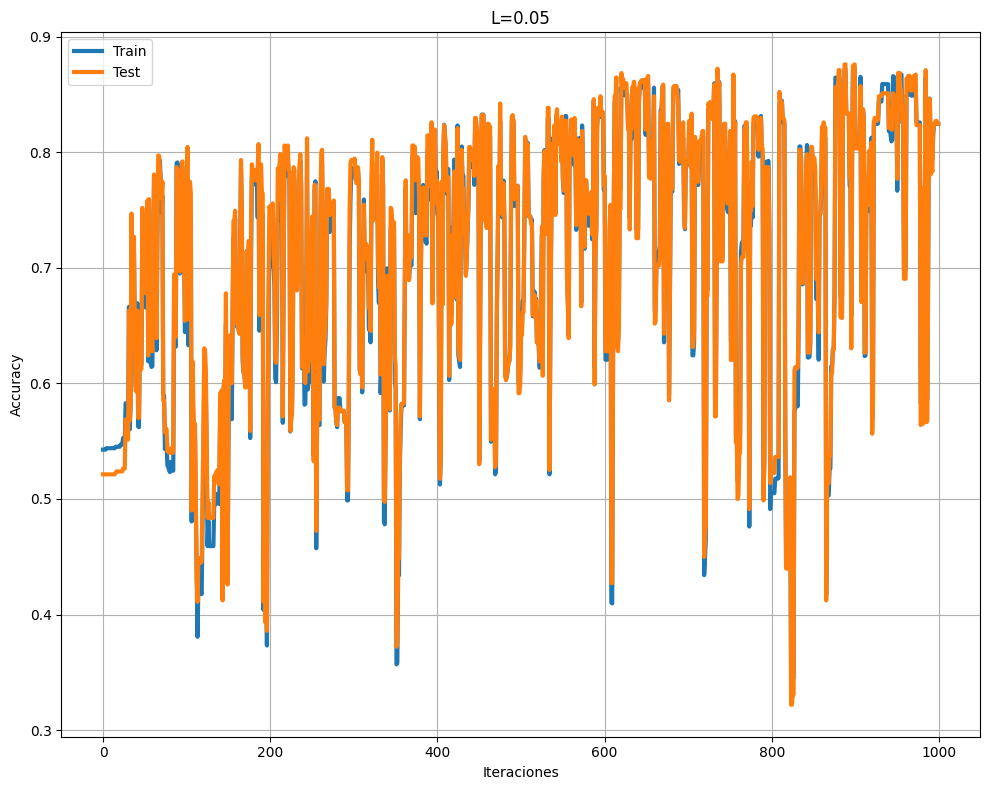

100%|██████████| 3000/3000 [00:01<00:00, 2523.33it/s]


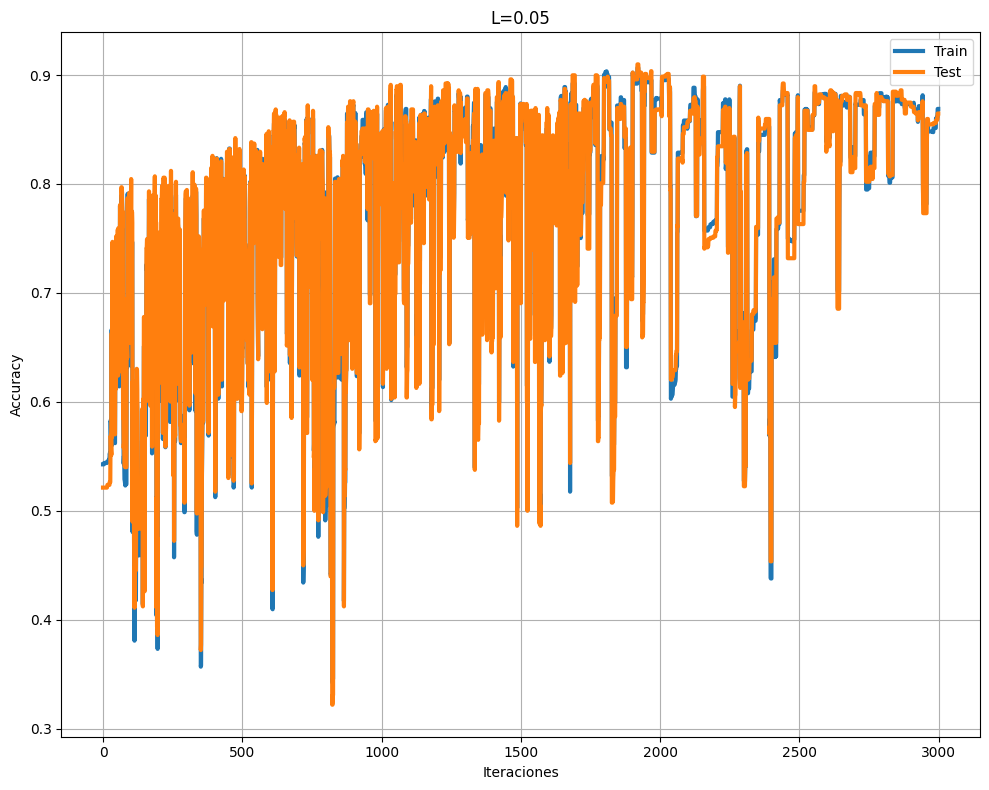

100%|██████████| 5000/5000 [00:01<00:00, 2523.39it/s]


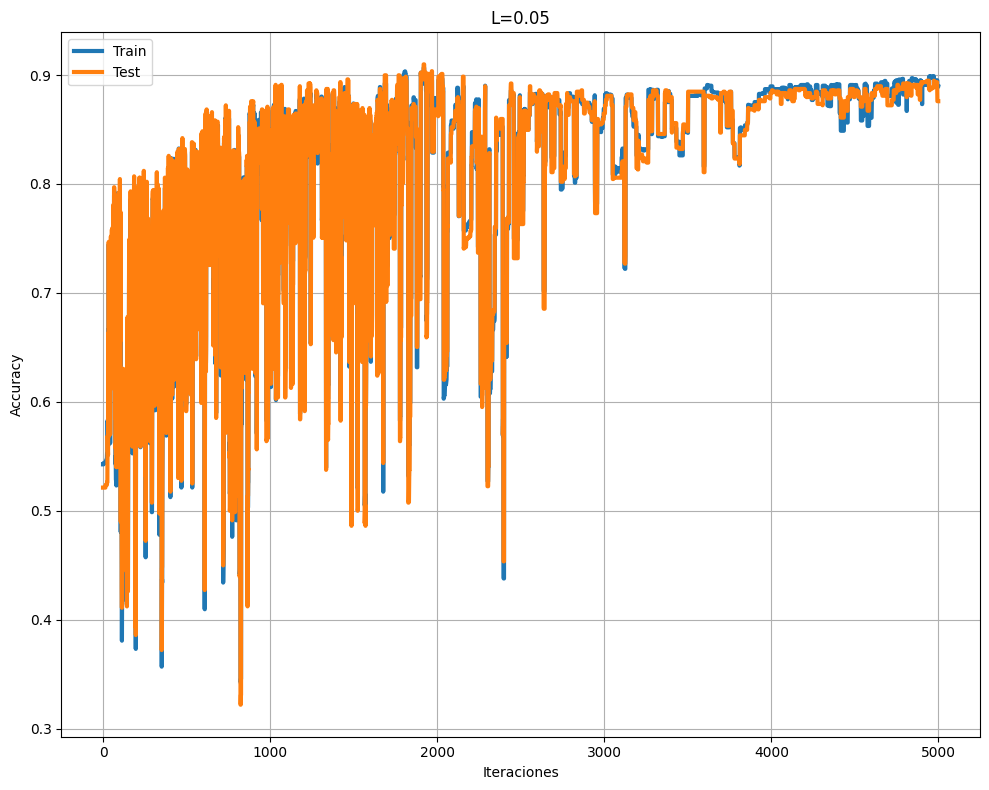

100%|██████████| 10000/10000 [00:03<00:00, 2541.52it/s]


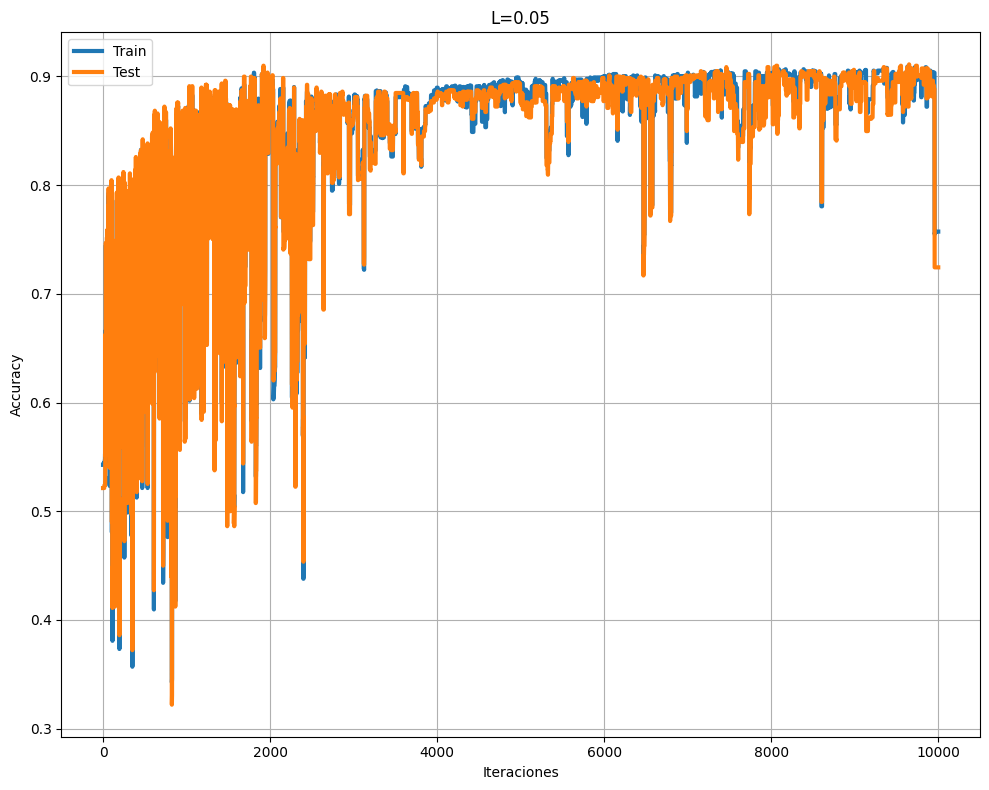

100%|██████████| 20000/20000 [00:07<00:00, 2553.25it/s]


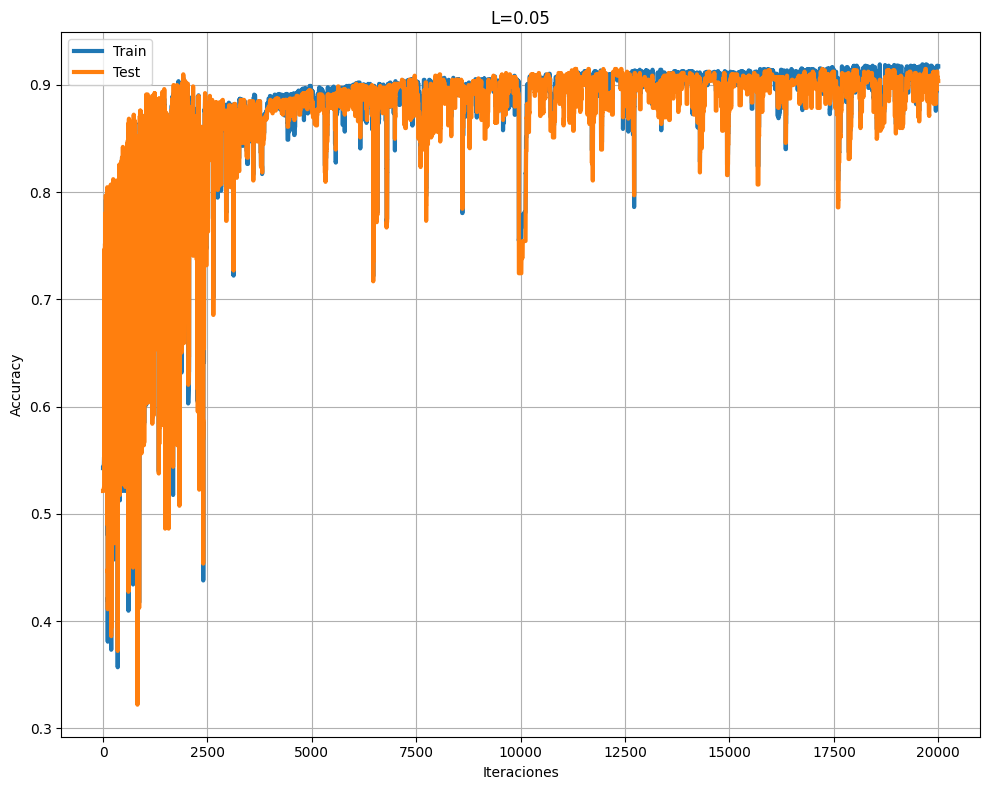

100%|██████████| 30000/30000 [00:11<00:00, 2571.10it/s]


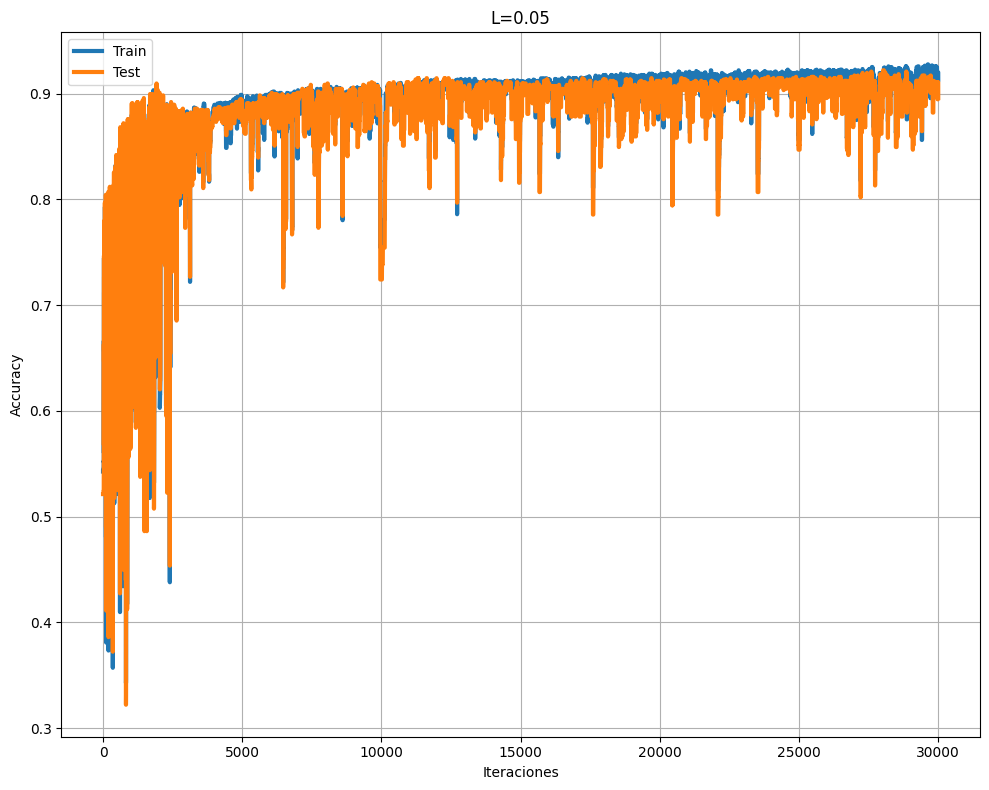

100%|██████████| 50000/50000 [00:19<00:00, 2554.59it/s]


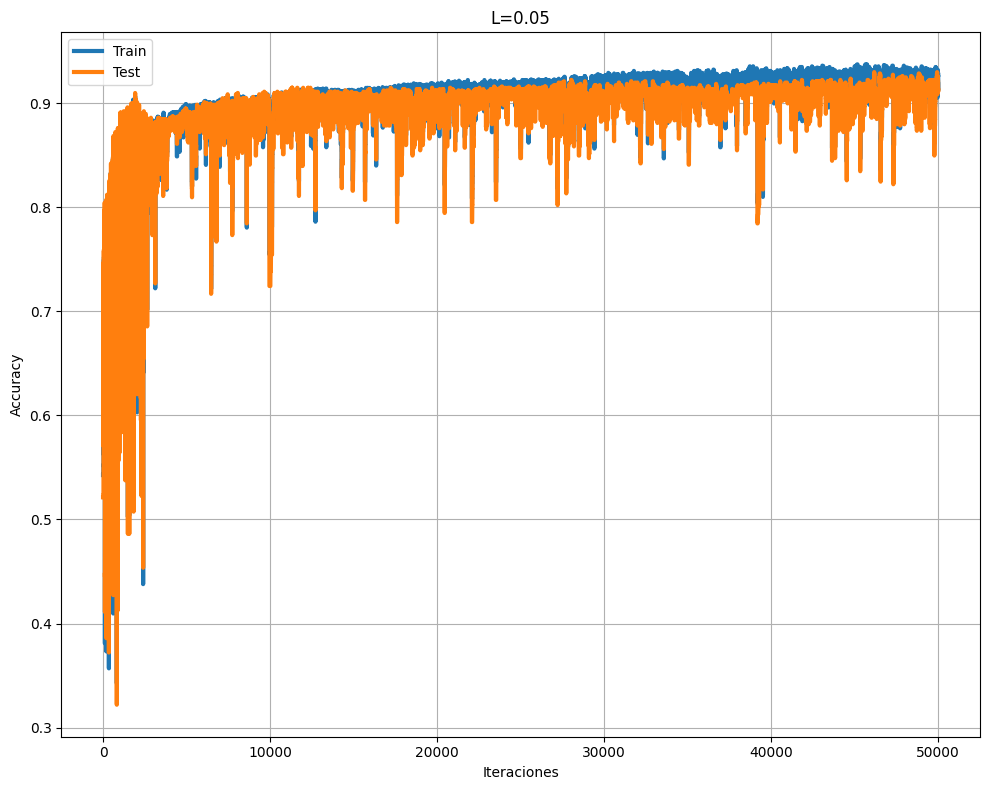

100%|██████████| 100000/100000 [00:38<00:00, 2564.42it/s]


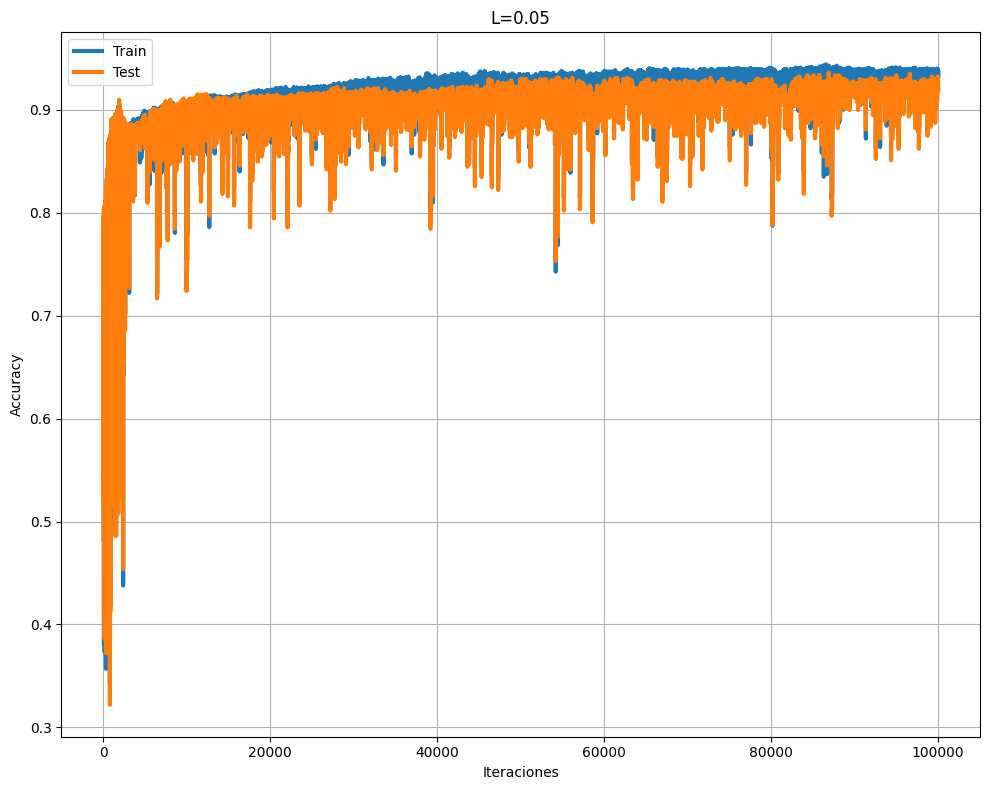

100%|██████████| 1000/1000 [00:00<00:00, 2466.92it/s]


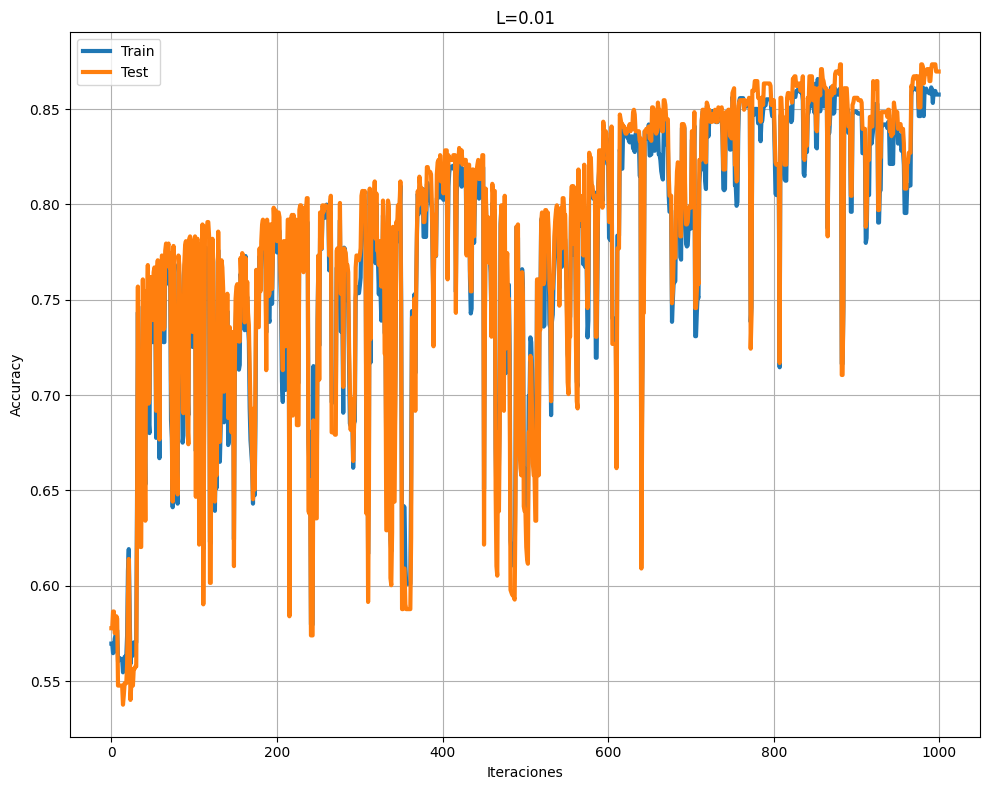

100%|██████████| 3000/3000 [00:01<00:00, 2564.13it/s]


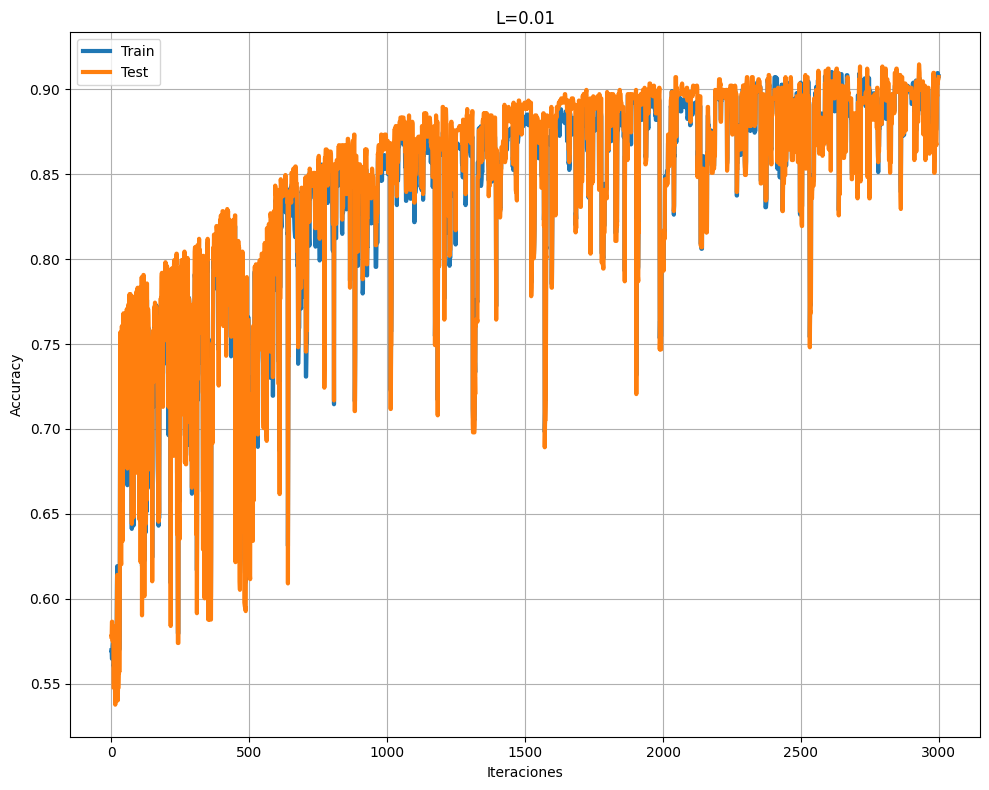

100%|██████████| 5000/5000 [00:02<00:00, 2390.14it/s]


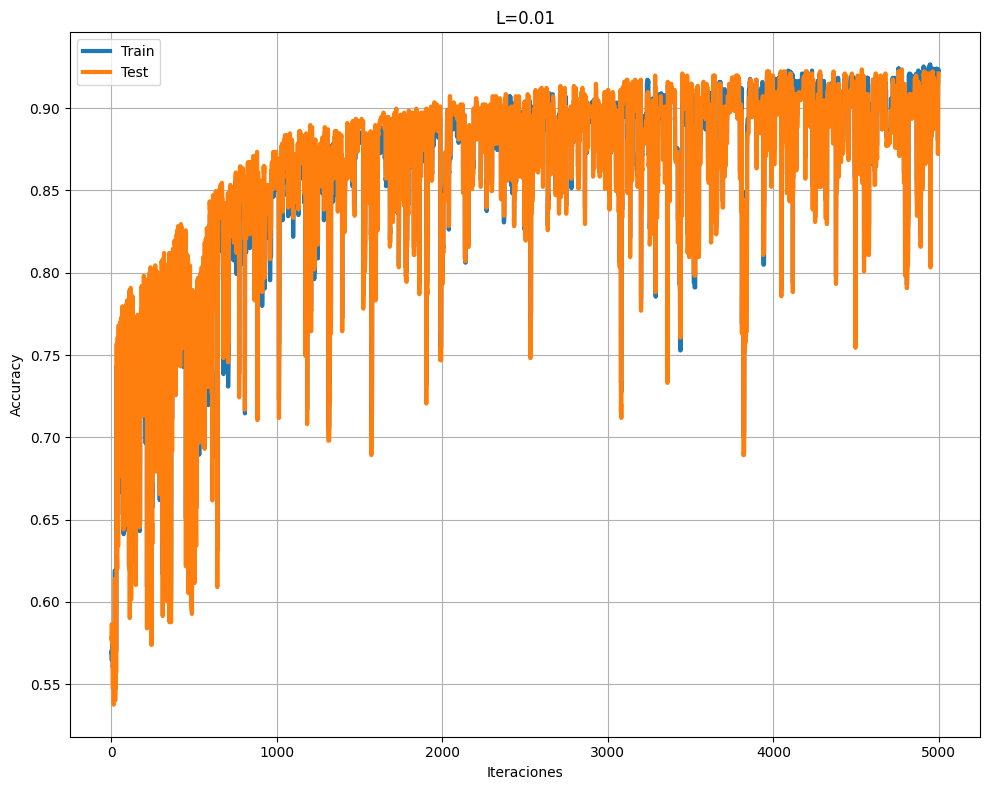

100%|██████████| 10000/10000 [00:04<00:00, 2379.72it/s]


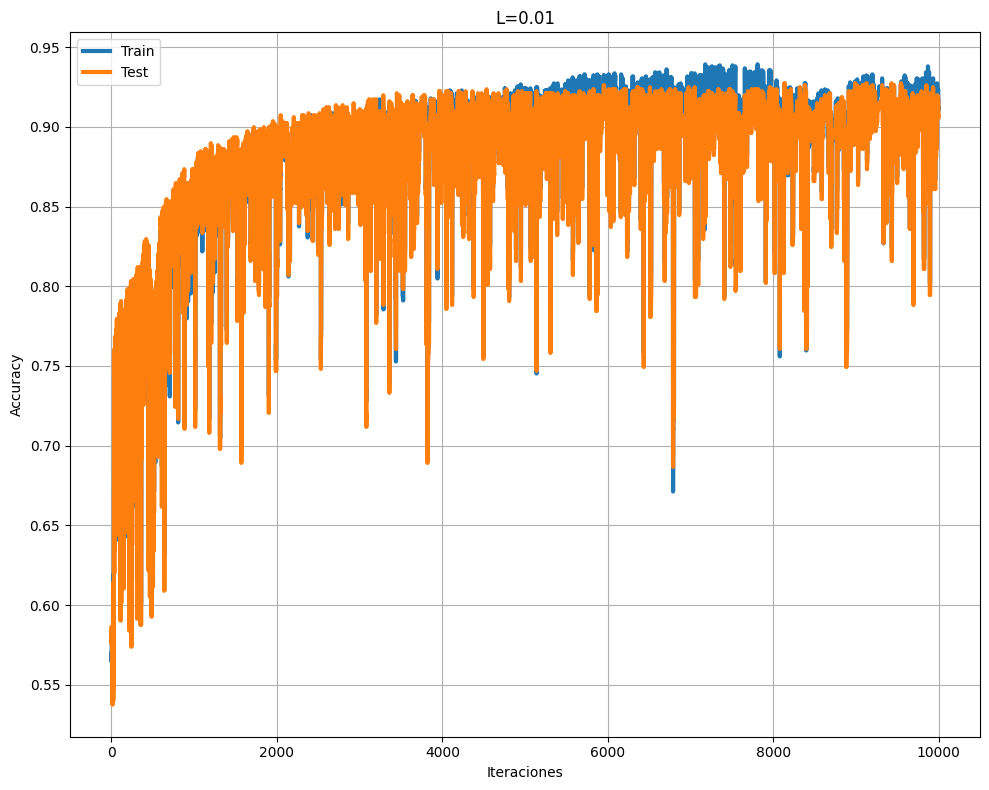

100%|██████████| 20000/20000 [00:08<00:00, 2435.87it/s]


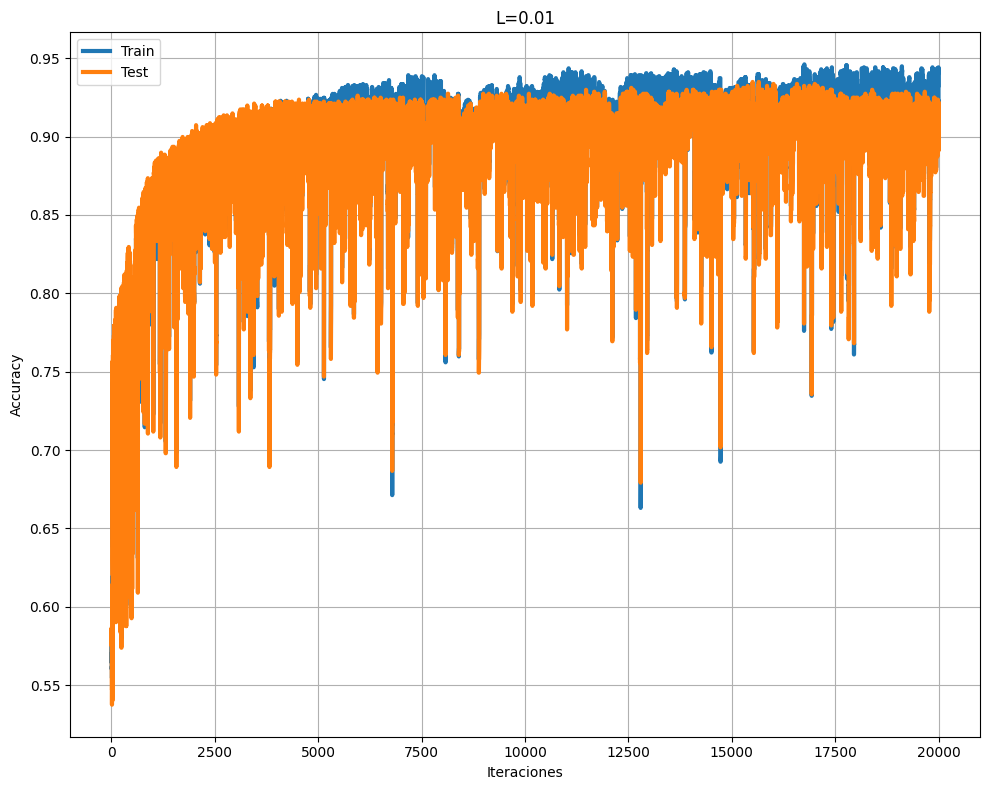

100%|██████████| 30000/30000 [00:12<00:00, 2452.67it/s]


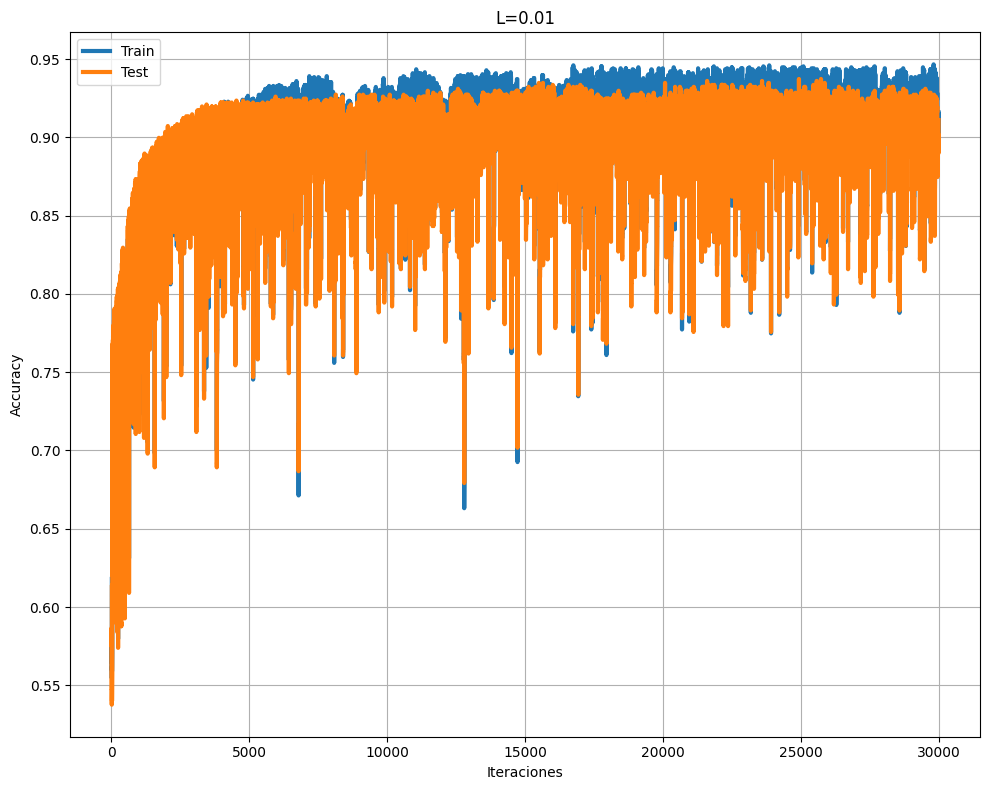

100%|██████████| 50000/50000 [00:20<00:00, 2409.98it/s]


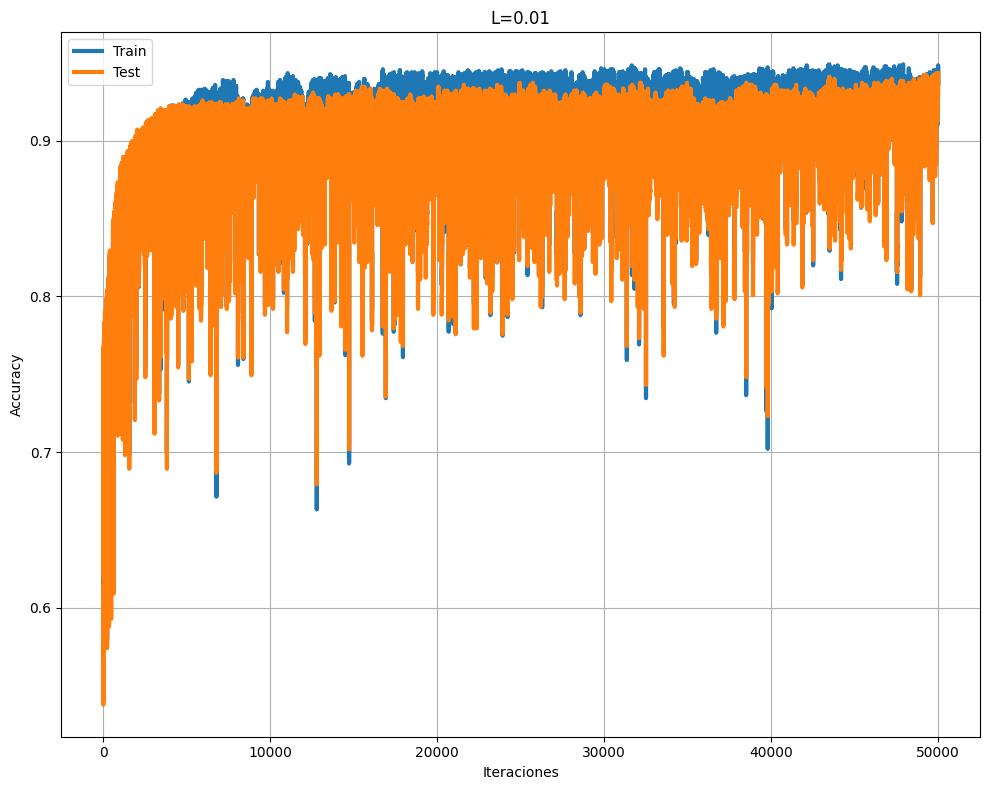

100%|██████████| 100000/100000 [00:40<00:00, 2483.11it/s]


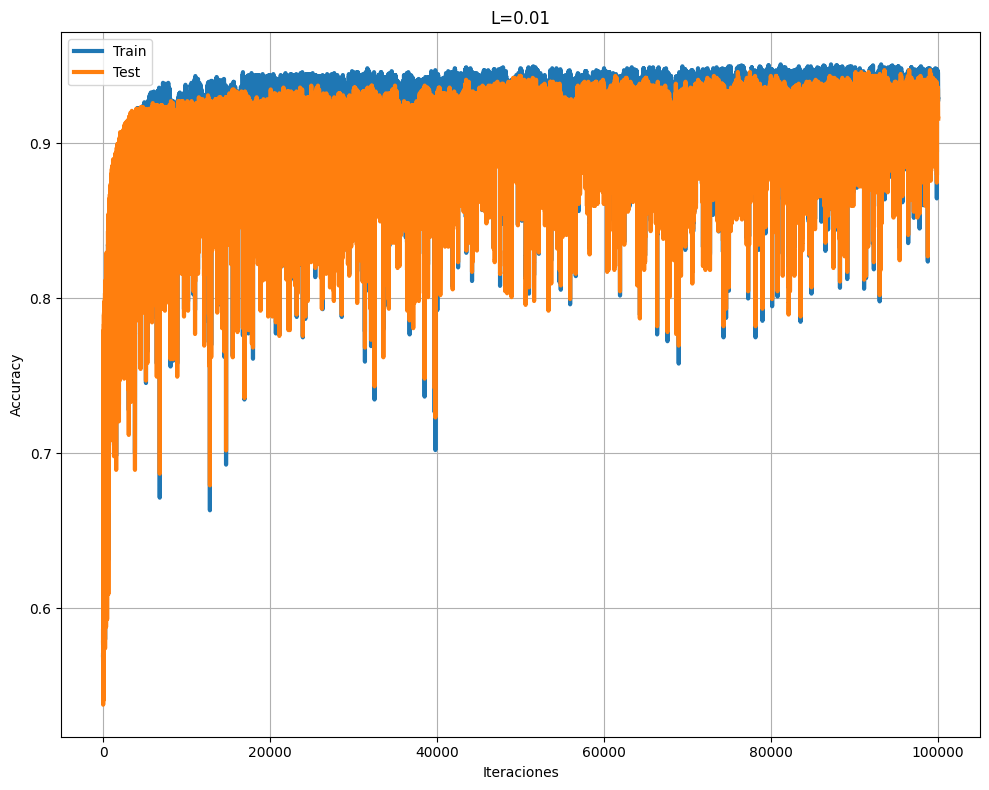

100%|██████████| 1000/1000 [00:00<00:00, 2530.88it/s]


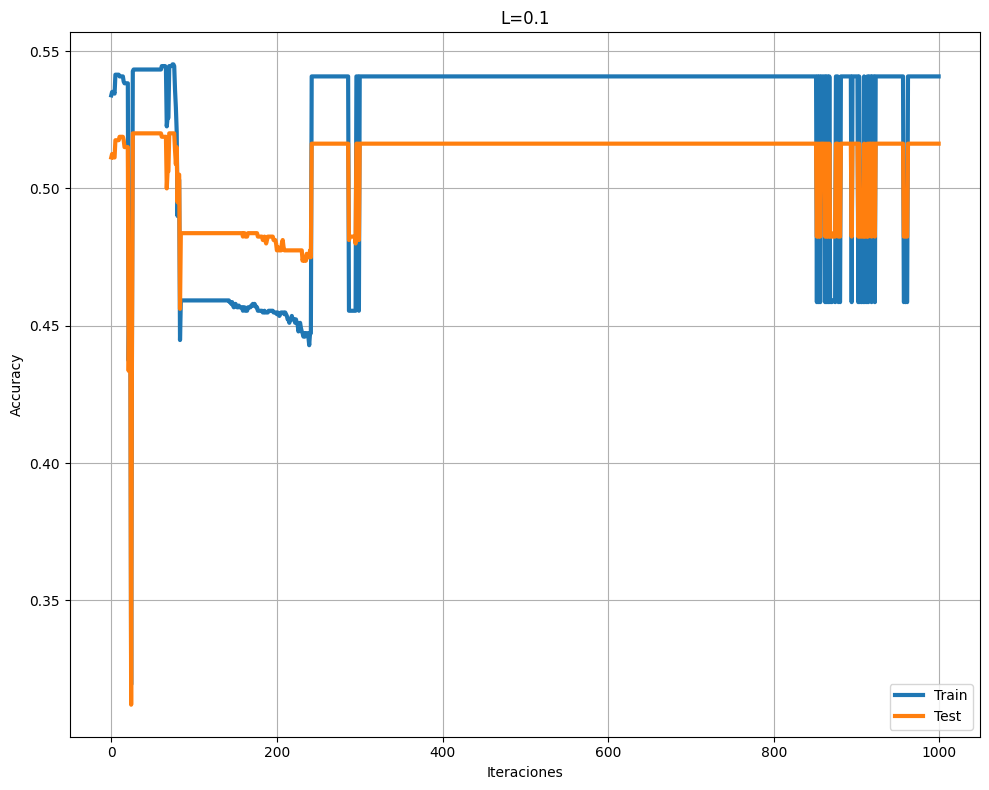

100%|██████████| 3000/3000 [00:01<00:00, 2493.82it/s]


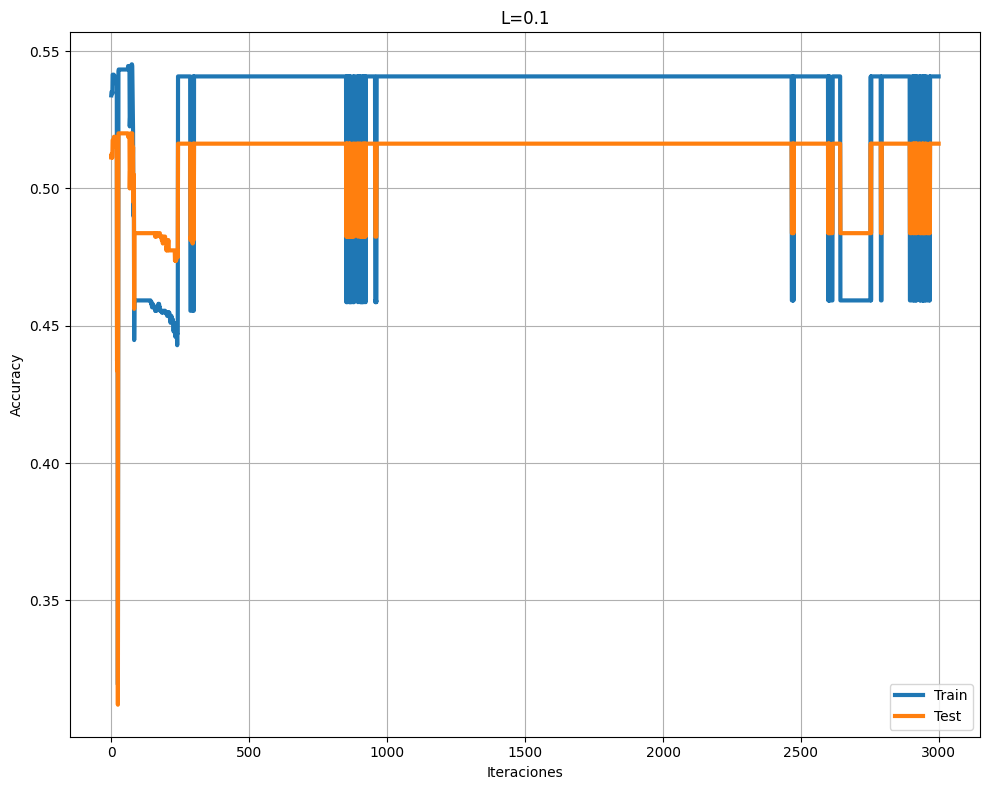

100%|██████████| 5000/5000 [00:02<00:00, 2499.56it/s]


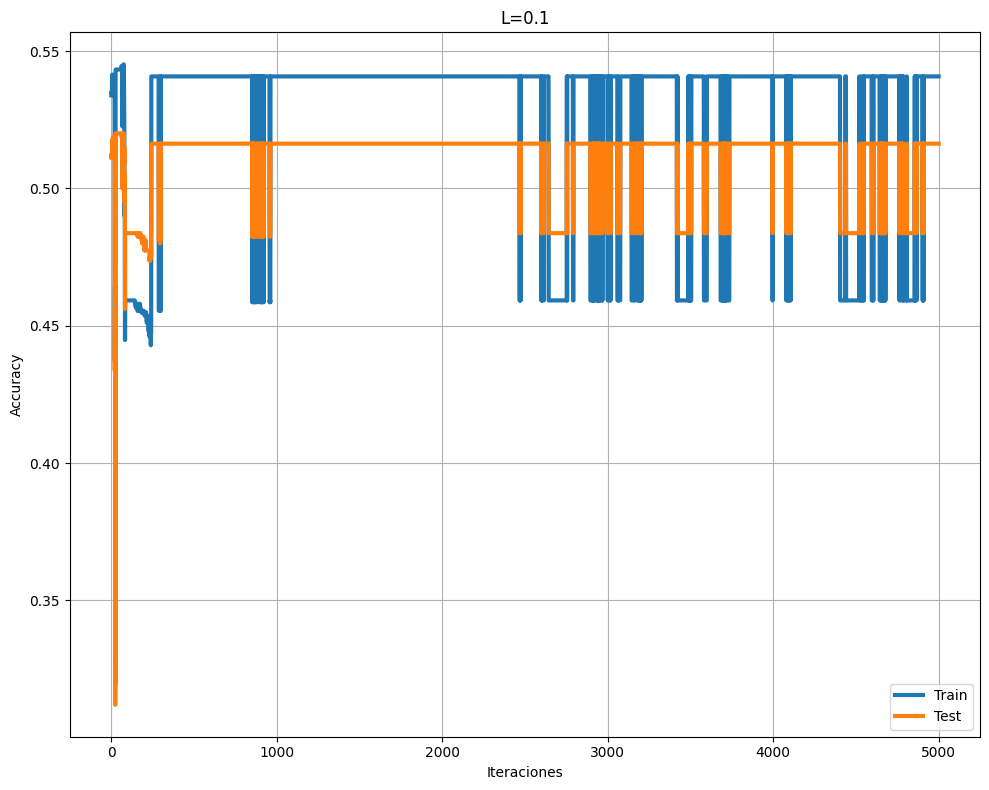

100%|██████████| 10000/10000 [00:03<00:00, 2562.23it/s]


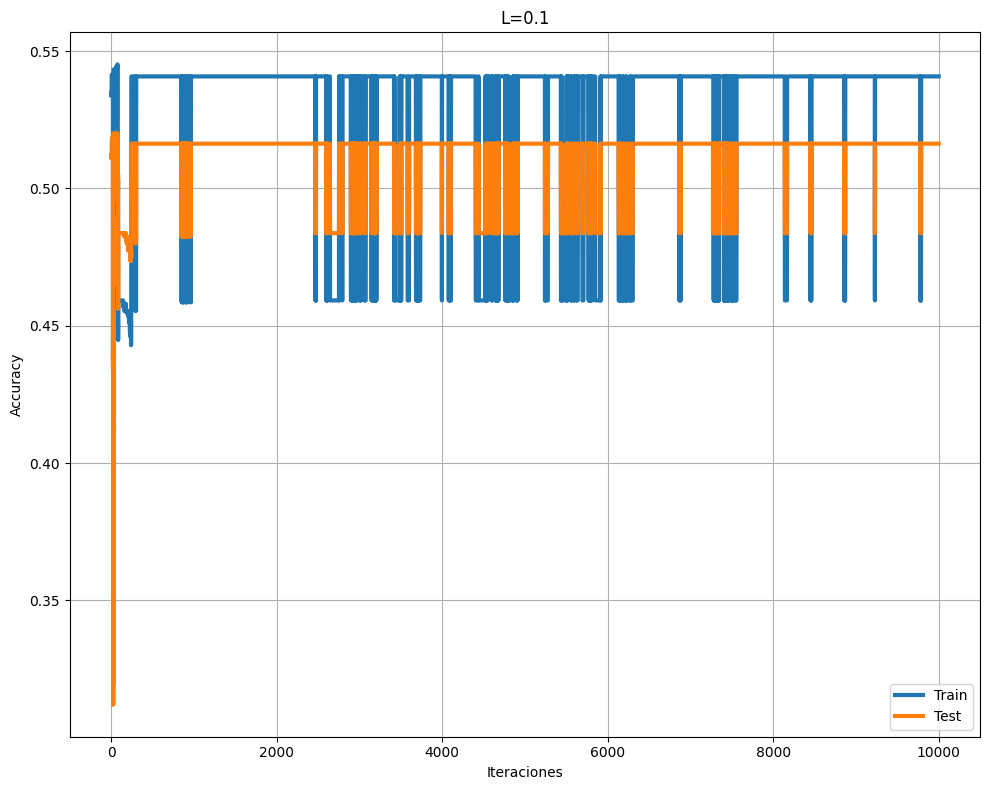

100%|██████████| 20000/20000 [00:07<00:00, 2587.68it/s]


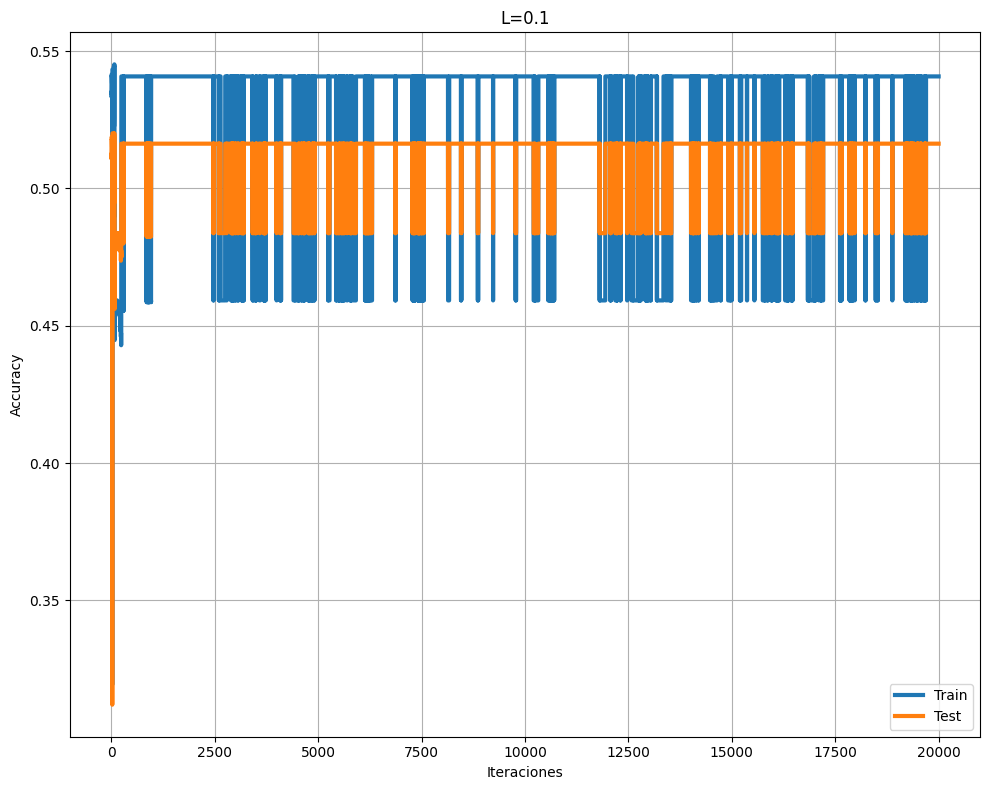

100%|██████████| 30000/30000 [00:11<00:00, 2574.56it/s]


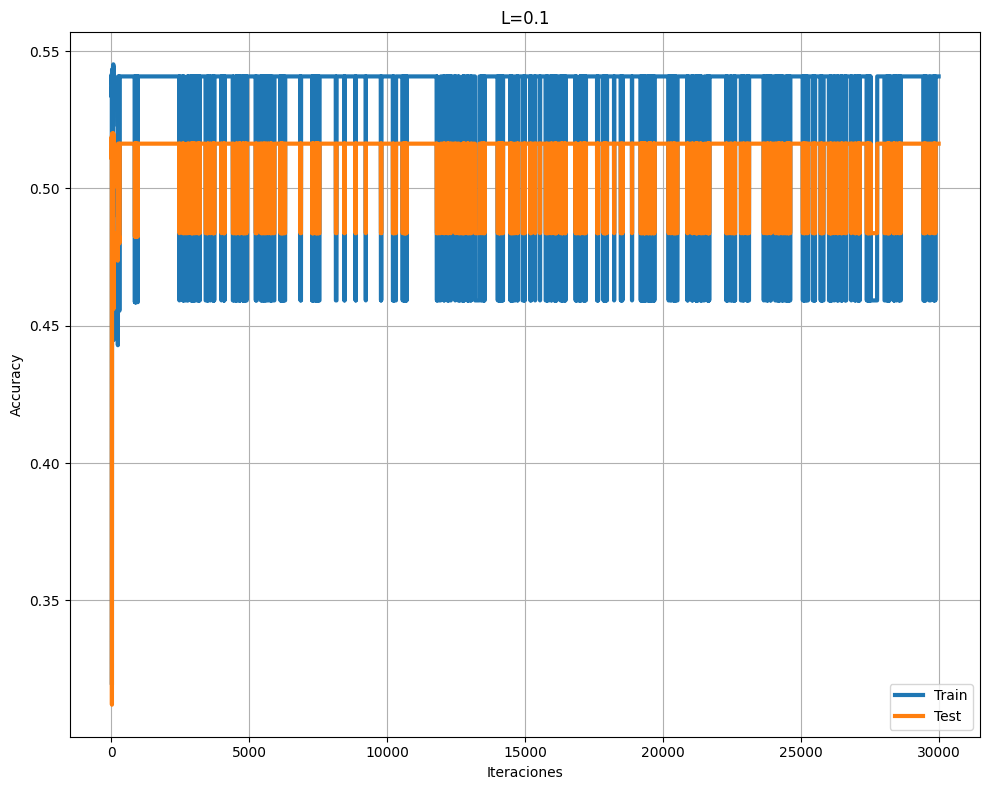

100%|██████████| 50000/50000 [00:19<00:00, 2614.05it/s]


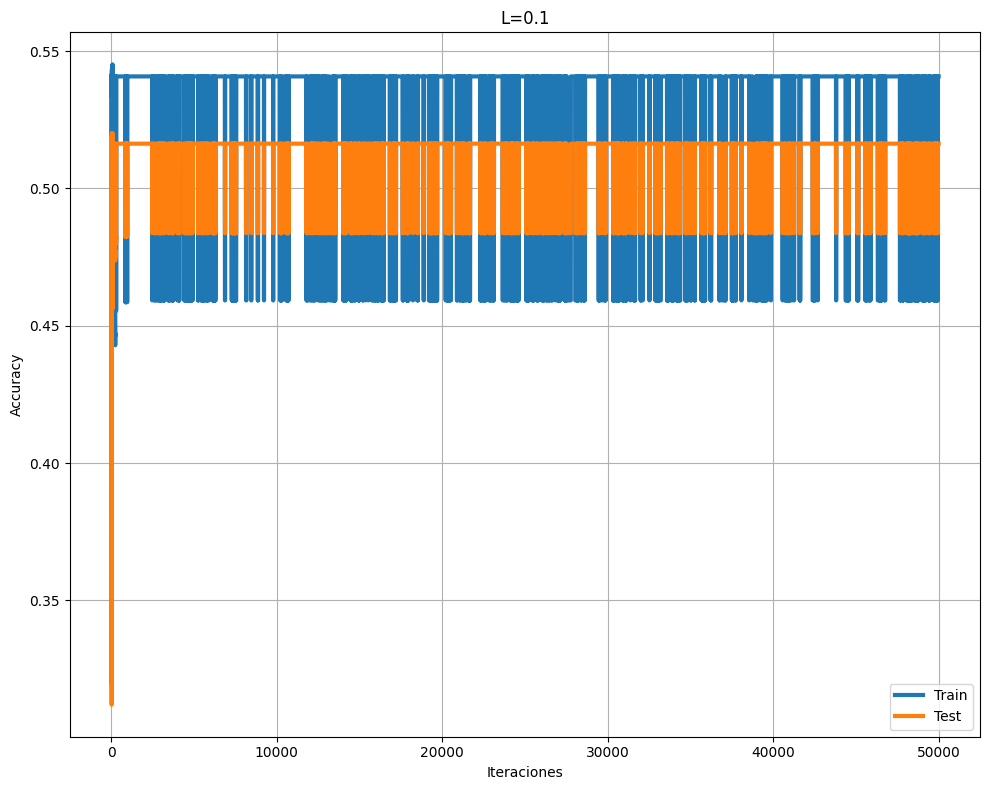

100%|██████████| 100000/100000 [00:38<00:00, 2611.79it/s]


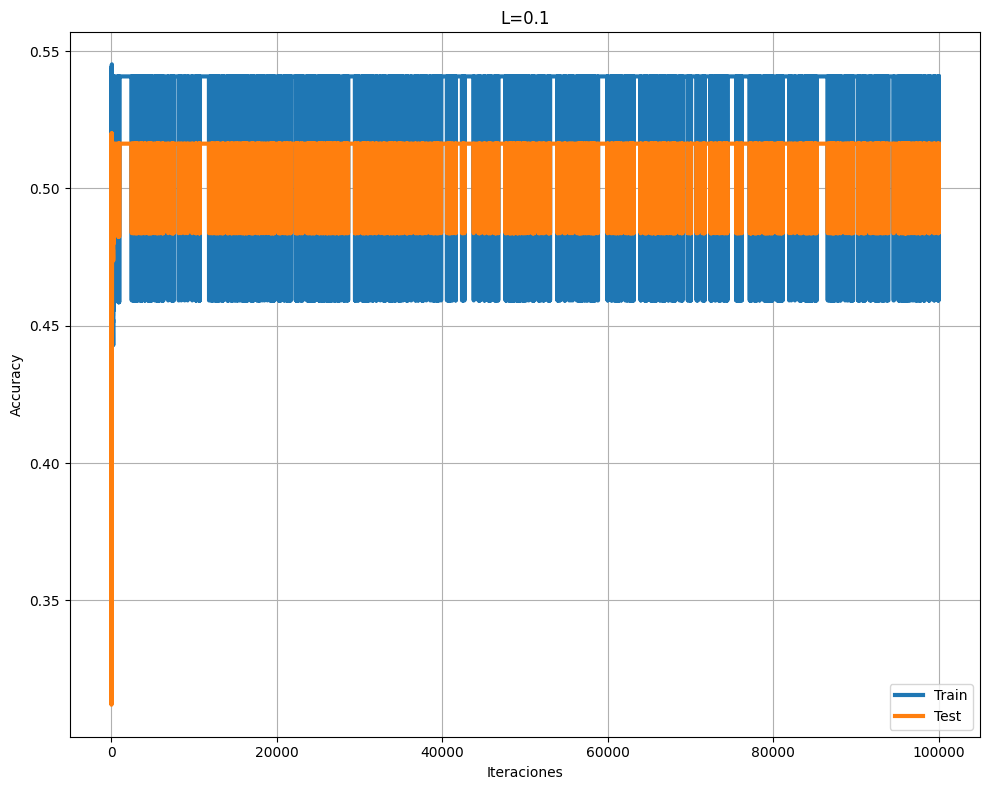

In [ ]:
# Para graficar

import matplotlib.pyplot as plt

# Configurar los gráficos
fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw': 3,
}

fmt_test = {
    'color': 'tab:orange',
    'ls': 'solid',
    'lw': 3,
}

# Graficar accuracy de cada combinación
def graficar_accuracy(L, train, test):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    ax.plot(train, label="Train", **fmt_train)
    ax.plot(test, label="Test", **fmt_test)


    ax.grid(which="both")
    ax.legend()
    ax.set_title(f"{L=}")
    ax.set_xlabel("Iteraciones")
    ax.set_ylabel("Accuracy")

    fig.tight_layout()
    plt.show()


# Además, a la hora de ir entrenando la red tendremos que ir guardando información para realizar los gráficos.
def entrenarProbarGuardar(L, rango):
  global w_hidden, b_hidden, w_output, b_output  
  iniciar_pesos() # Para que no aprenda sobre lo aprendido

  accuracy_TEST_l = []  # Se vacían para graficar cada combinación
  accuracy_TRAIN_l = []

  for i in tqdm(range(rango)):
    # seleccionar aleatoriamente uno de los datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

    # Calculamos de precisión de TEST
    predictions = forward_prop(X_test.transpose())[3] # Capa de salida A2
    test_comparisons = np.equal((predictions > 0.5).flatten().round(), Y_test) # Cambiará en algo el =>
    accuracy_TEST = sum(test_comparisons.astype(int) / X_test.shape[0])
    accuracy_TEST_l.append(accuracy_TEST)

    # Calculamos presición de TRAIN
    predictions = forward_prop(X_train.transpose())[3] # Capa de salida A2
    train_comparisons = np.equal((predictions > 0.5).flatten().round(), Y_train)
    accuracy_TRAIN = sum(train_comparisons.astype(int) / X_train.shape[0])
    accuracy_TRAIN_l.append(accuracy_TRAIN)
    
  # Se grafica y compara la precisión de TEST y TRAIN
  graficar_accuracy(L,  accuracy_TRAIN_l, accuracy_TEST_l)
  
# Lista de L a probar
l_probados = [0.0005, 0.005, 0.0001, 0.001, 0.05, 0.01, 0.1]
# Lista de ranges a probar
range_probados = [1_000, 3_000, 5_000, 10_000, 20_000, 30_000, 50_000, 100_000]

# # Probar cada combinación de L e iteraciones
# for L in l_probados:
#     for rango in range_probados:            ///Comentado por practicidad
#          entrenarProbarGuardar(L, rango)

## Uso de Scikit-Learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # Ojos que no ven, corazón que no siente

# Cargar y preparar datos
dataframe_ = pd.read_csv("students.csv")
dataframe_.drop(columns=["StudentID", "Age", "Gender", "Volunteering", "GradeClass"], inplace=True)
df = dataframe_
np.random.seed(0)
df['GoodStudent'] = (df.iloc[:, -1] >= 2).astype(int)
X = df.values[:, :-1]
Y = df['GoodStudent'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

def graficar_red_scikit(L, rango):
    
    # Crear el modelo de red neuronal con warm_start
    red_neuronal = MLPClassifier(
        solver='sgd', hidden_layer_sizes=(9,), activation='relu',
        max_iter=1, learning_rate_init=L, warm_start=True, random_state=0)

    # Listas para almacenar las precisiones en cada iteración
    train_accuracy = []
    test_accuracy = []

    # Entrenamiento iterativo para registrar precisión en cada ciclo
    for i in range(rango):
        red_neuronal.fit(X_train, Y_train)
        train_accuracy.append(red_neuronal.score(X_train, Y_train))
        test_accuracy.append(red_neuronal.score(X_test, Y_test))

    # Graficar precisión por iteración
    plt.figure(figsize=(10, 8))
    plt.plot(train_accuracy, label="Train", **fmt_train)
    plt.plot(test_accuracy, label="Test", **fmt_test)
    plt.xlabel("Iteraciones")
    plt.ylabel("Precisión")
    plt.title(f"{L=}")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

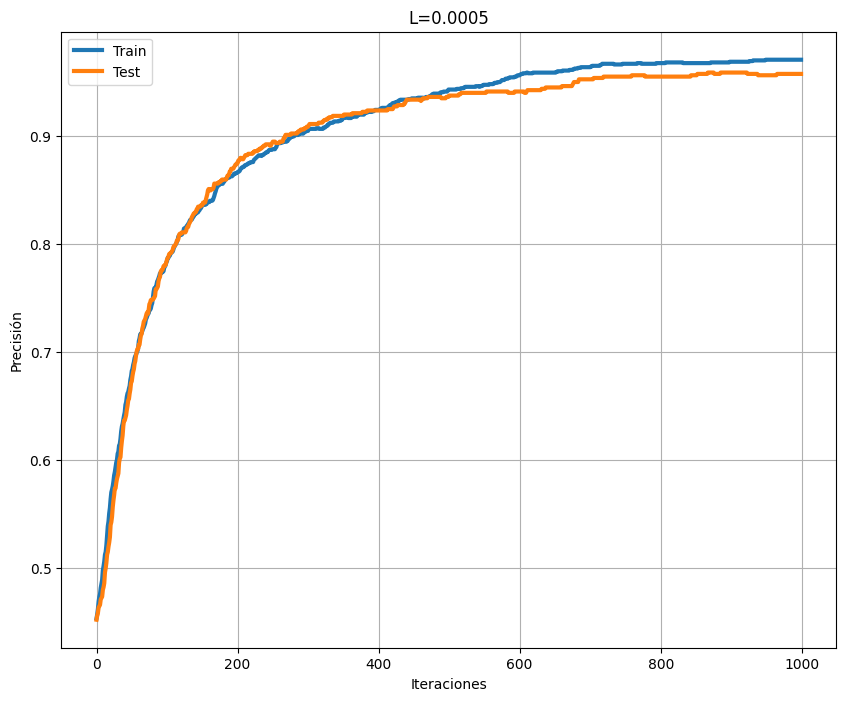

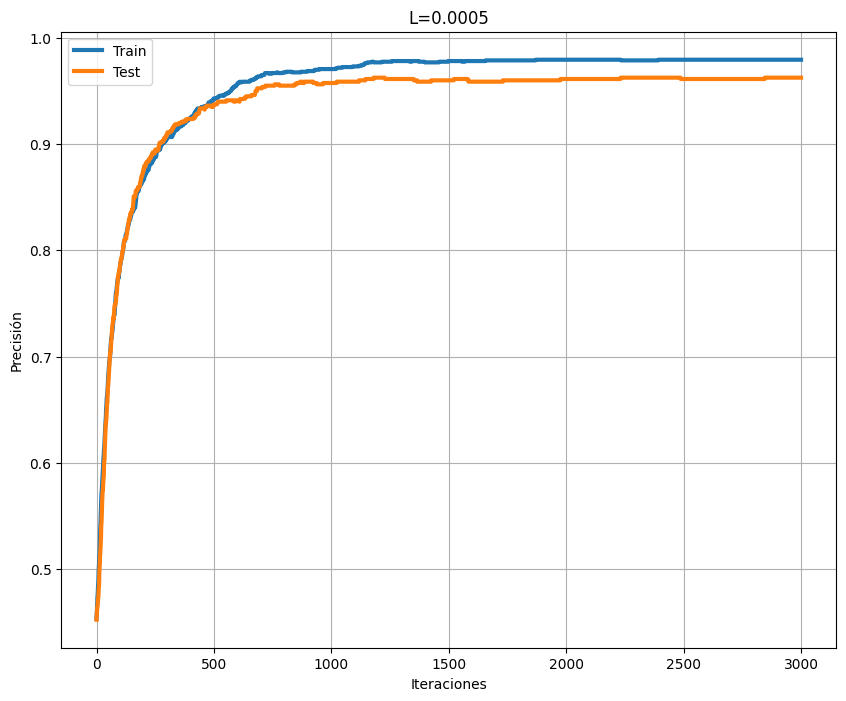

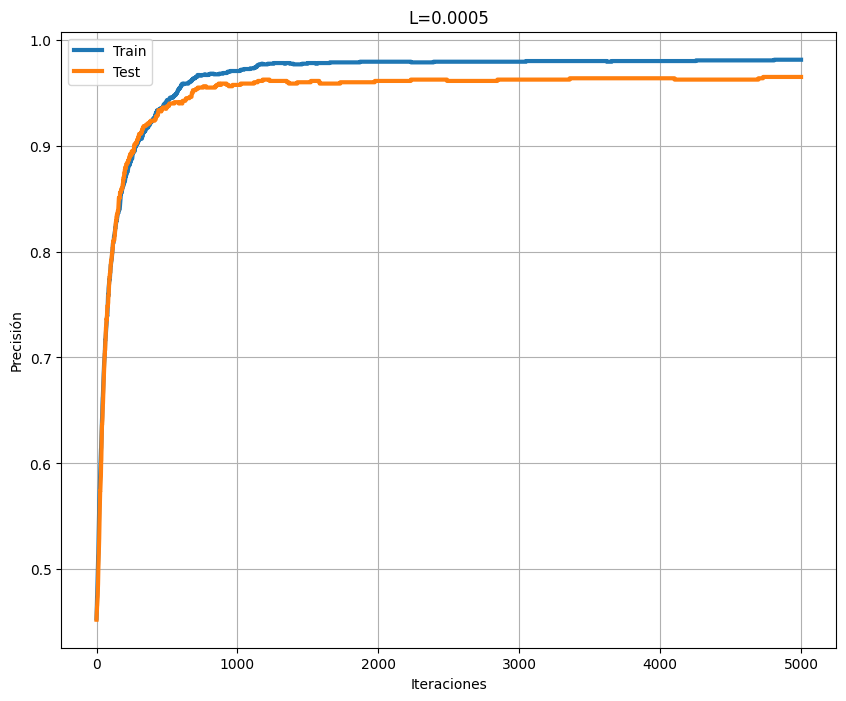

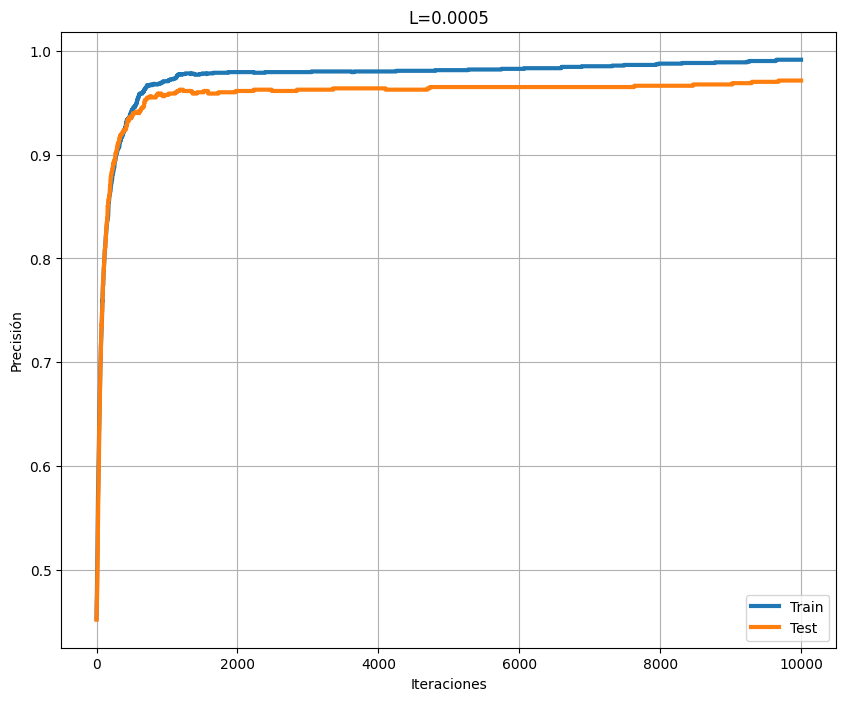

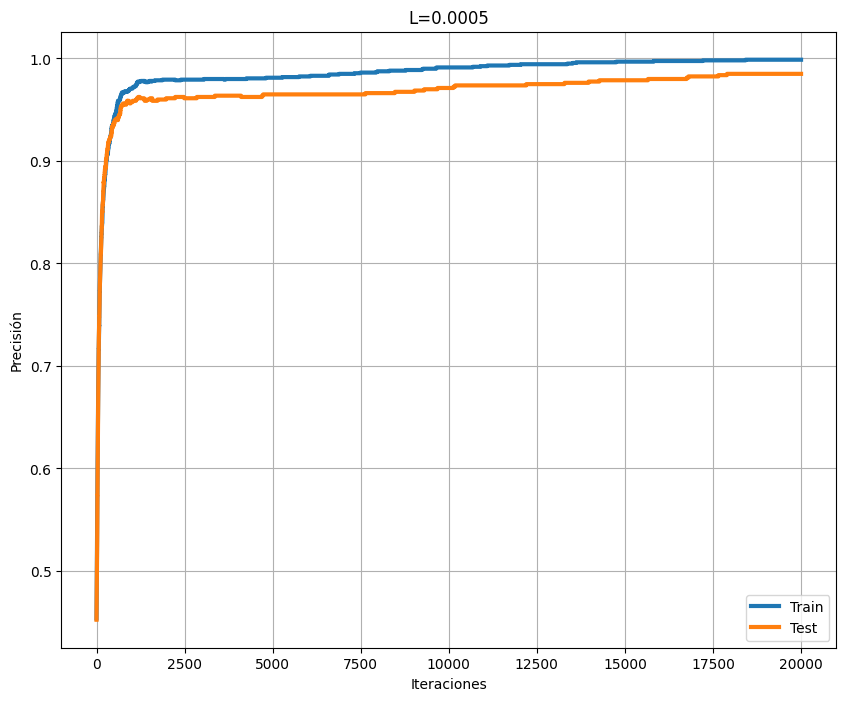

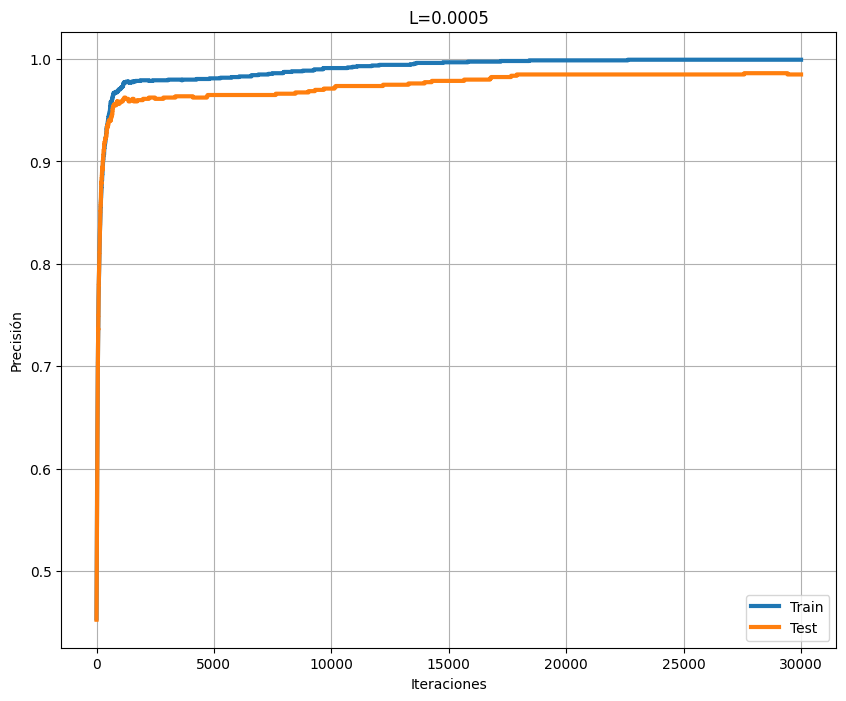

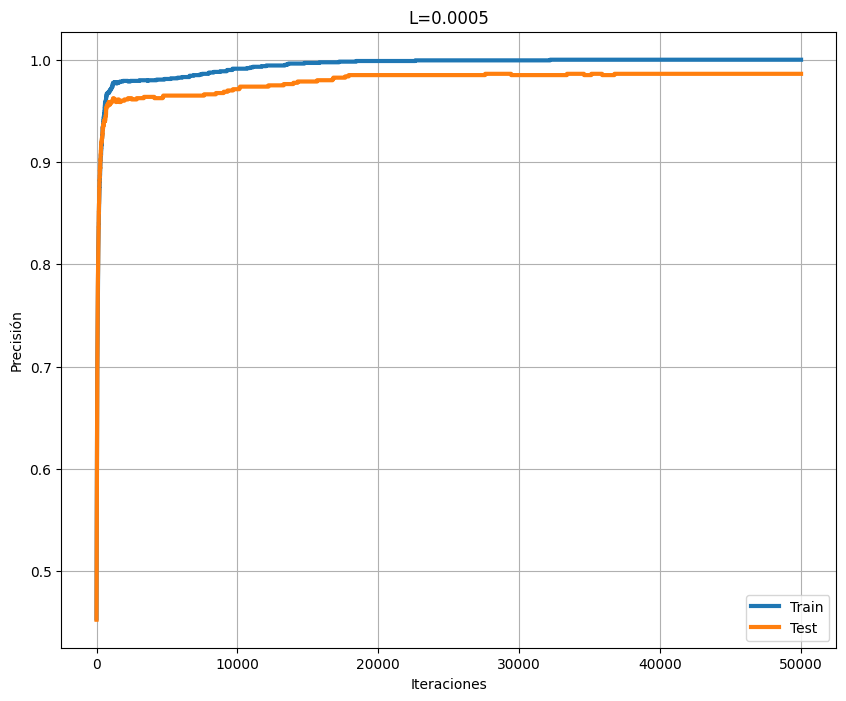

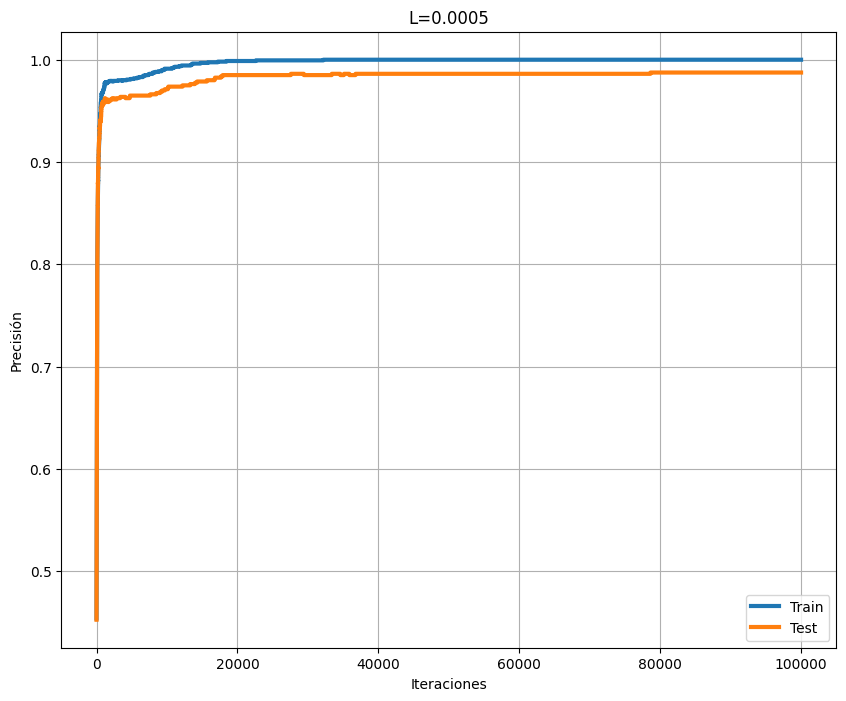

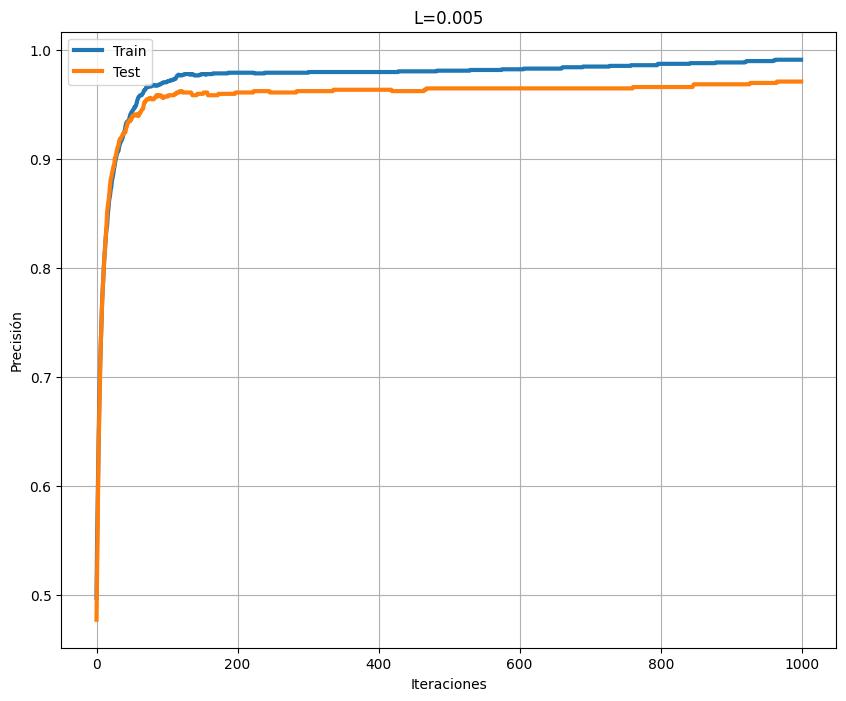

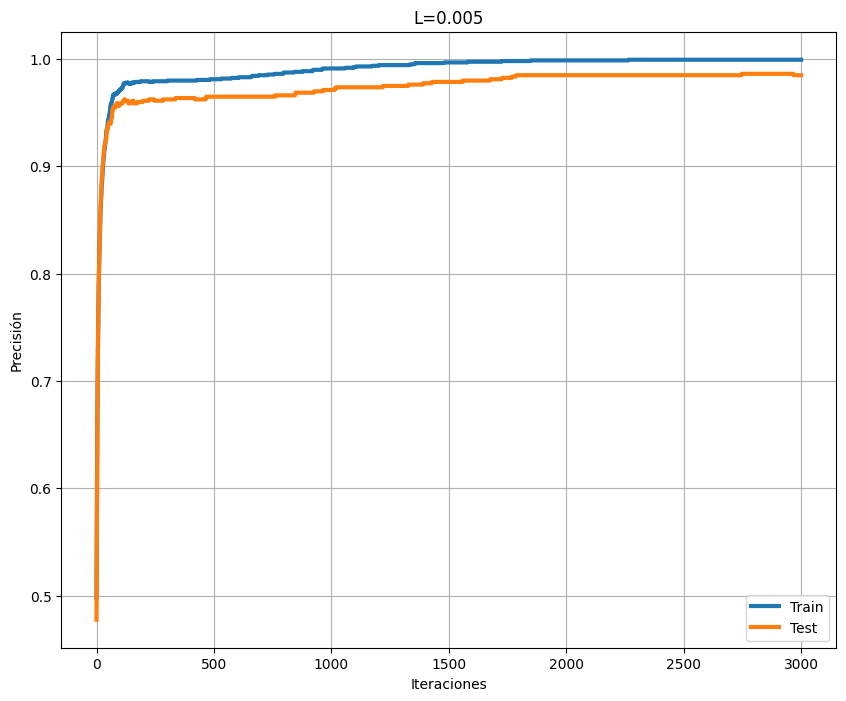

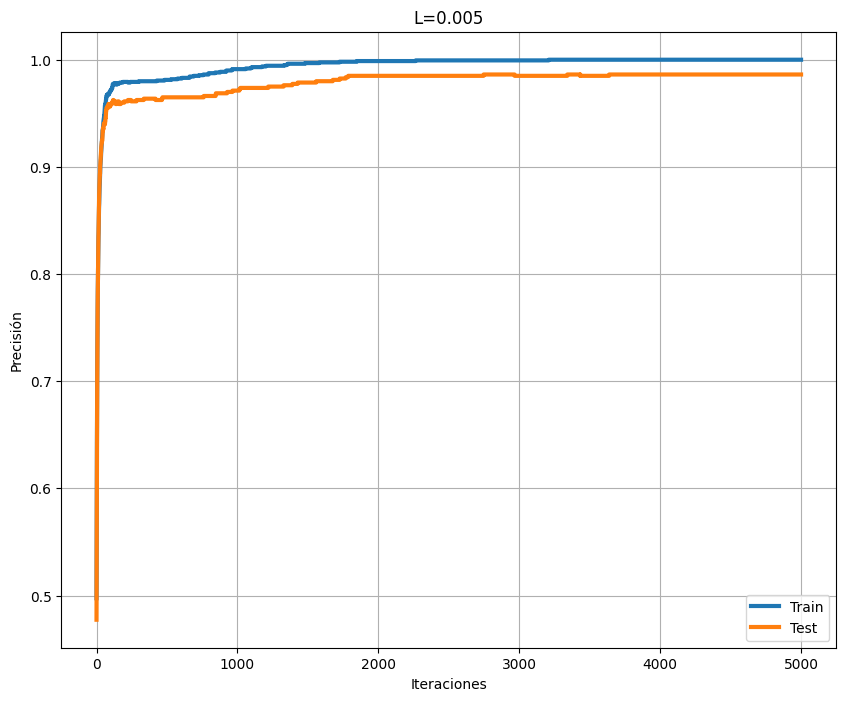

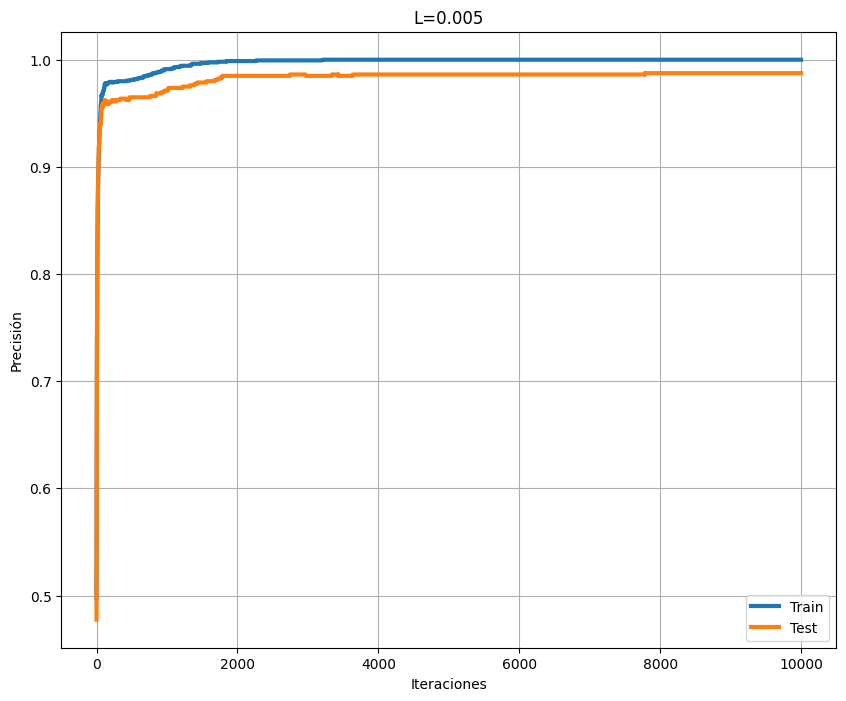

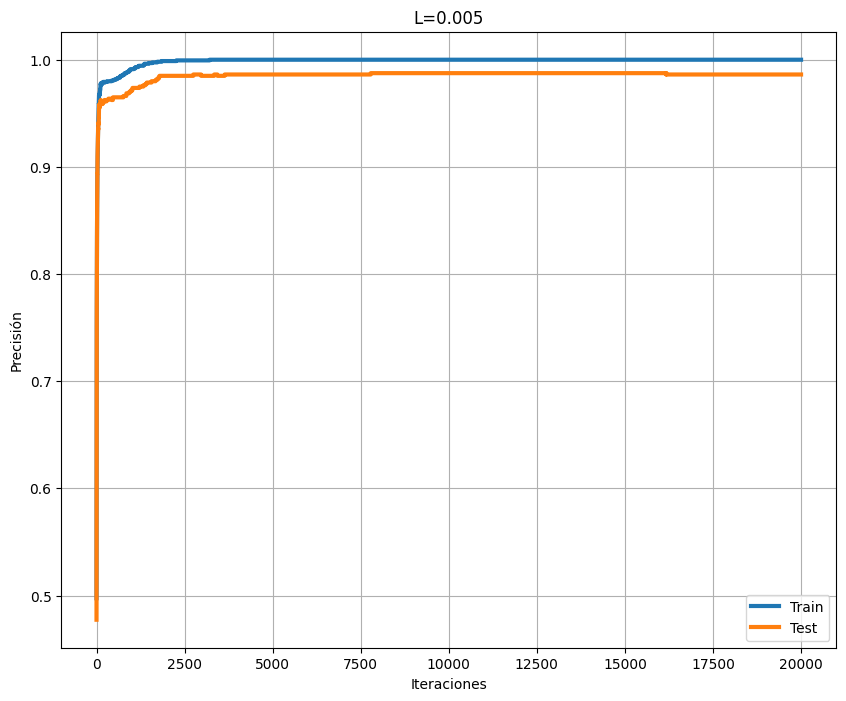

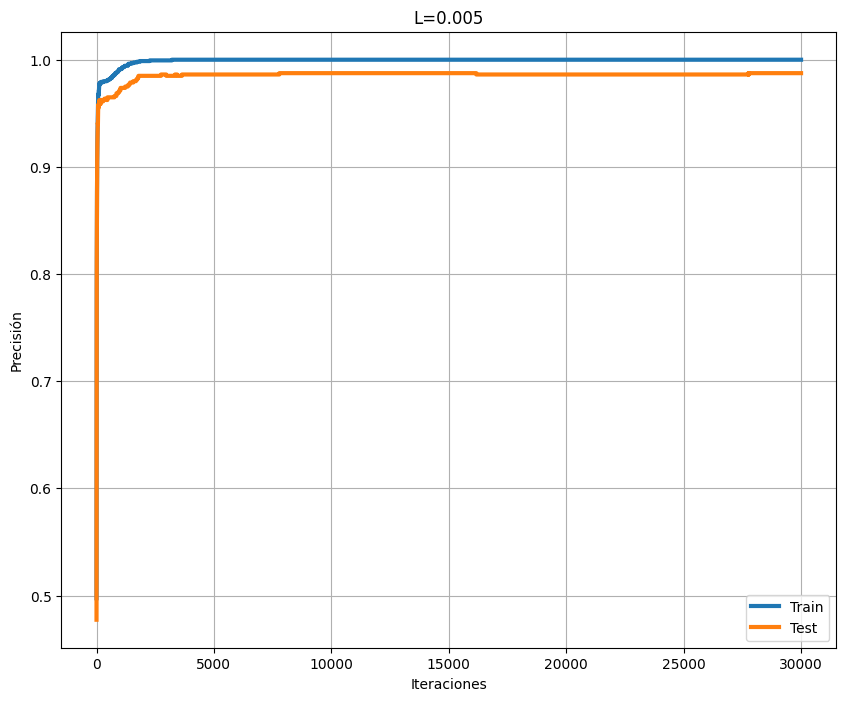

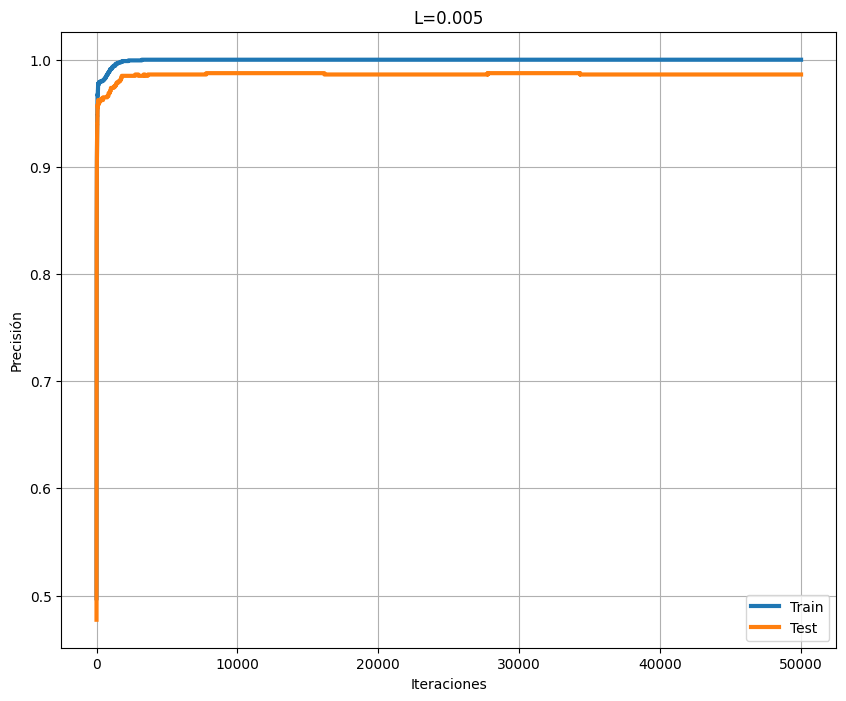

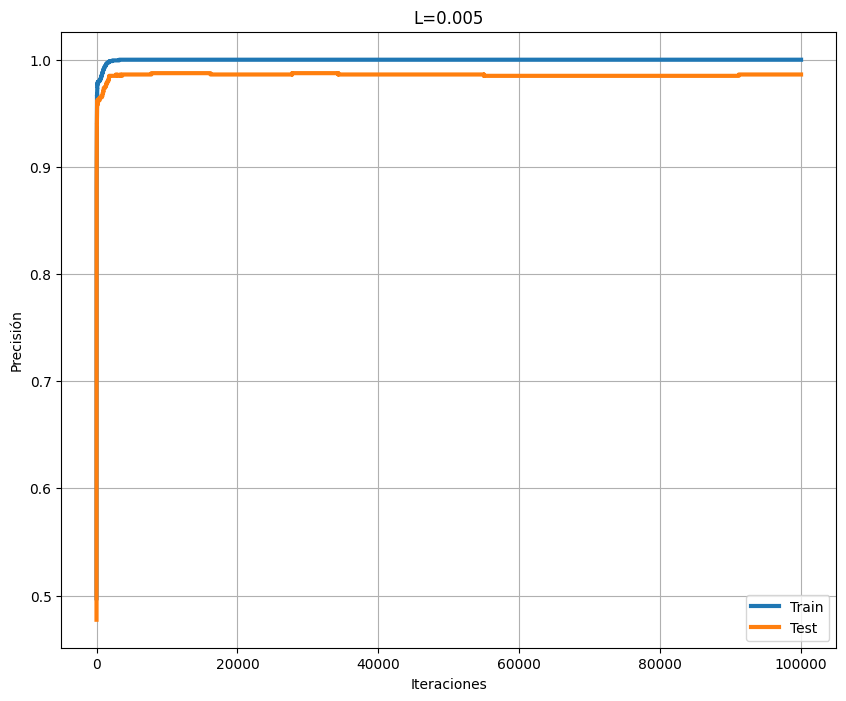

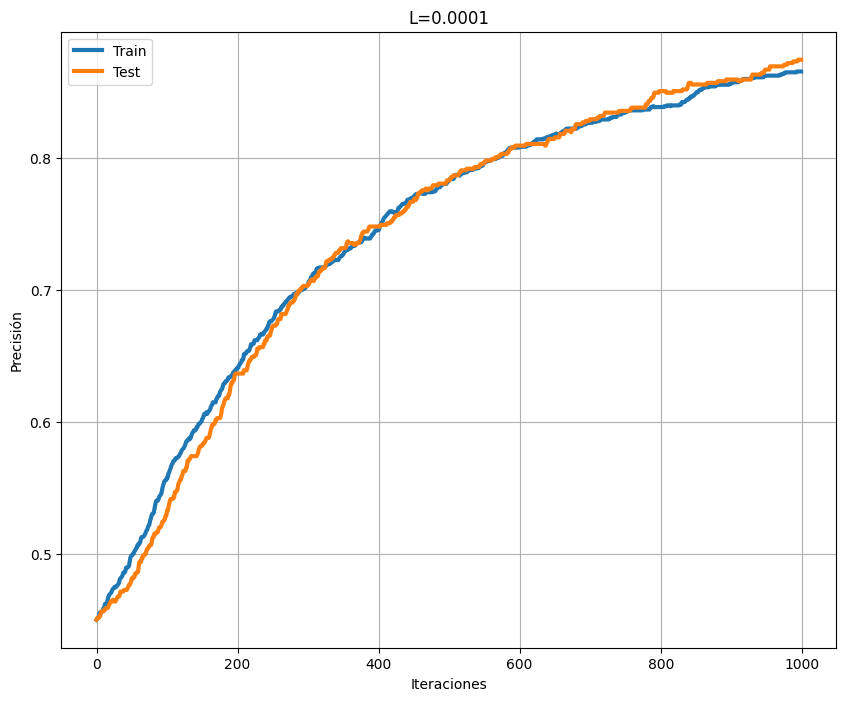

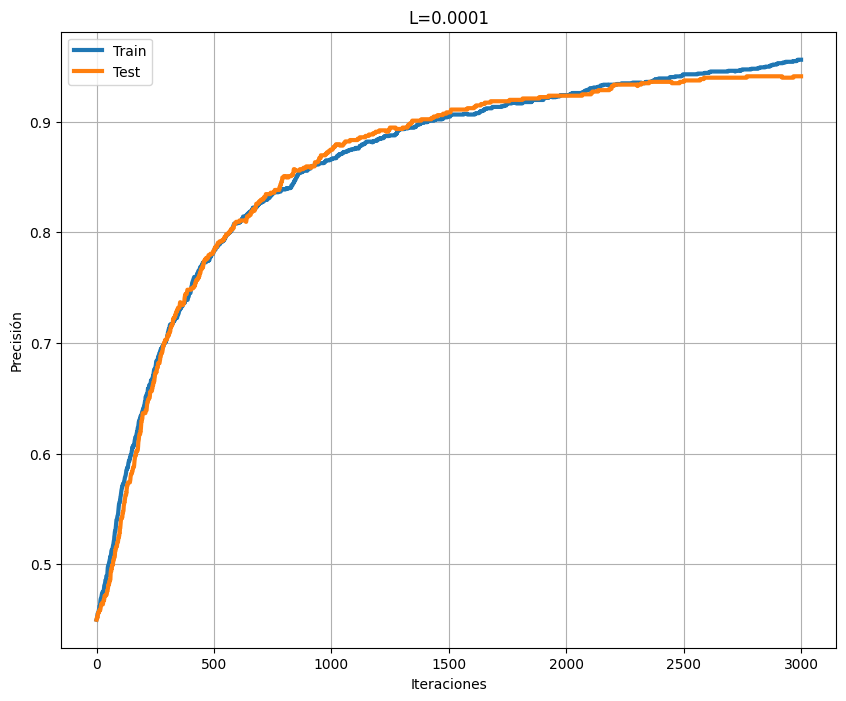

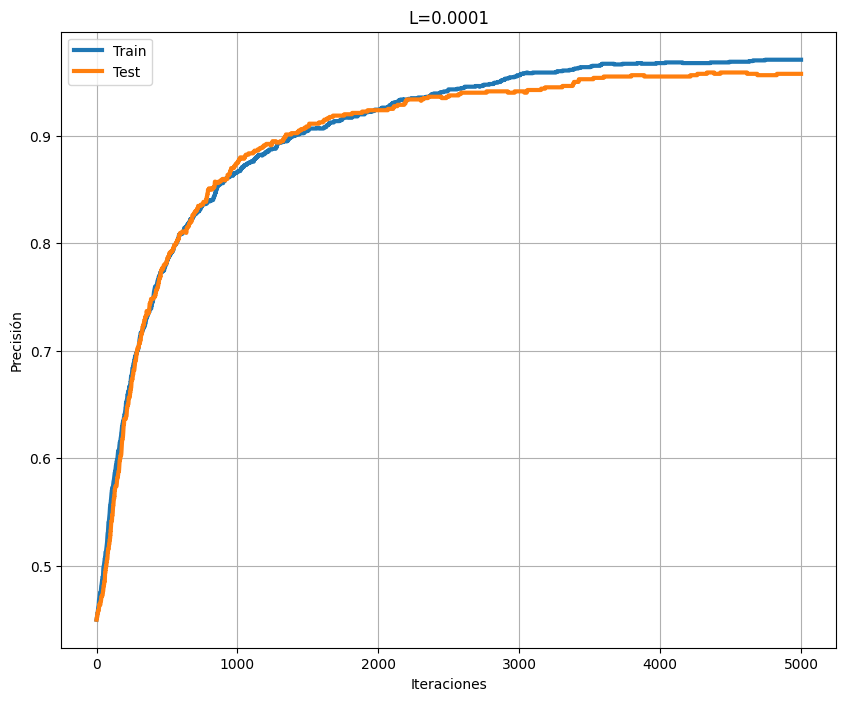

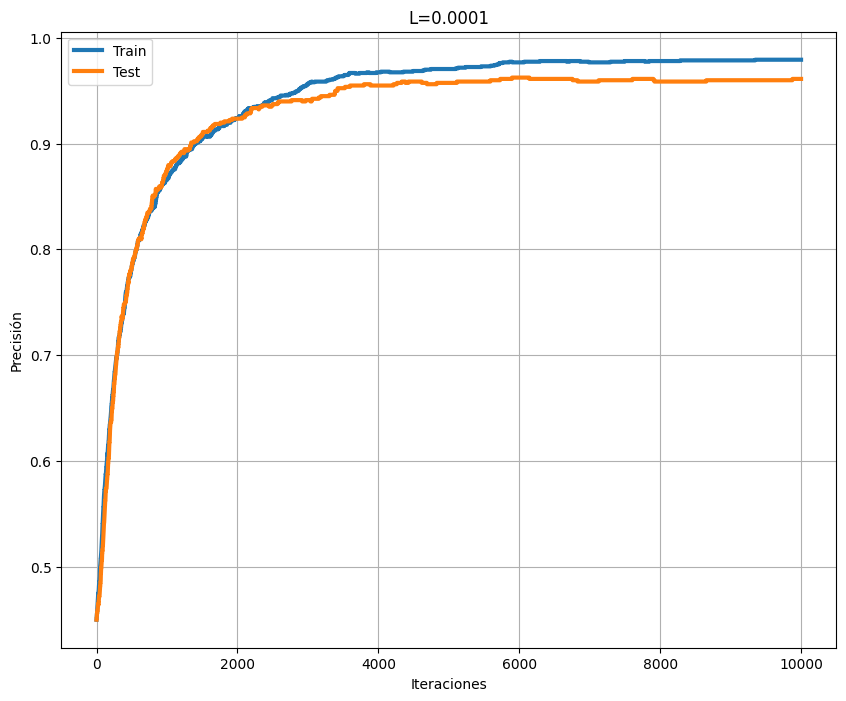

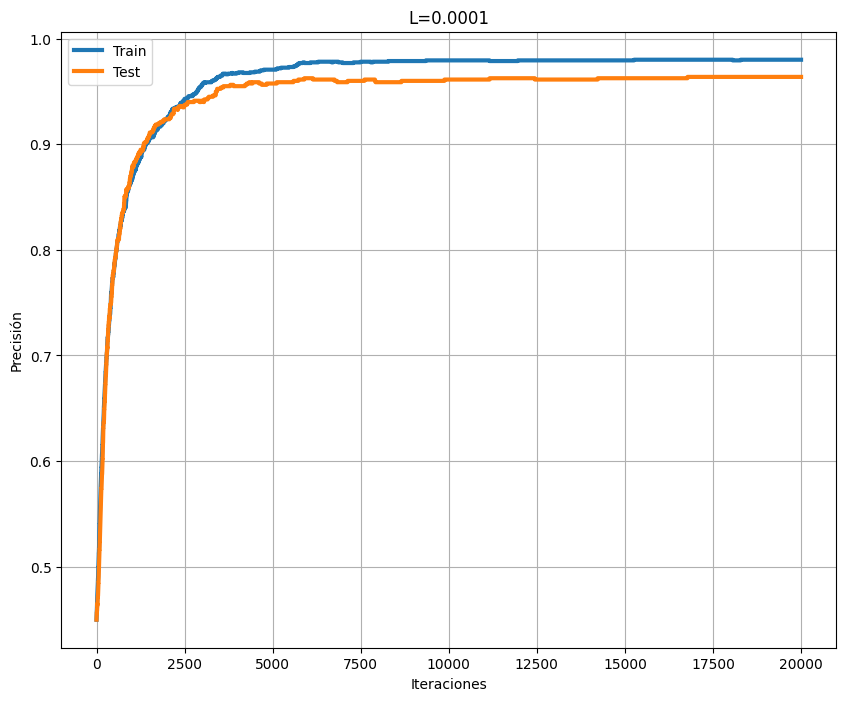

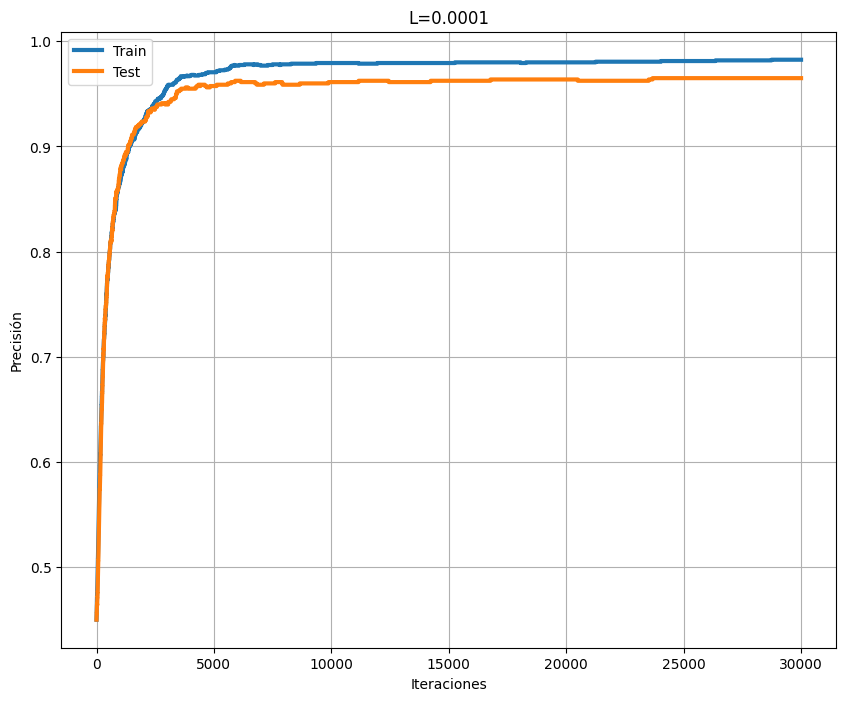

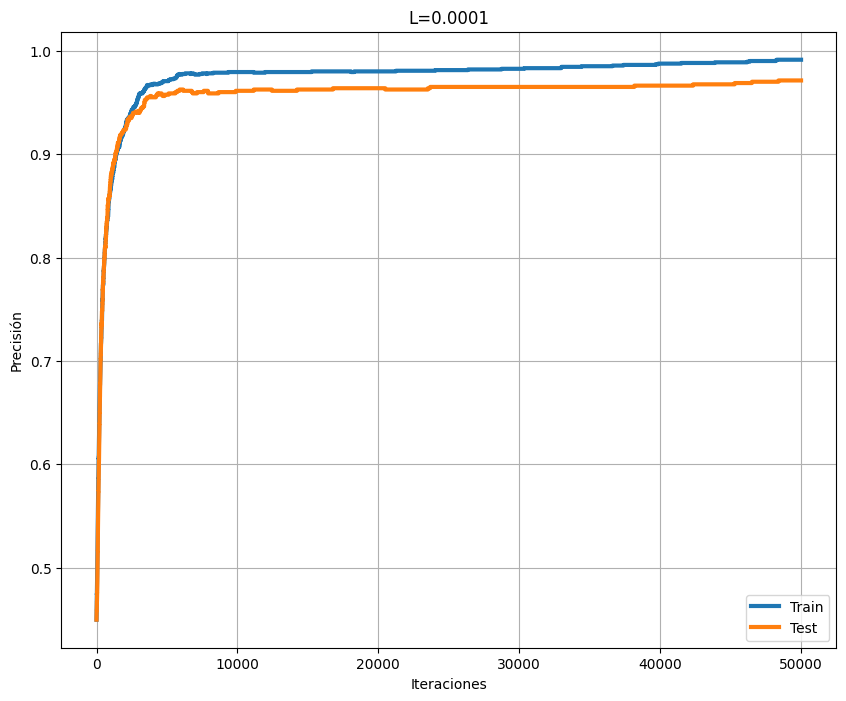

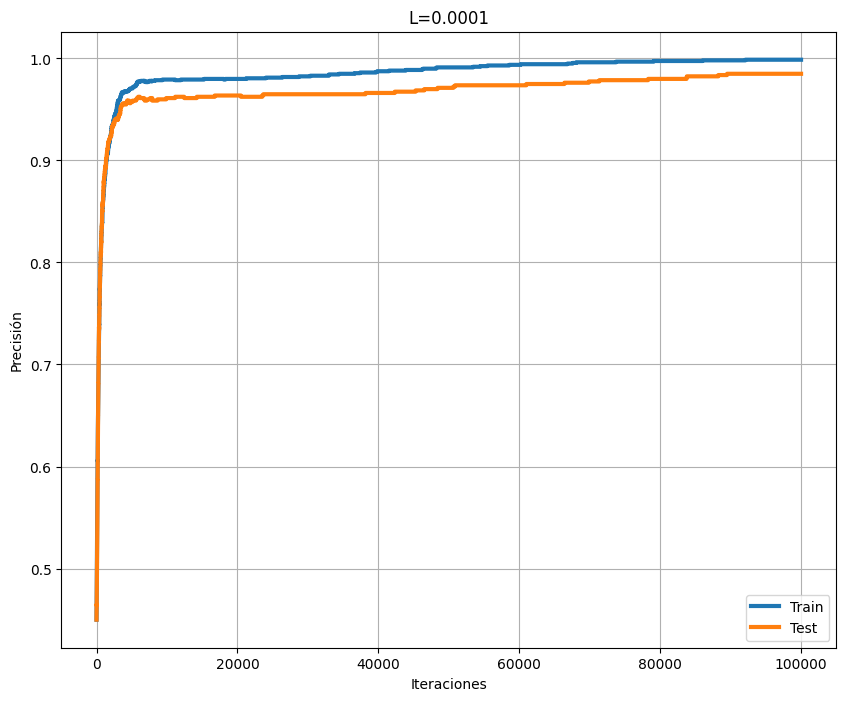

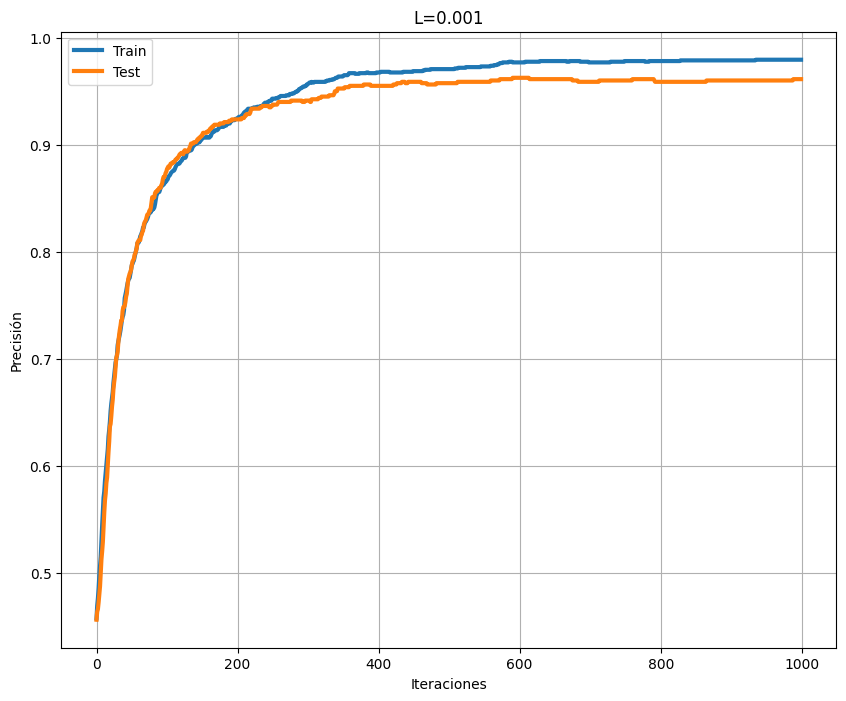

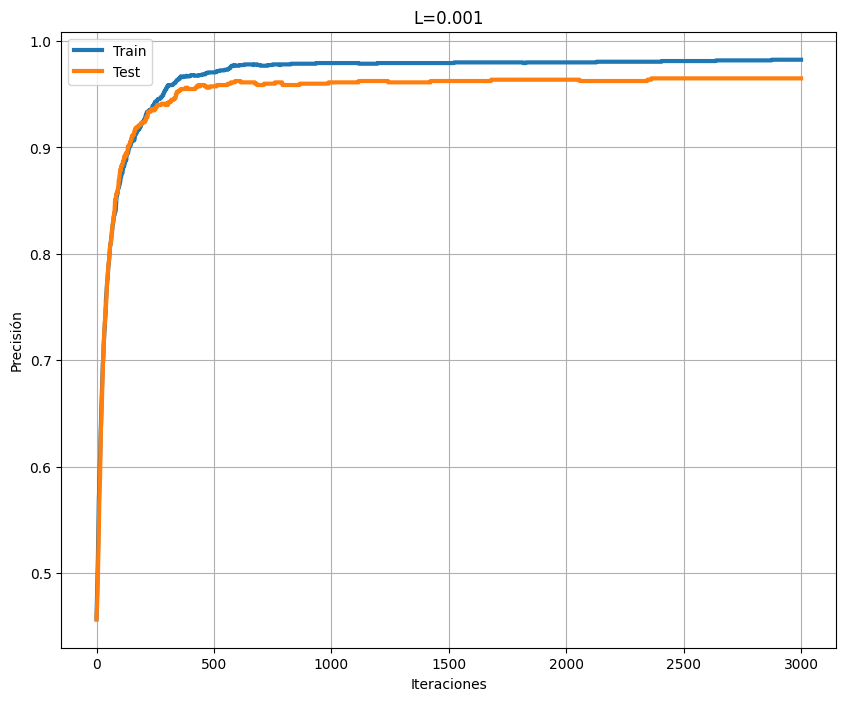

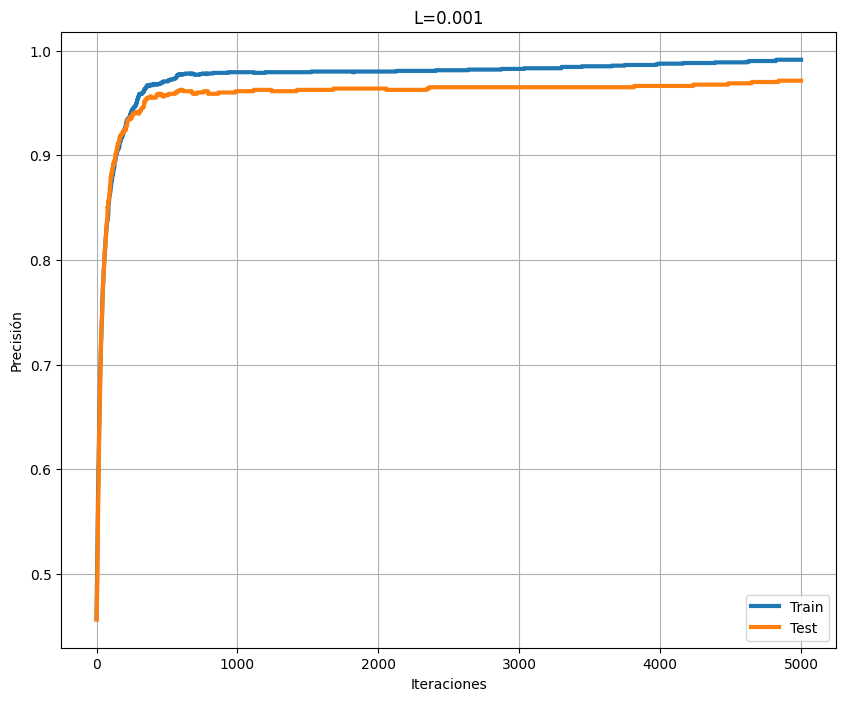

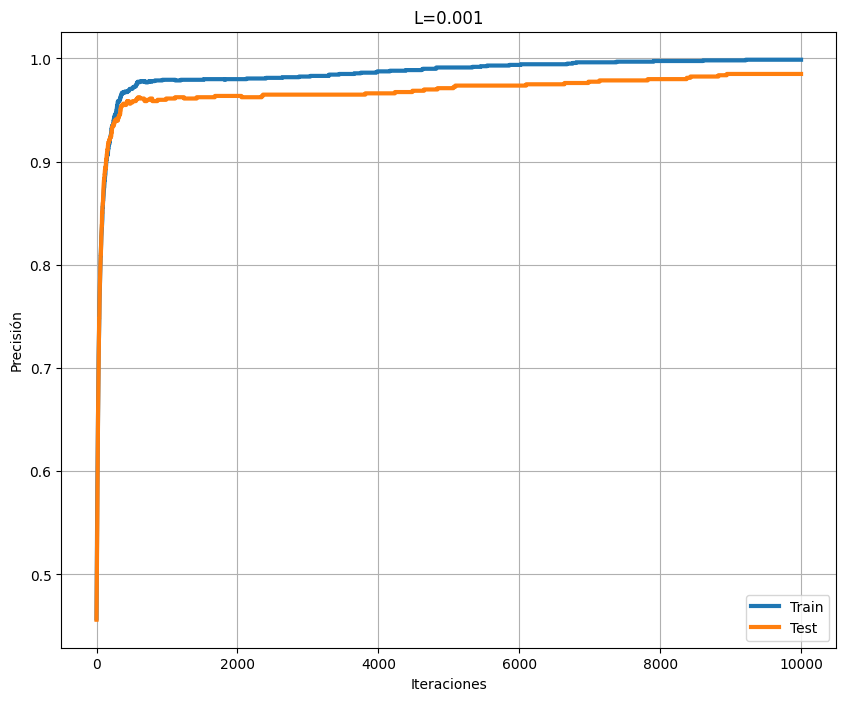

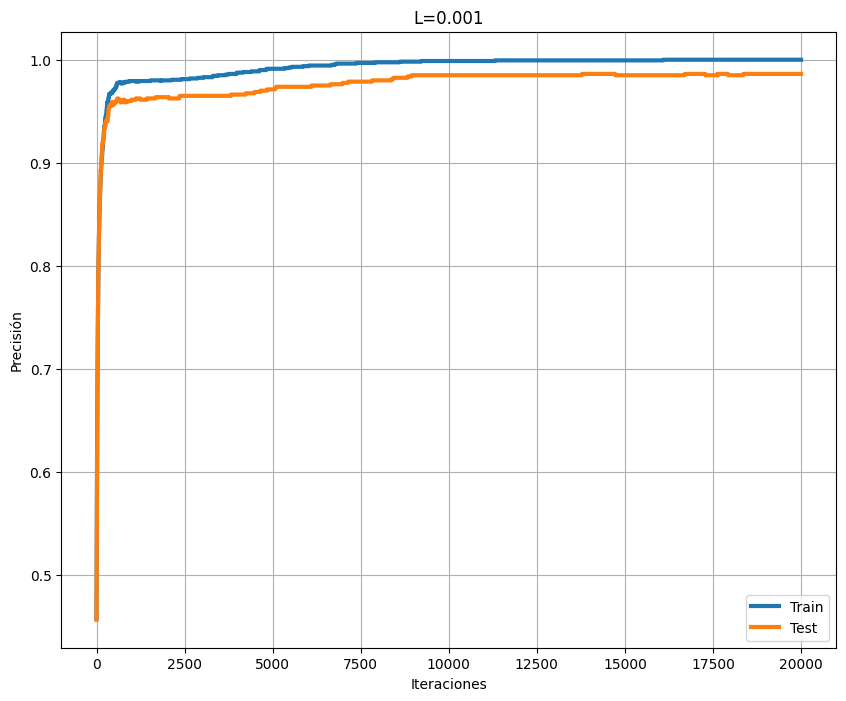

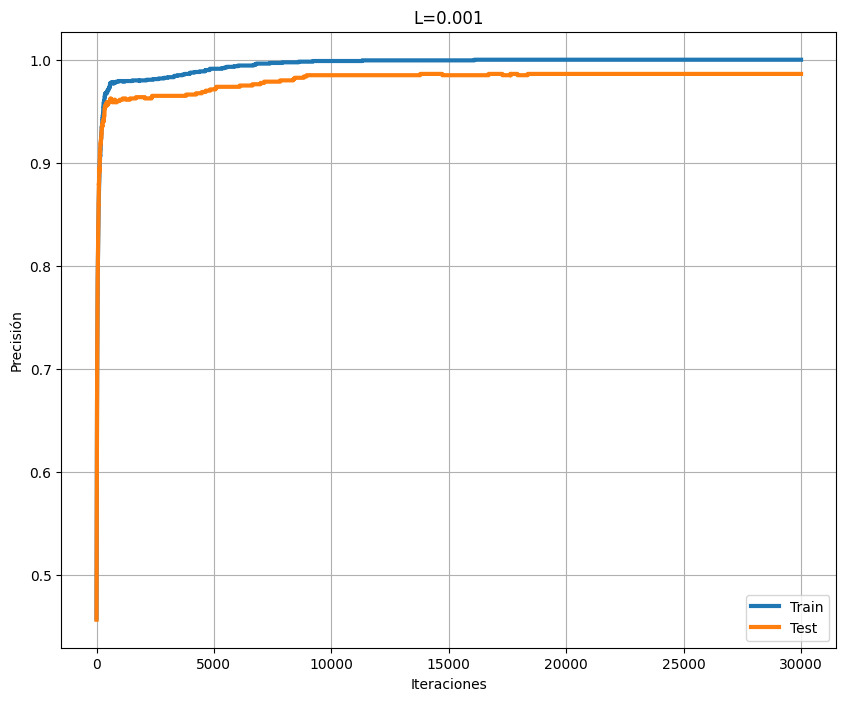

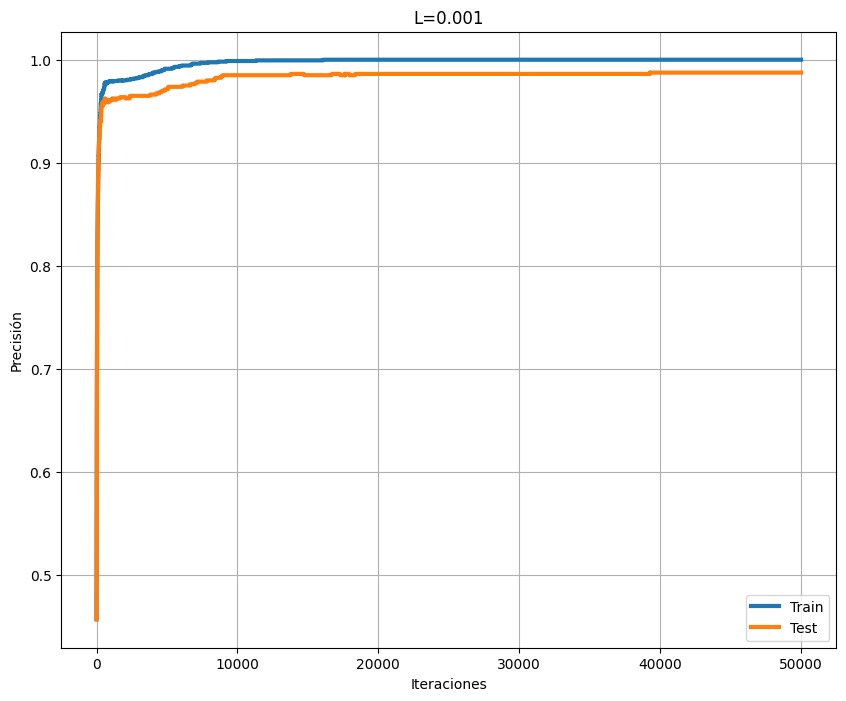

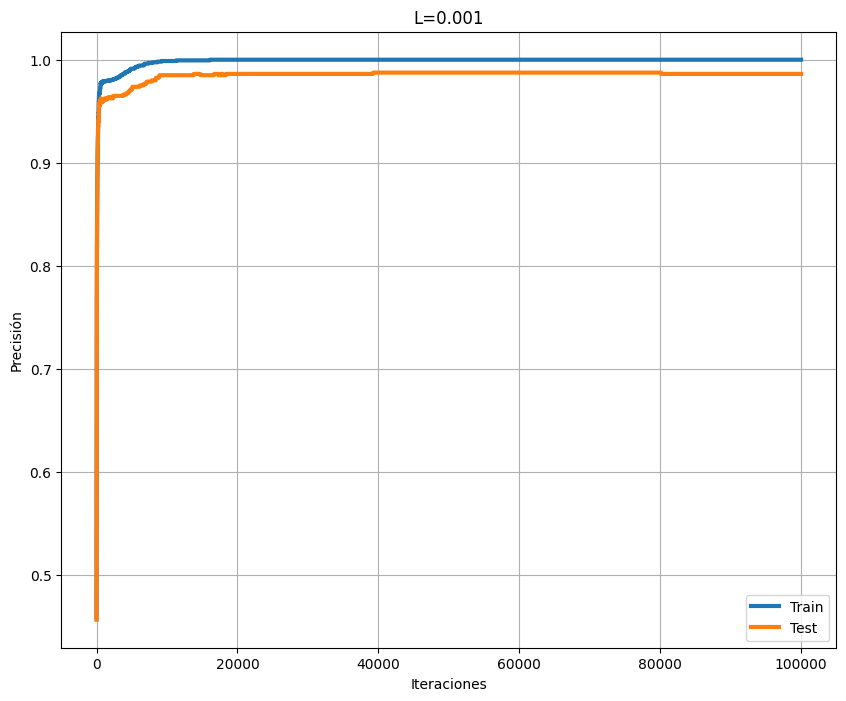

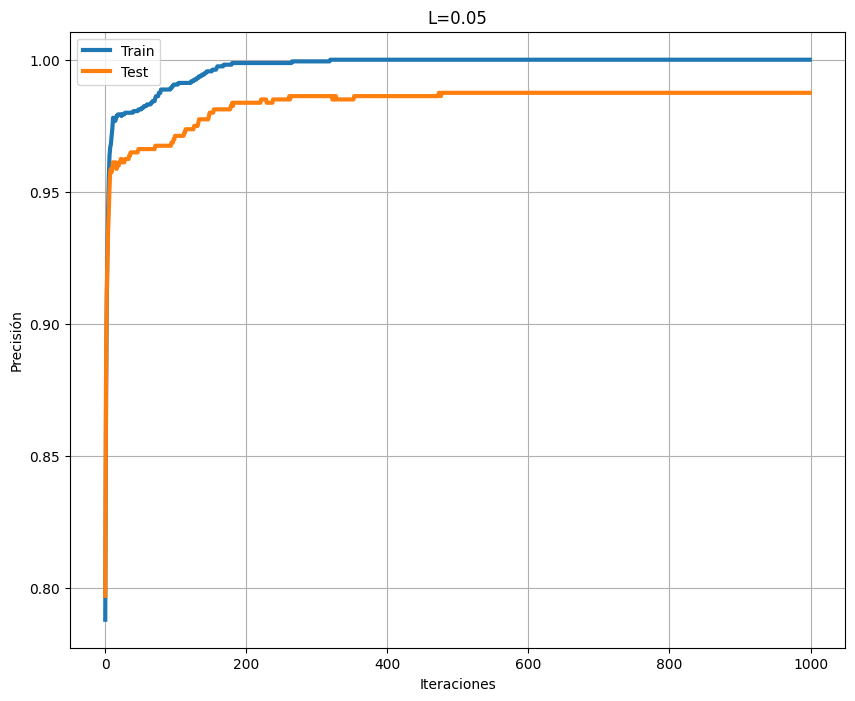

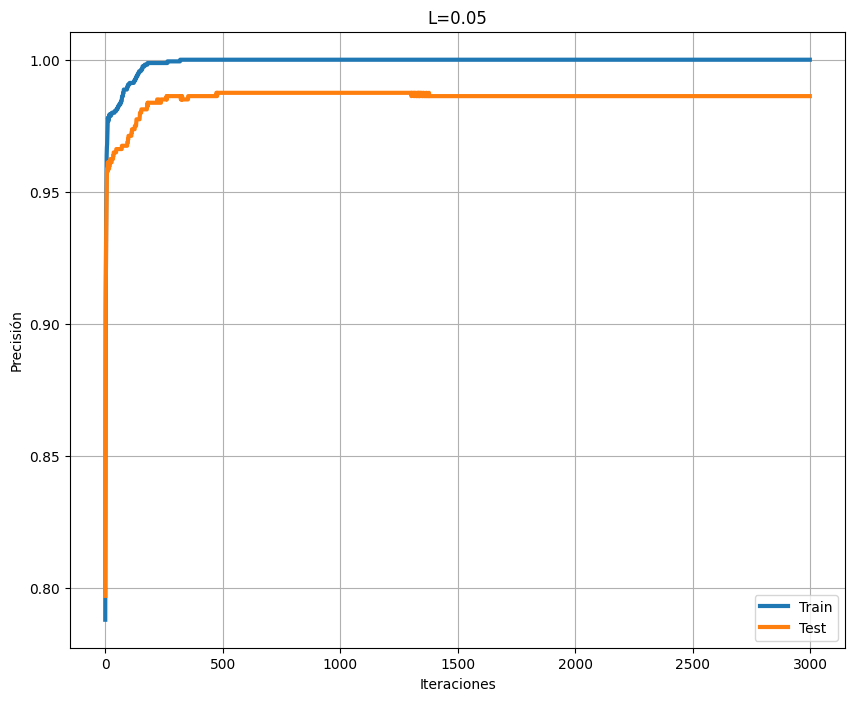

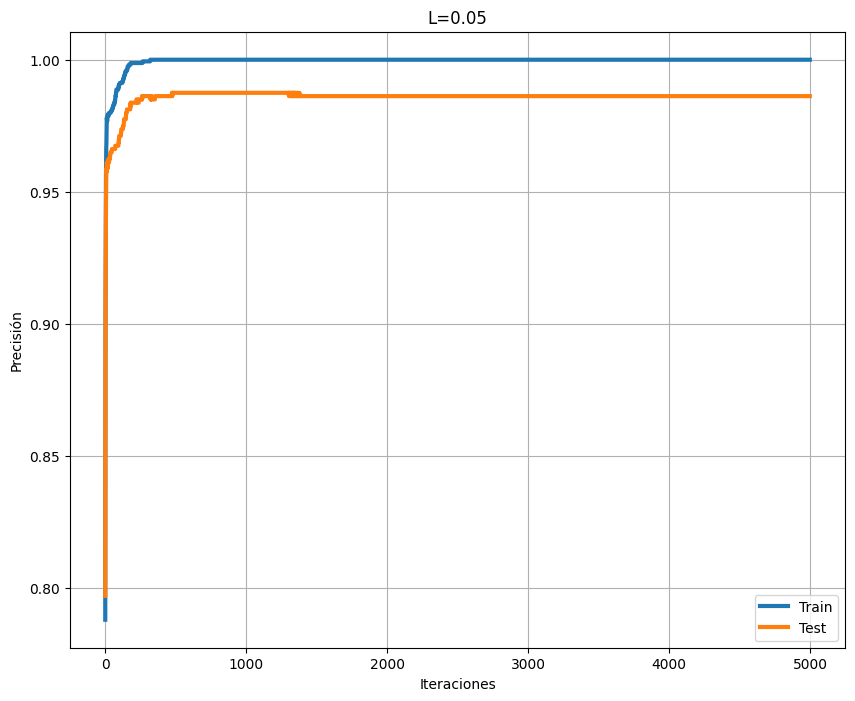

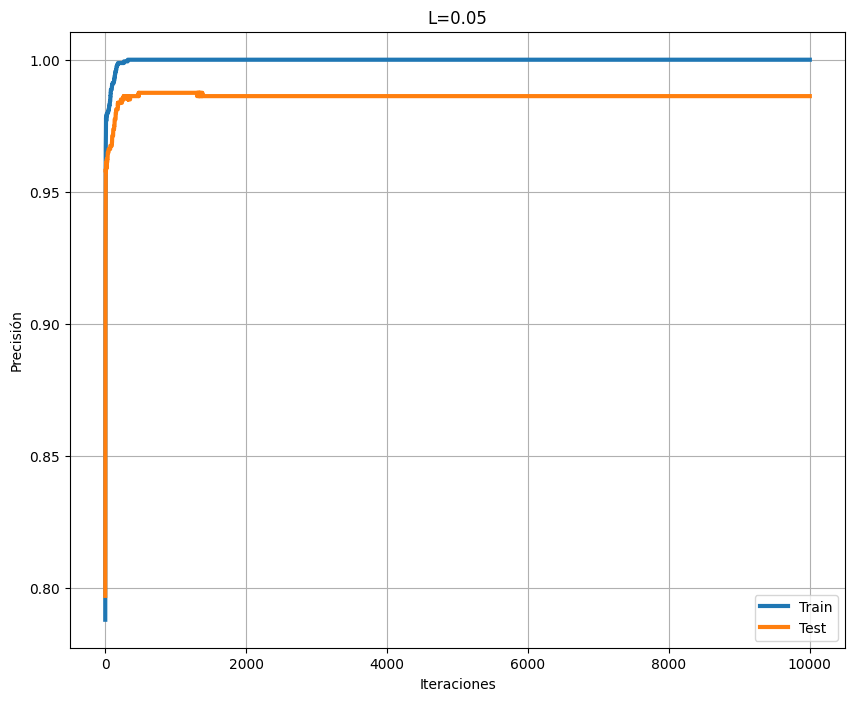

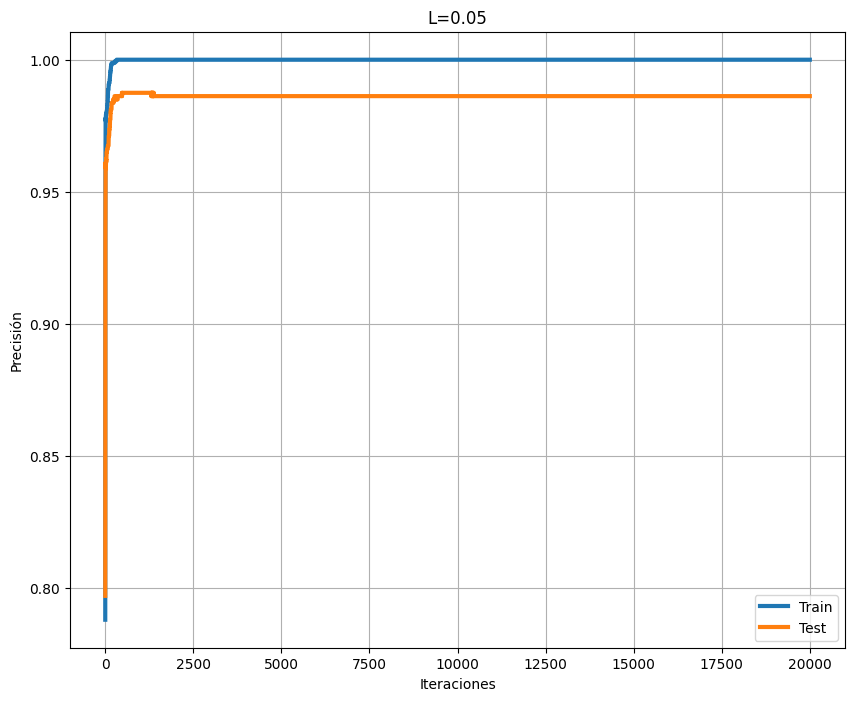

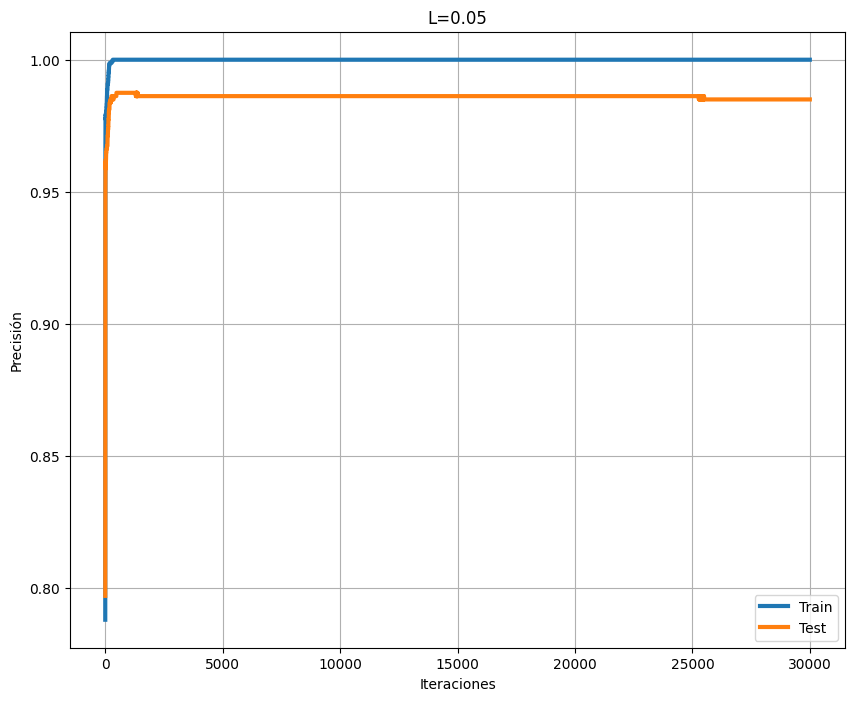

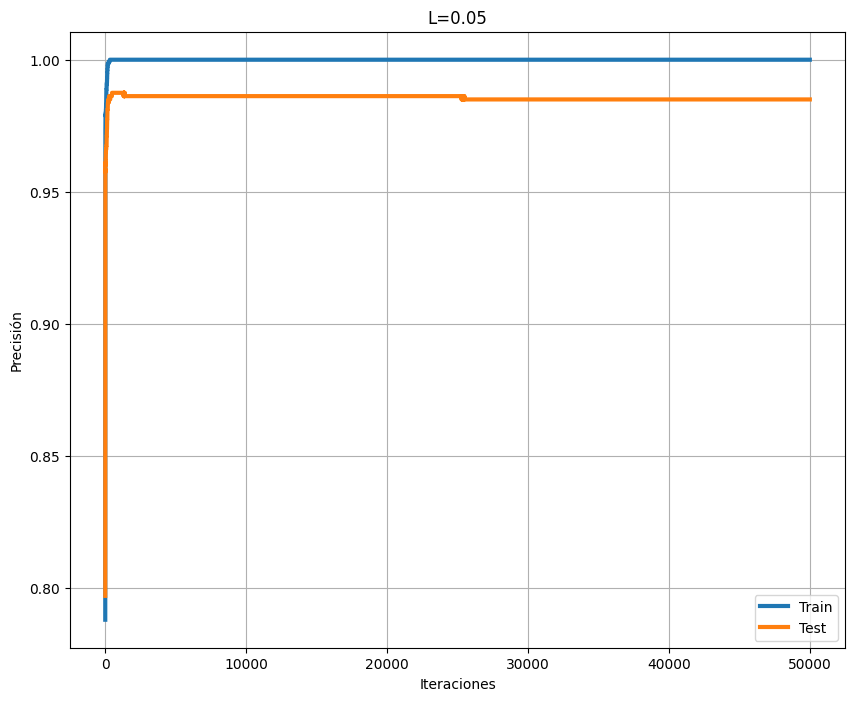

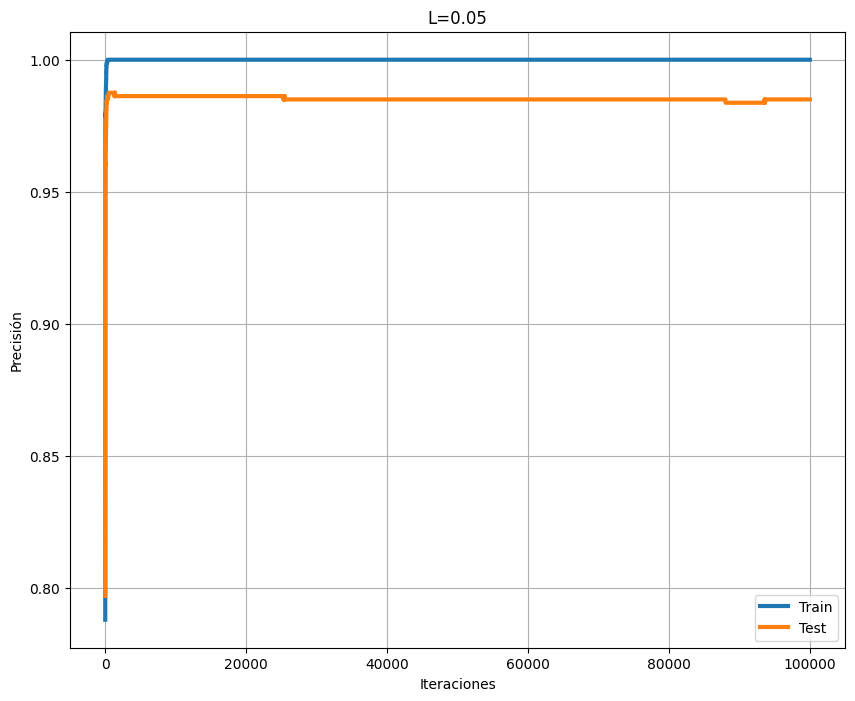

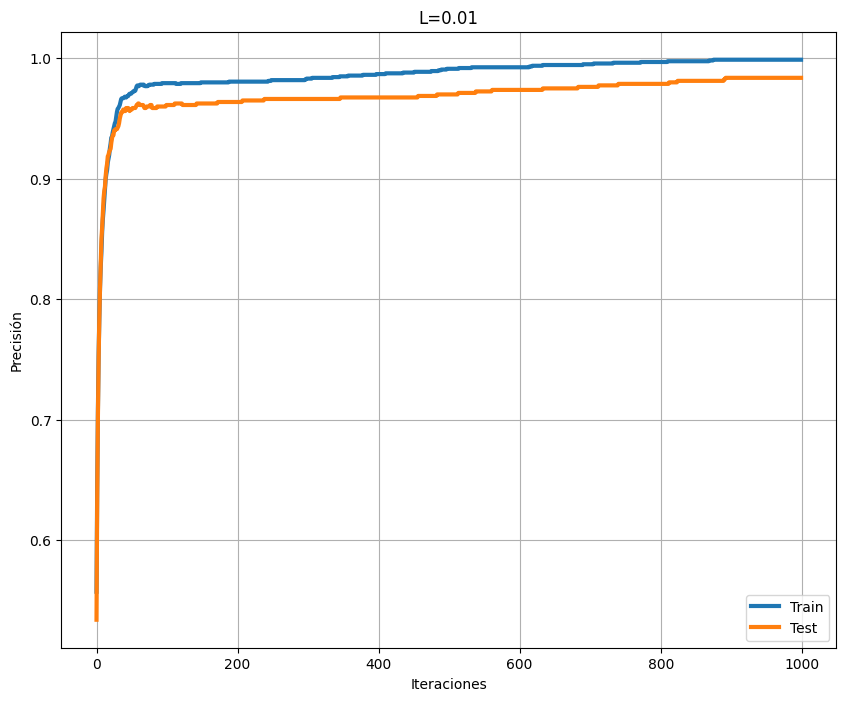

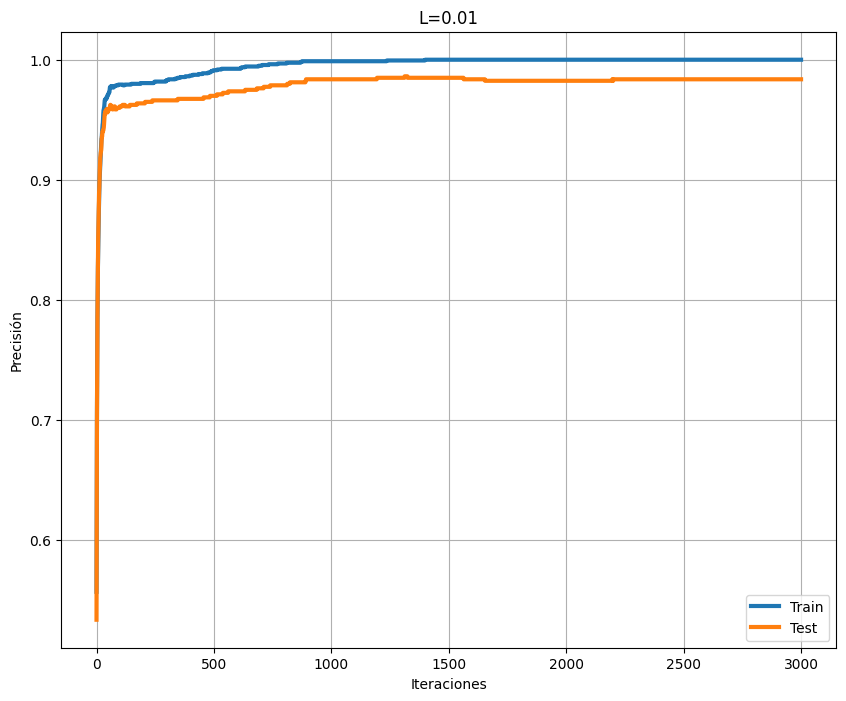

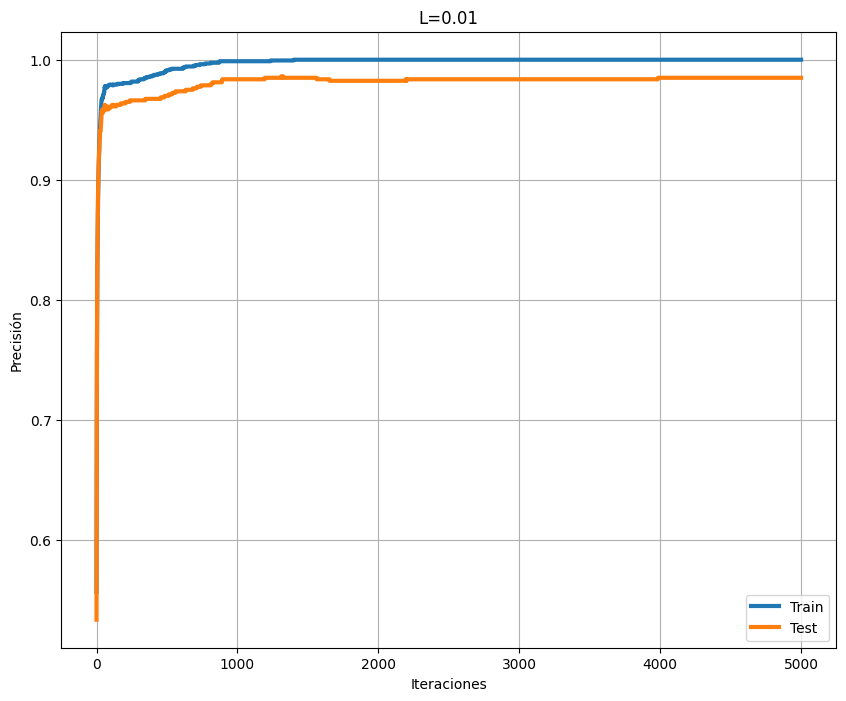

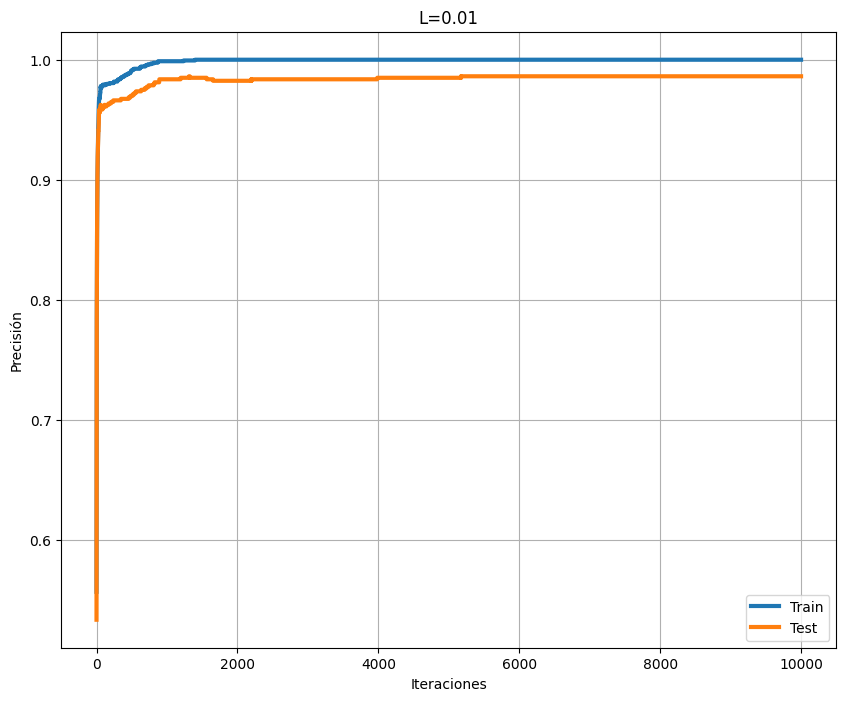

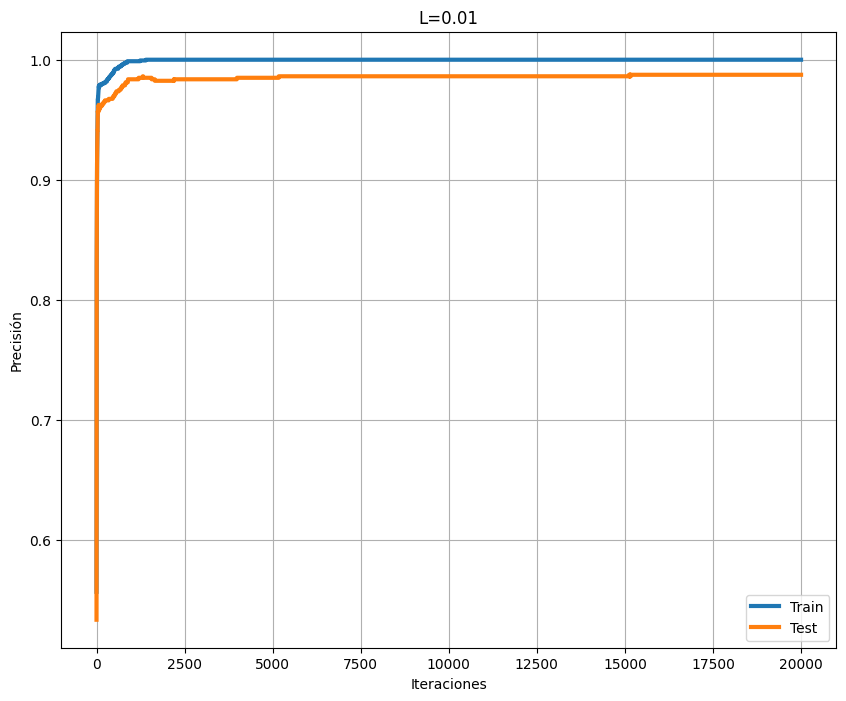

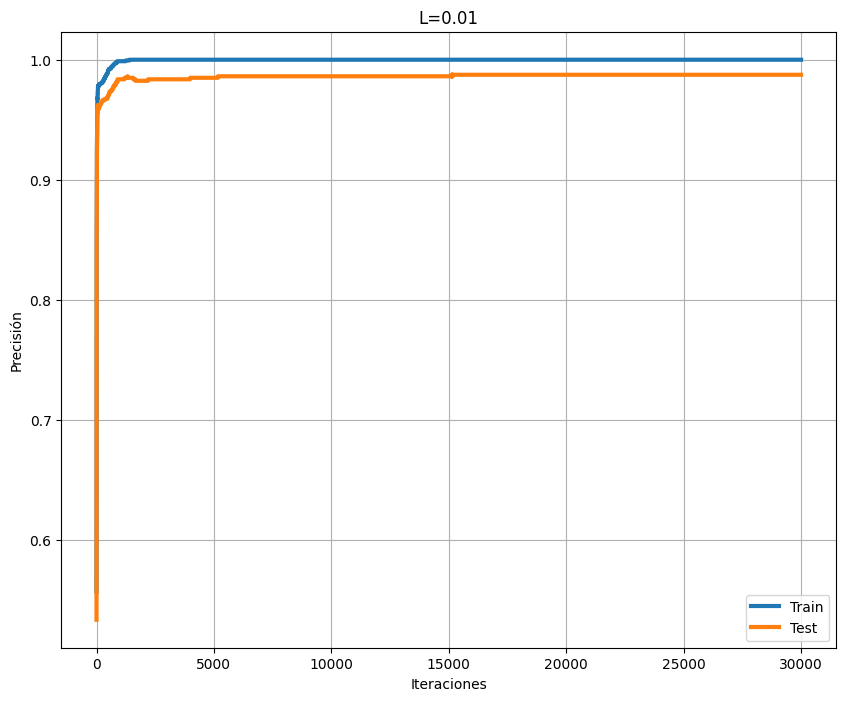

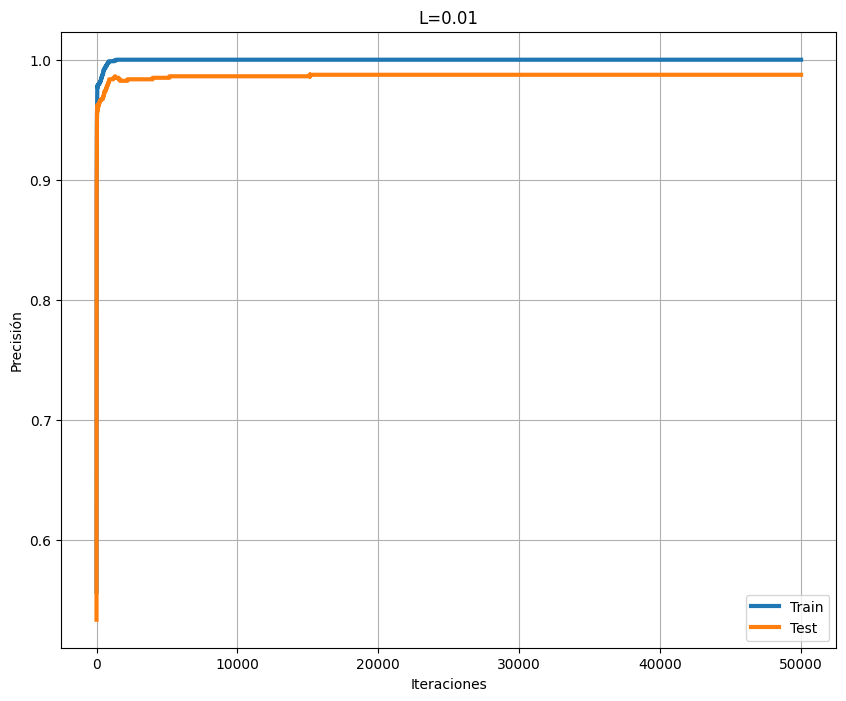

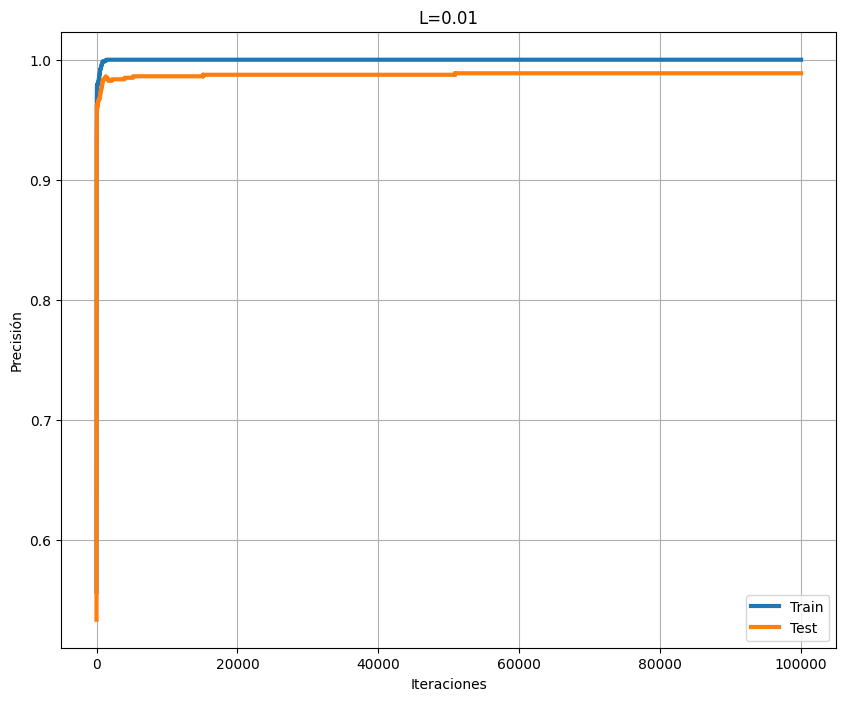

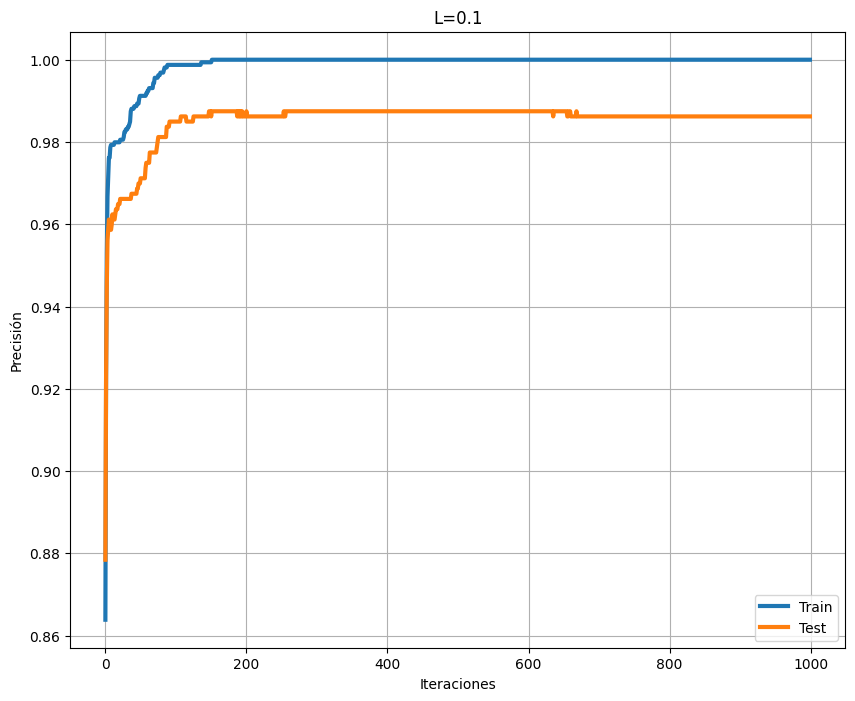

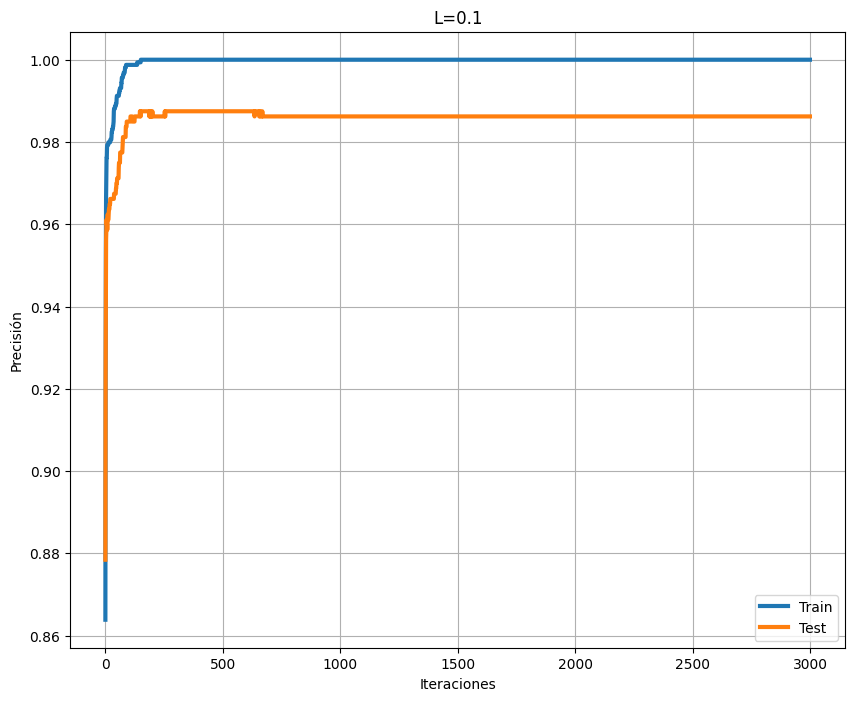

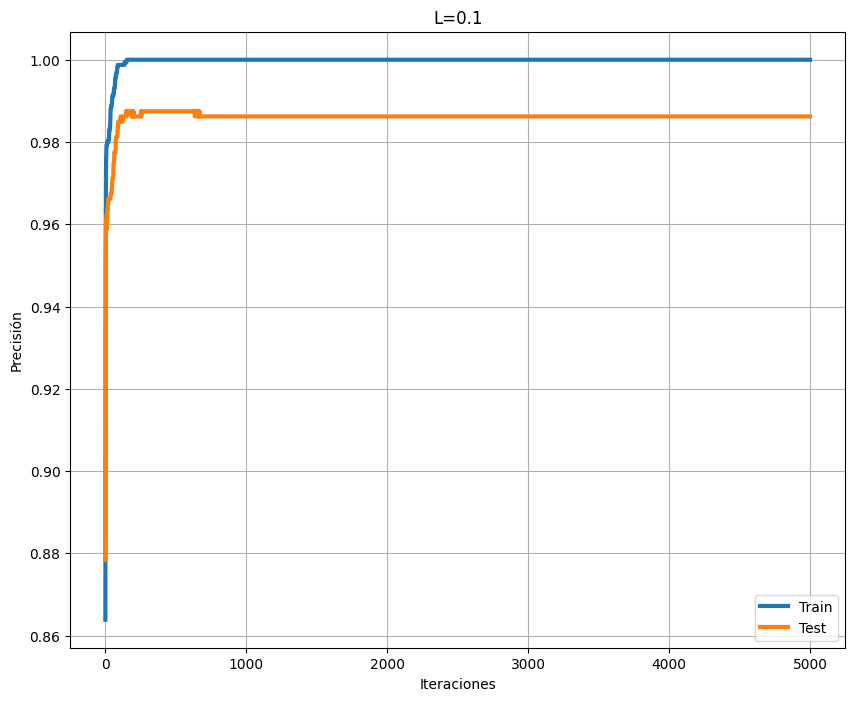

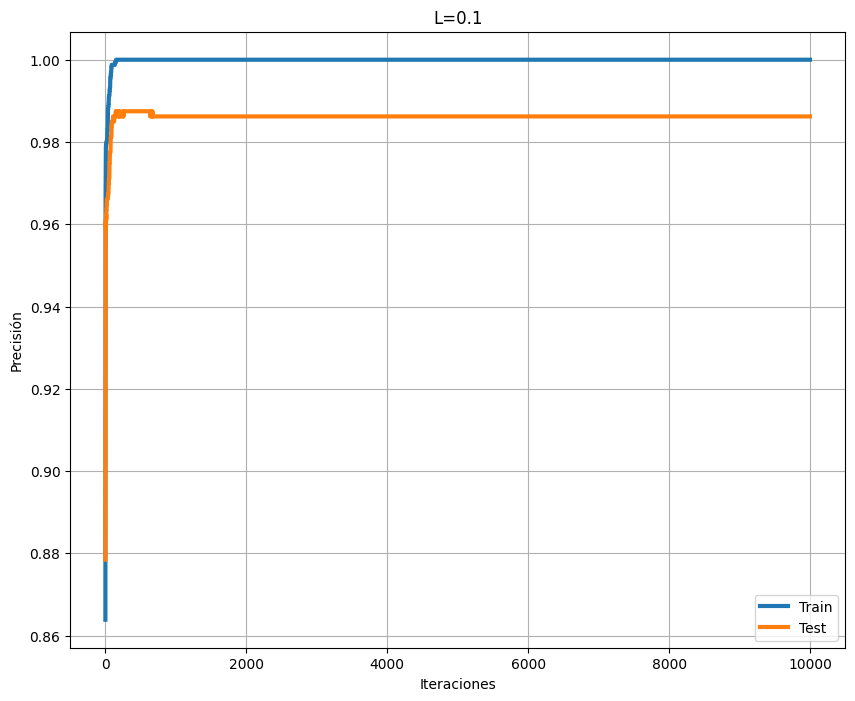

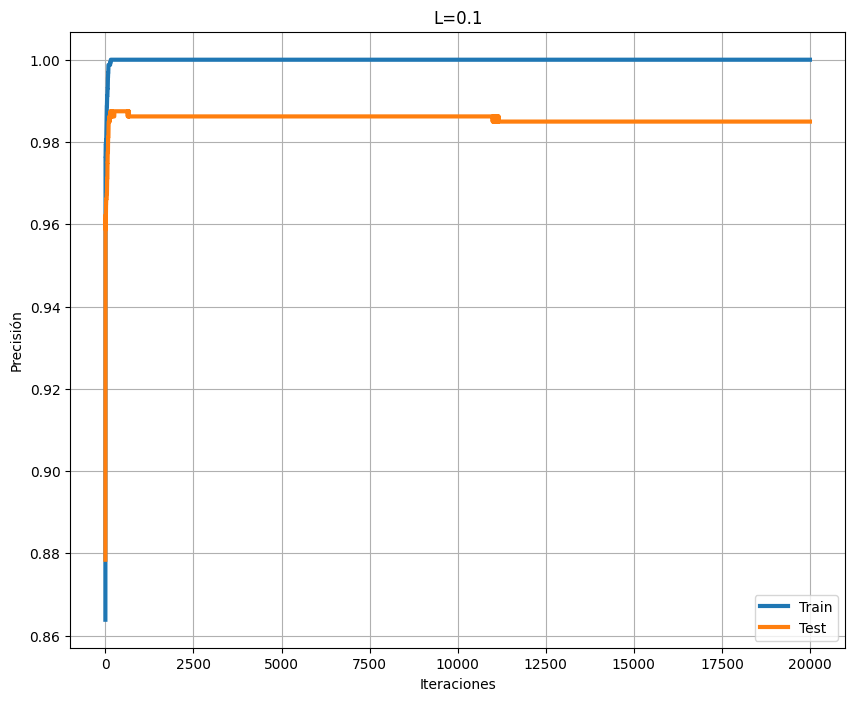

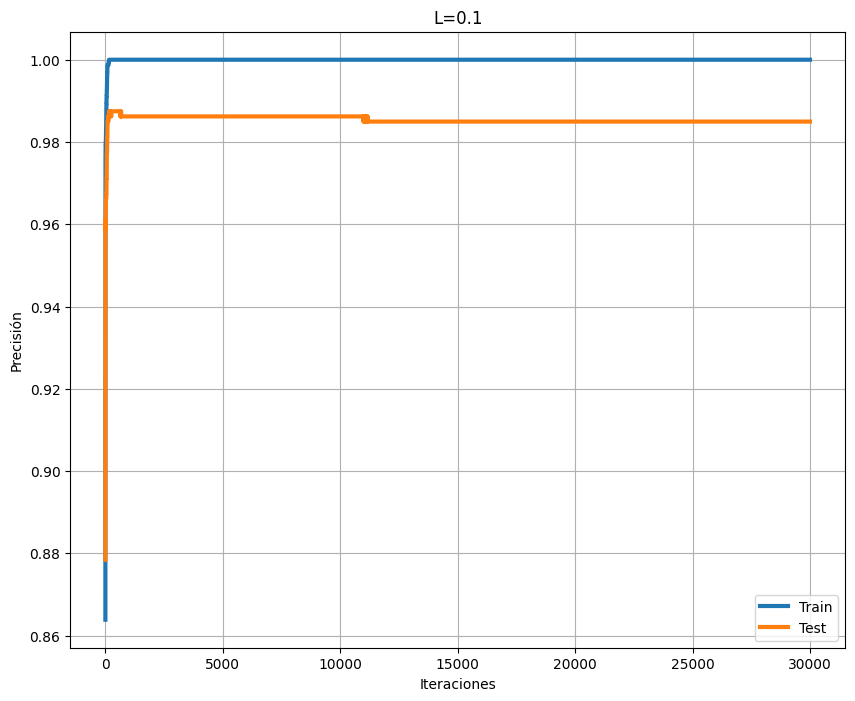

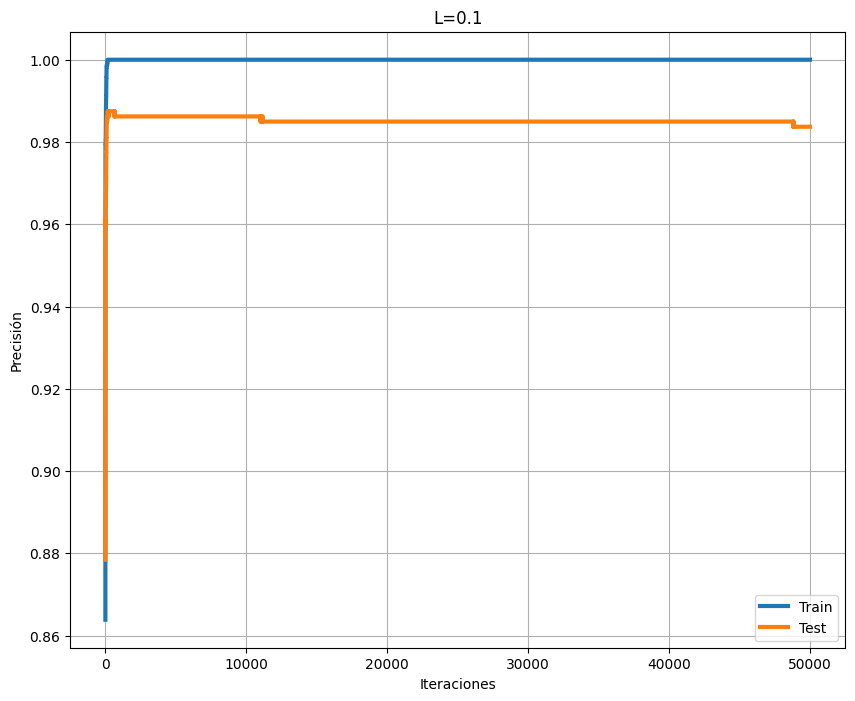

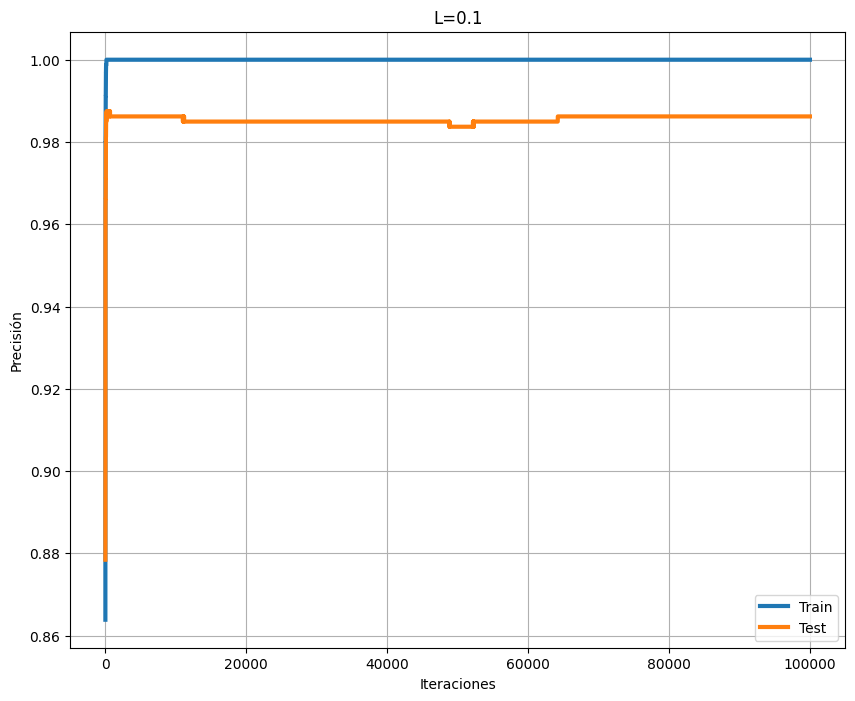

In [ ]:
# Lista de L a probar
l_probados = [0.0005, 0.005, 0.0001, 0.001, 0.05, 0.01, 0.1]
# Lista de ranges a probar
range_probados = [1_000, 3_000, 5_000, 10_000, 20_000, 30_000, 50_000, 100_000]

# # Probar cada combinación de L e iteraciones
# for L in l_probados:
#     for rango in range_probados:   ///Función comentada por practicidad
#         graficar_red_scikit(L, rango)

## VERSIÓN FINAL
Luego de haber probado distintas combinaciones de tasas de aprendizaje y números de iteraciones, se determinó el uso de:
##### - *L = 0,001*, y
##### - *Iteraciones = 20.000*;
debido a su curva de aprendizaje, que crece a un ritmo constante, y porque tiene un buen porcentaje de aciertos, sin presentar overfitting, es decir, sin ser tan "perfecto" ni aprenderse la base de datos de memoria.
Para entrenar la red que creamos desde cero, hacemos:

In [ ]:
# Inicialización de base de datos, pesos, separación de conjuntos de testeo y entrenamiento, con semilla aleatoria
dataframe = pd.read_csv("students.csv")
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Volunteering", "GradeClass"], inplace = True)

dataframe.loc[dataframe['GPA'] <= 2, 'GPA'] = 1
dataframe.loc[dataframe['GPA'] > 2, 'GPA'] = 0

# Construir una red neuronal con pesos y sesgos
# iniciados aleatoriamente
w_hidden = np.random.rand(9, 9) * 2 - 1 #Pareciera que sin restar 1 da más accuracy
w_output = np.random.rand(1, 9) * 2 - 1

b_hidden = np.random.rand(9, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1

# Se extrae las columnas de entrada
all_inputs = (dataframe.iloc[:, 0:9].values)
# Se extrae la columna de salida
all_outputs = dataframe.iloc[:, -1].values

# Se divide en un conjunto de entrenamiento y uno de prueba (un tercio para el testeo)
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)

n = X_train.shape[0] # número de registros de entrenamiento
# Uso de L e iteraciones óptimo
L = 0.001
rango = 20_000

# Precisión de predicciones sin entrenar la red
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions > .5).flatten().round(), Y_test)
accuracy = sum(test_comparisons / X_test.shape[0])
print("ACCURACY: ", accuracy)
# Entrenamiento de red
aplicarRed(L, rango)
# Precisión de predicciones luego de entrenada la red
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions > .5).flatten().round(), Y_test)
accuracy = sum(test_comparisons / X_test.shape[0])
print("ACCURACY: ", accuracy)

df = dataframe
df['GoodStudent'] = (df.iloc[:, -1] == 0).astype(int)
X = df.values[:, :-1]
Y = df['GoodStudent'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

red_neuronal = MLPClassifier(
        solver='sgd', hidden_layer_sizes=(9,), activation='relu',
        max_iter=rango, learning_rate_init=L)

red_neuronal.fit(X_train, Y_train)
print(f"Precisión del conjunto de entrenamiento= {red_neuronal.score(X_train, Y_train)}")
print(f"Precisión del conjunto de testeo= {red_neuronal.score(X_test, Y_test)}")

ACCURACY:  0.5162907268170367


100%|██████████| 20000/20000 [00:01<00:00, 11986.80it/s]


ACCURACY:  0.9235588972430928
Precisión del conjunto de entrenamiento= 0.9422835633626098
Precisión del conjunto de testeo= 0.9461152882205514
